In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter
import matplotlib
import collections
import json
import itertools
#matplotlib.use('TkAgg')

In [11]:
def save(myDictionary, file_name):
    j = json.dumps(myDictionary)
    with open(file_name, 'w') as f:
        f.write(j)
        f.close()
def load(file_name):
    return json.load(open(file_name))

In [2]:
#edge_file = open("edges.csv","r" , encoding="utf-8")
#edge_list = edge_file.read().split('\n')
#edge_list_modified = []
#for i in edge_list:
#    item_list = i.split(',')
#    if len(item_list) > 2:
#        edge_list_modified.append(item_list[0]+ ","+ (" ".join(item_list[1:])))
#    else:
#        edge_list_modified.append(item_list[0]+','+item_list[1])

In [3]:
#file = open("edges_modified.csv","a+", encoding="utf-8")
#for i in edge_list_modified:
#    print(i)
#    file.write(i + "\n")
#file.close()

In [2]:
#G = nx.DiGraph()
G = nx.read_edgelist("edges.csv", delimiter=',', create_using=nx.DiGraph)

In [64]:
G_sample = nx.DiGraph()#Sample graph representation

In [65]:
G_sample.add_edge(1, 2)
G_sample.add_edge(2, 3)
G_sample.add_edge(3, 1)
G_sample.add_edge(1, 4)
G_sample.add_edge(4, 2)
G_sample.add_edge(4, 5)
G_sample.add_edge(6, 7)

In [60]:
def show_graph(G):
    plt.subplot(121)
    nx.draw_circular(G, with_labels=True, font_weight='bold', node_size=500, font_size=10)
    plt.show()

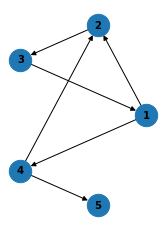

In [61]:
show_graph(G_sample)

In [3]:
def box_plot(data, title):
    plot_list = []
    labels = []
    for k, v in data.items():
        plot_list.append(v["list"])
        labels.append(v["name"])
    fig = plt.figure(figsize=(16,8), dpi= 300)
    ax = fig.add_subplot(111)
    plt.boxplot(plot_list,labels=labels)
    #plt.boxplot(x)
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel('Models', fontsize=fontsize)
    plt.ylabel(title, fontsize=fontsize)
    plt.title(title+" Box Plot", fontsize=fontsize)
    #plt.title(name + " in 24 hours", fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.yscale("log")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [4]:
def dist_plot(data, title):
    fig = plt.figure(figsize=(16,8), dpi= 300)
    ax = fig.add_subplot(111)
    #plot_list = []
    #labels = []
    for k, v in data.items():
        #plot_list.append(v["list"])
        #labels.append(v["name"])
        sns.distplot(v["list"], label=v["name"], hist=False)
    
    
    #plt.boxplot(plot_list,labels=labels)
    #plt.boxplot(x)
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel(title, fontsize=fontsize)
    plt.ylabel("Density", fontsize=fontsize)
    plt.title(title + " Density Plot", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

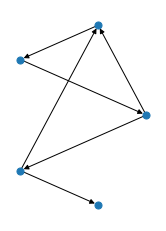

In [8]:
show_graph(G_sample)

**Configuration Model**

In [5]:
in_degree_sequence = [d for n, d in G.in_degree()]  # in_degree sequence
out_degree_sequence = [d for n, d in G.out_degree()]  # out_degree sequence

In [6]:
cm = nx.directed_configuration_model(in_degree_sequence, out_degree_sequence) #Create Directed Configuration Model
cm=nx.DiGraph(cm) #Remove Parallel Edges

**WS Model**

In [7]:
ws = nx.watts_strogatz_graph(G.number_of_nodes(), 8, 0.5)

**ER Model**

In [8]:
er = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges(), directed=True) #Erdős-Rényi graph

**BA Model**

In [9]:
ba = nx.barabasi_albert_graph(G.number_of_nodes(), 4) #Barabási–Albert graph

### Degree Centrality
Nodes with highest in-degrees

In [39]:
in_degree_sequence = [(n, d)  for n, d in G.in_degree()]  # in_degree sequence
out_degree_sequence = [(n, d) for n, d in G.out_degree()]  # out_degree sequence
in_degree_sequence.sort(key=lambda tup: tup[1], reverse=True)  # sorts in place

In [41]:
in_degree_sequence[0:10]

[('Casting', 578),
 ('Lyrics', 322),
 ('Video game', 274),
 ('Episode', 271),
 ('United States', 241),
 ('Season', 236),
 ('Definition', 216),
 ('Recipe', 212),
 ('Flight', 196),
 ('Job', 190)]

In [25]:
real_world_degree_list = [i[1] for i in in_degree_sequence]

**Highest degree nodes:** Casting(578), Lyrics(322), Video game(274)

**ER Degree Centrality**

In [27]:
er_in_degree_sequence = [(n, d)  for n, d in er.in_degree()]  # in_degree sequence
er_out_degree_sequence = [(n, d) for n, d in er.out_degree()]  # out_degree sequence
er_in_degree_sequence.sort(key=lambda tup: tup[1], reverse=True)  # sorts in place
er_degree_list = [i[1] for i in er_in_degree_sequence]

**WS Degree Centrality**

In [53]:
ws_degree_sequence = [(n, d)  for n, d in ws.degree()]  # degree sequence
ws_degree_sequence.sort(key=lambda tup: tup[1], reverse=True)  # sorts in place
ws_degree_list = [i[1] for i in ws_degree_sequence]

**BA Degree Centrality**

In [76]:
ba_degree_sequence = [(n, d)  for n, d in ba.degree()]  # degree sequence
ba_degree_sequence.sort(key=lambda tup: tup[1], reverse=True)  # sorts in place
ba_degree_list = [i[1] for i in ba_degree_sequence]

**CM Degree Centrality**

In [113]:
cm_in_degree_sequence = [(n, d)  for n, d in cm.in_degree()]  # in_degree sequence
cm_out_degree_sequence = [(n, d) for n, d in cm.out_degree()]  # out_degree sequence
cm_in_degree_sequence.sort(key=lambda tup: tup[1], reverse=True)  # sorts in place
cm_degree_list = [i[1] for i in cm_in_degree_sequence]

In [161]:
degree_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_degree_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_degree_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_degree_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_degree_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_degree_list
    }
}
real_world_degree_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_degree_list
    }
}

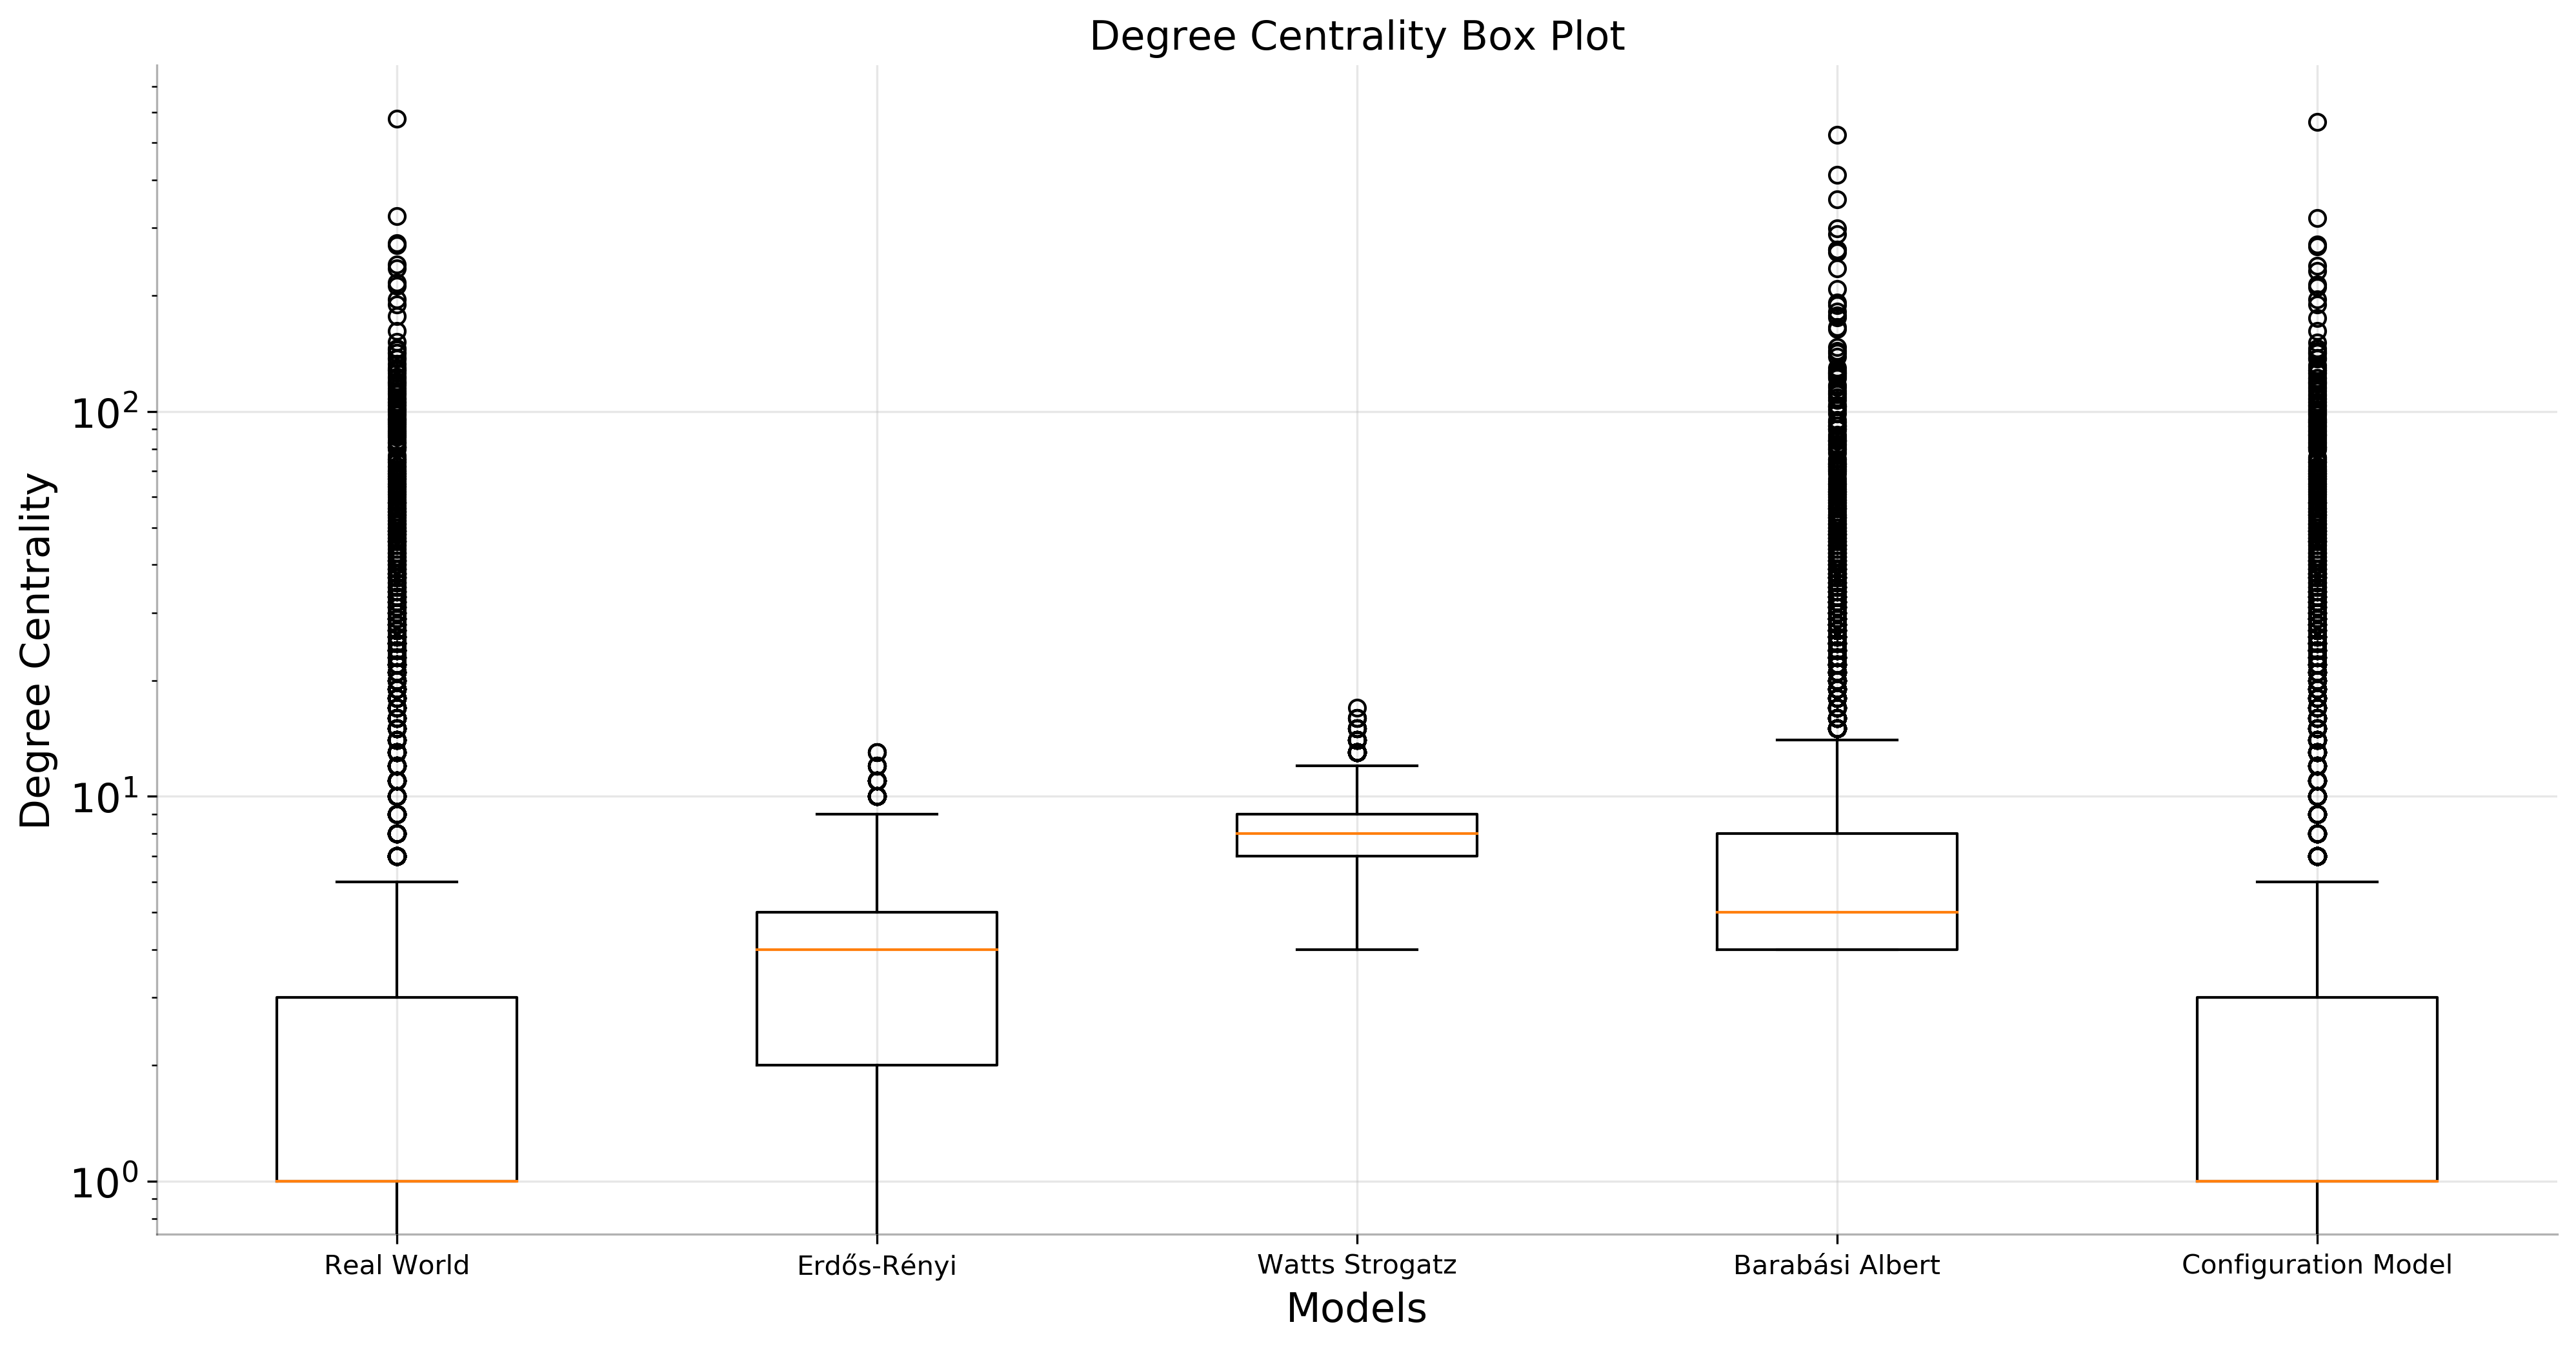

In [115]:
box_plot(degree_data, "Degree Centrality")

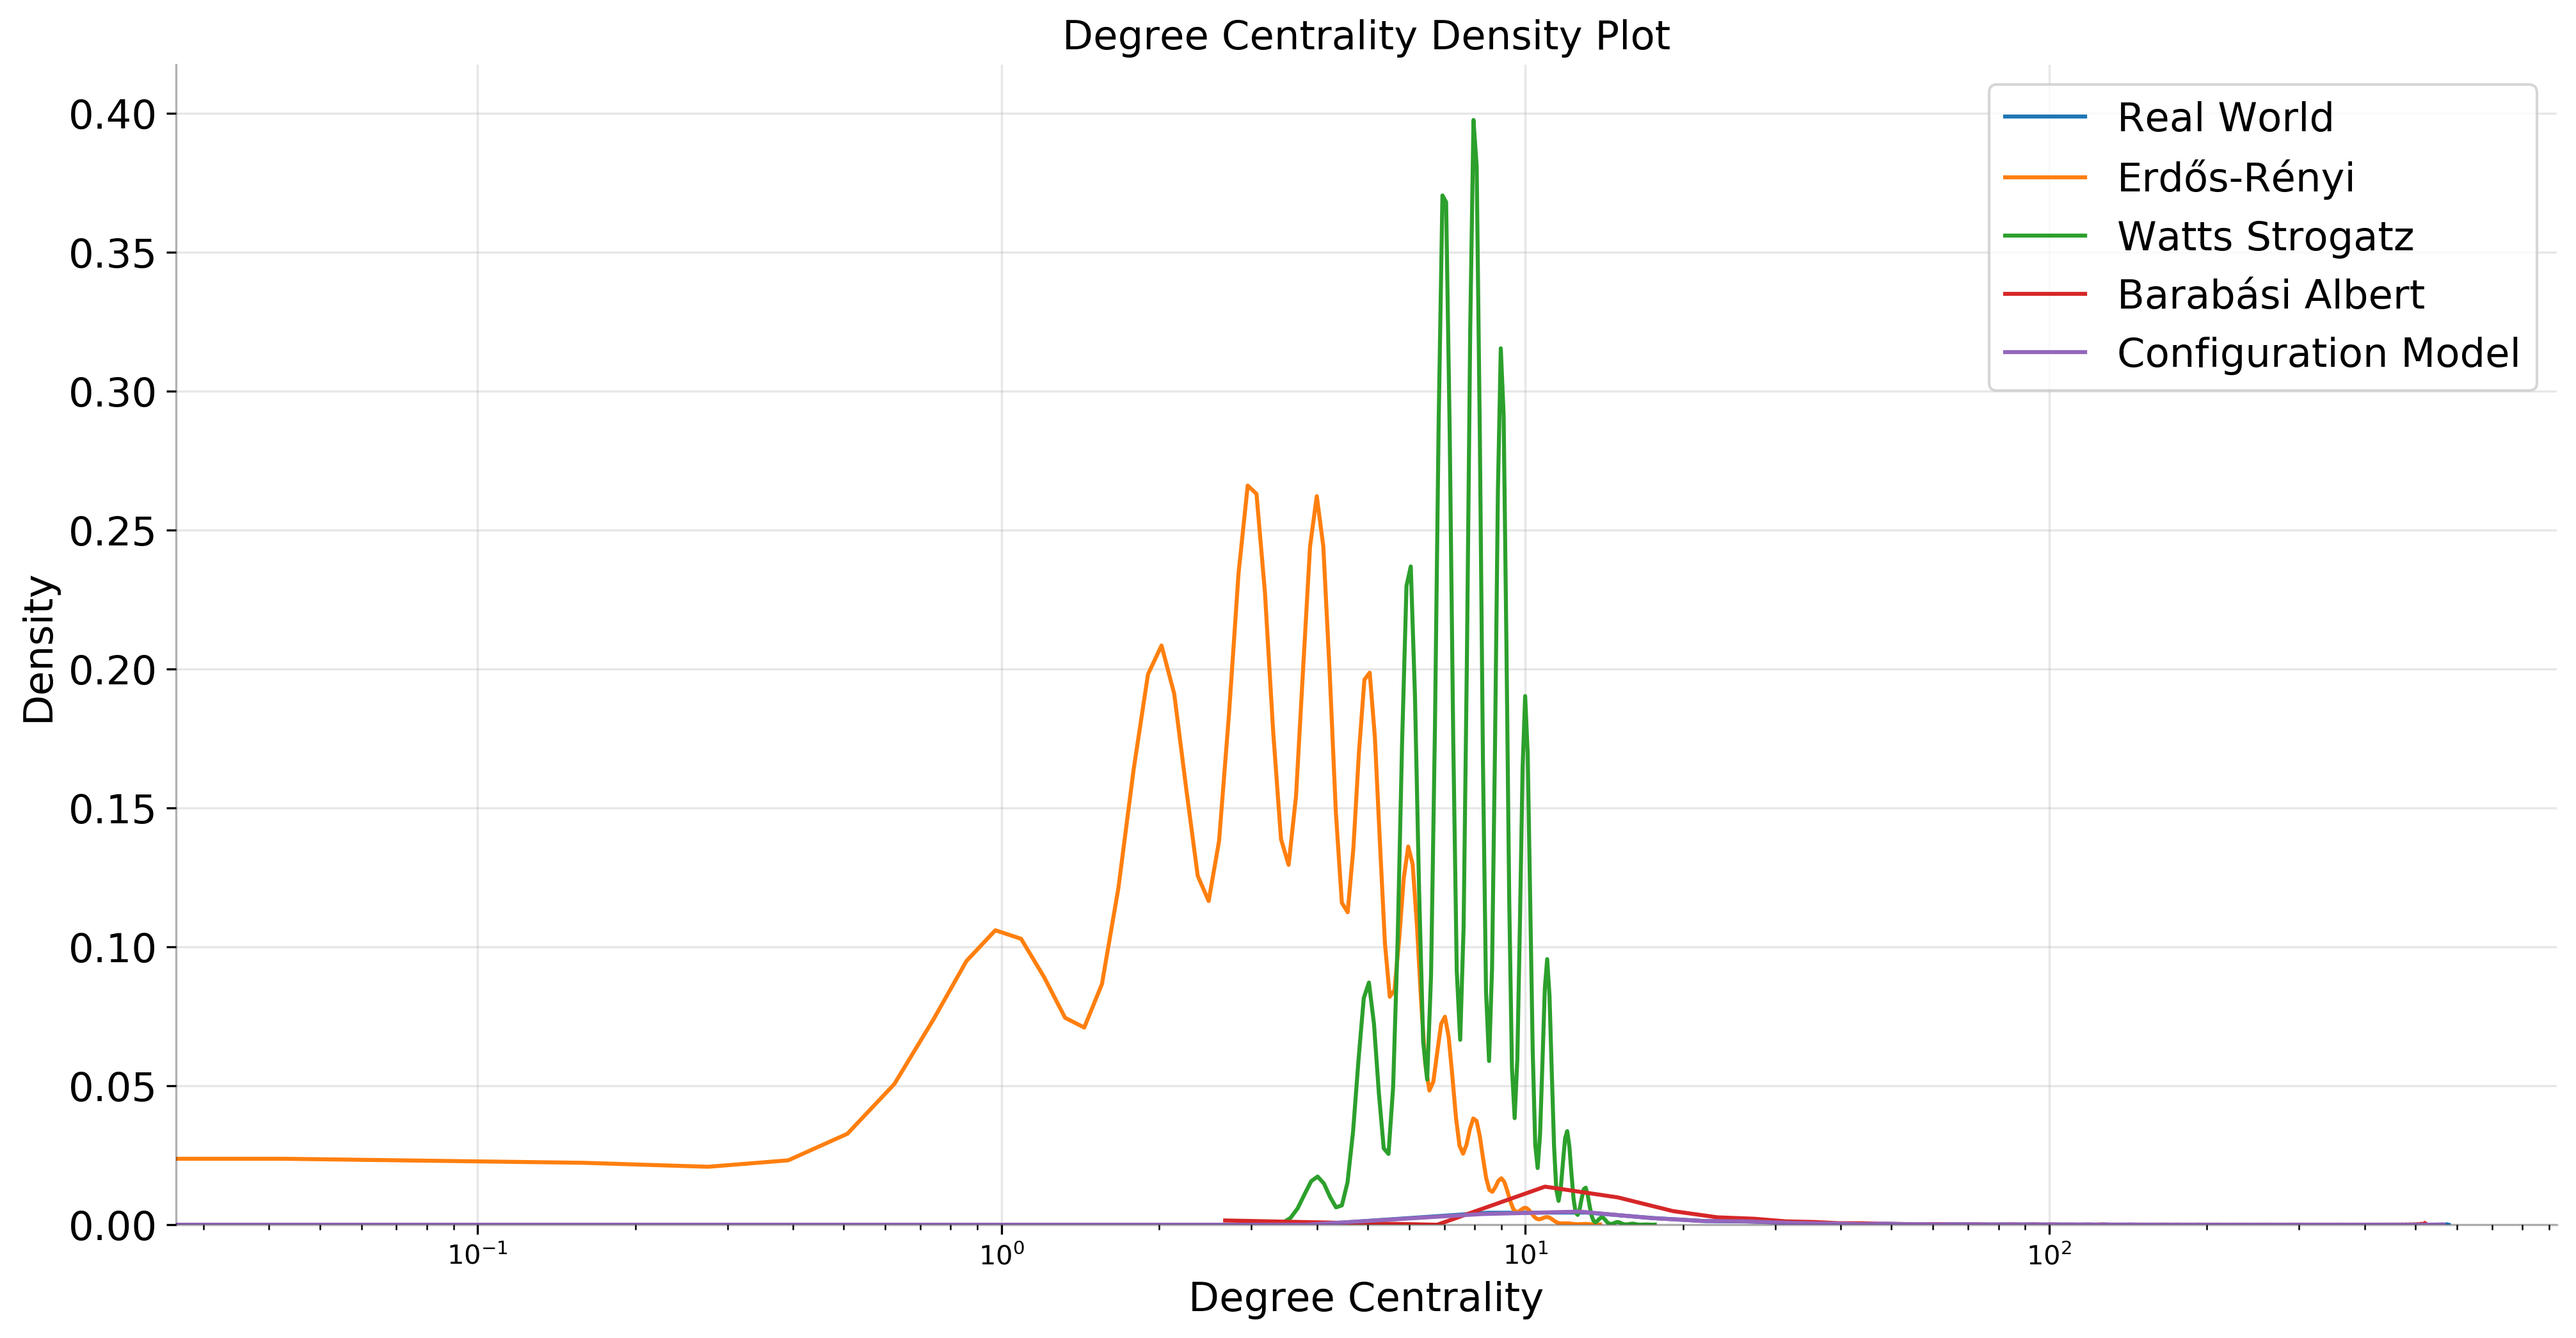

In [136]:
dist_plot(degree_data, "Degree Centrality")

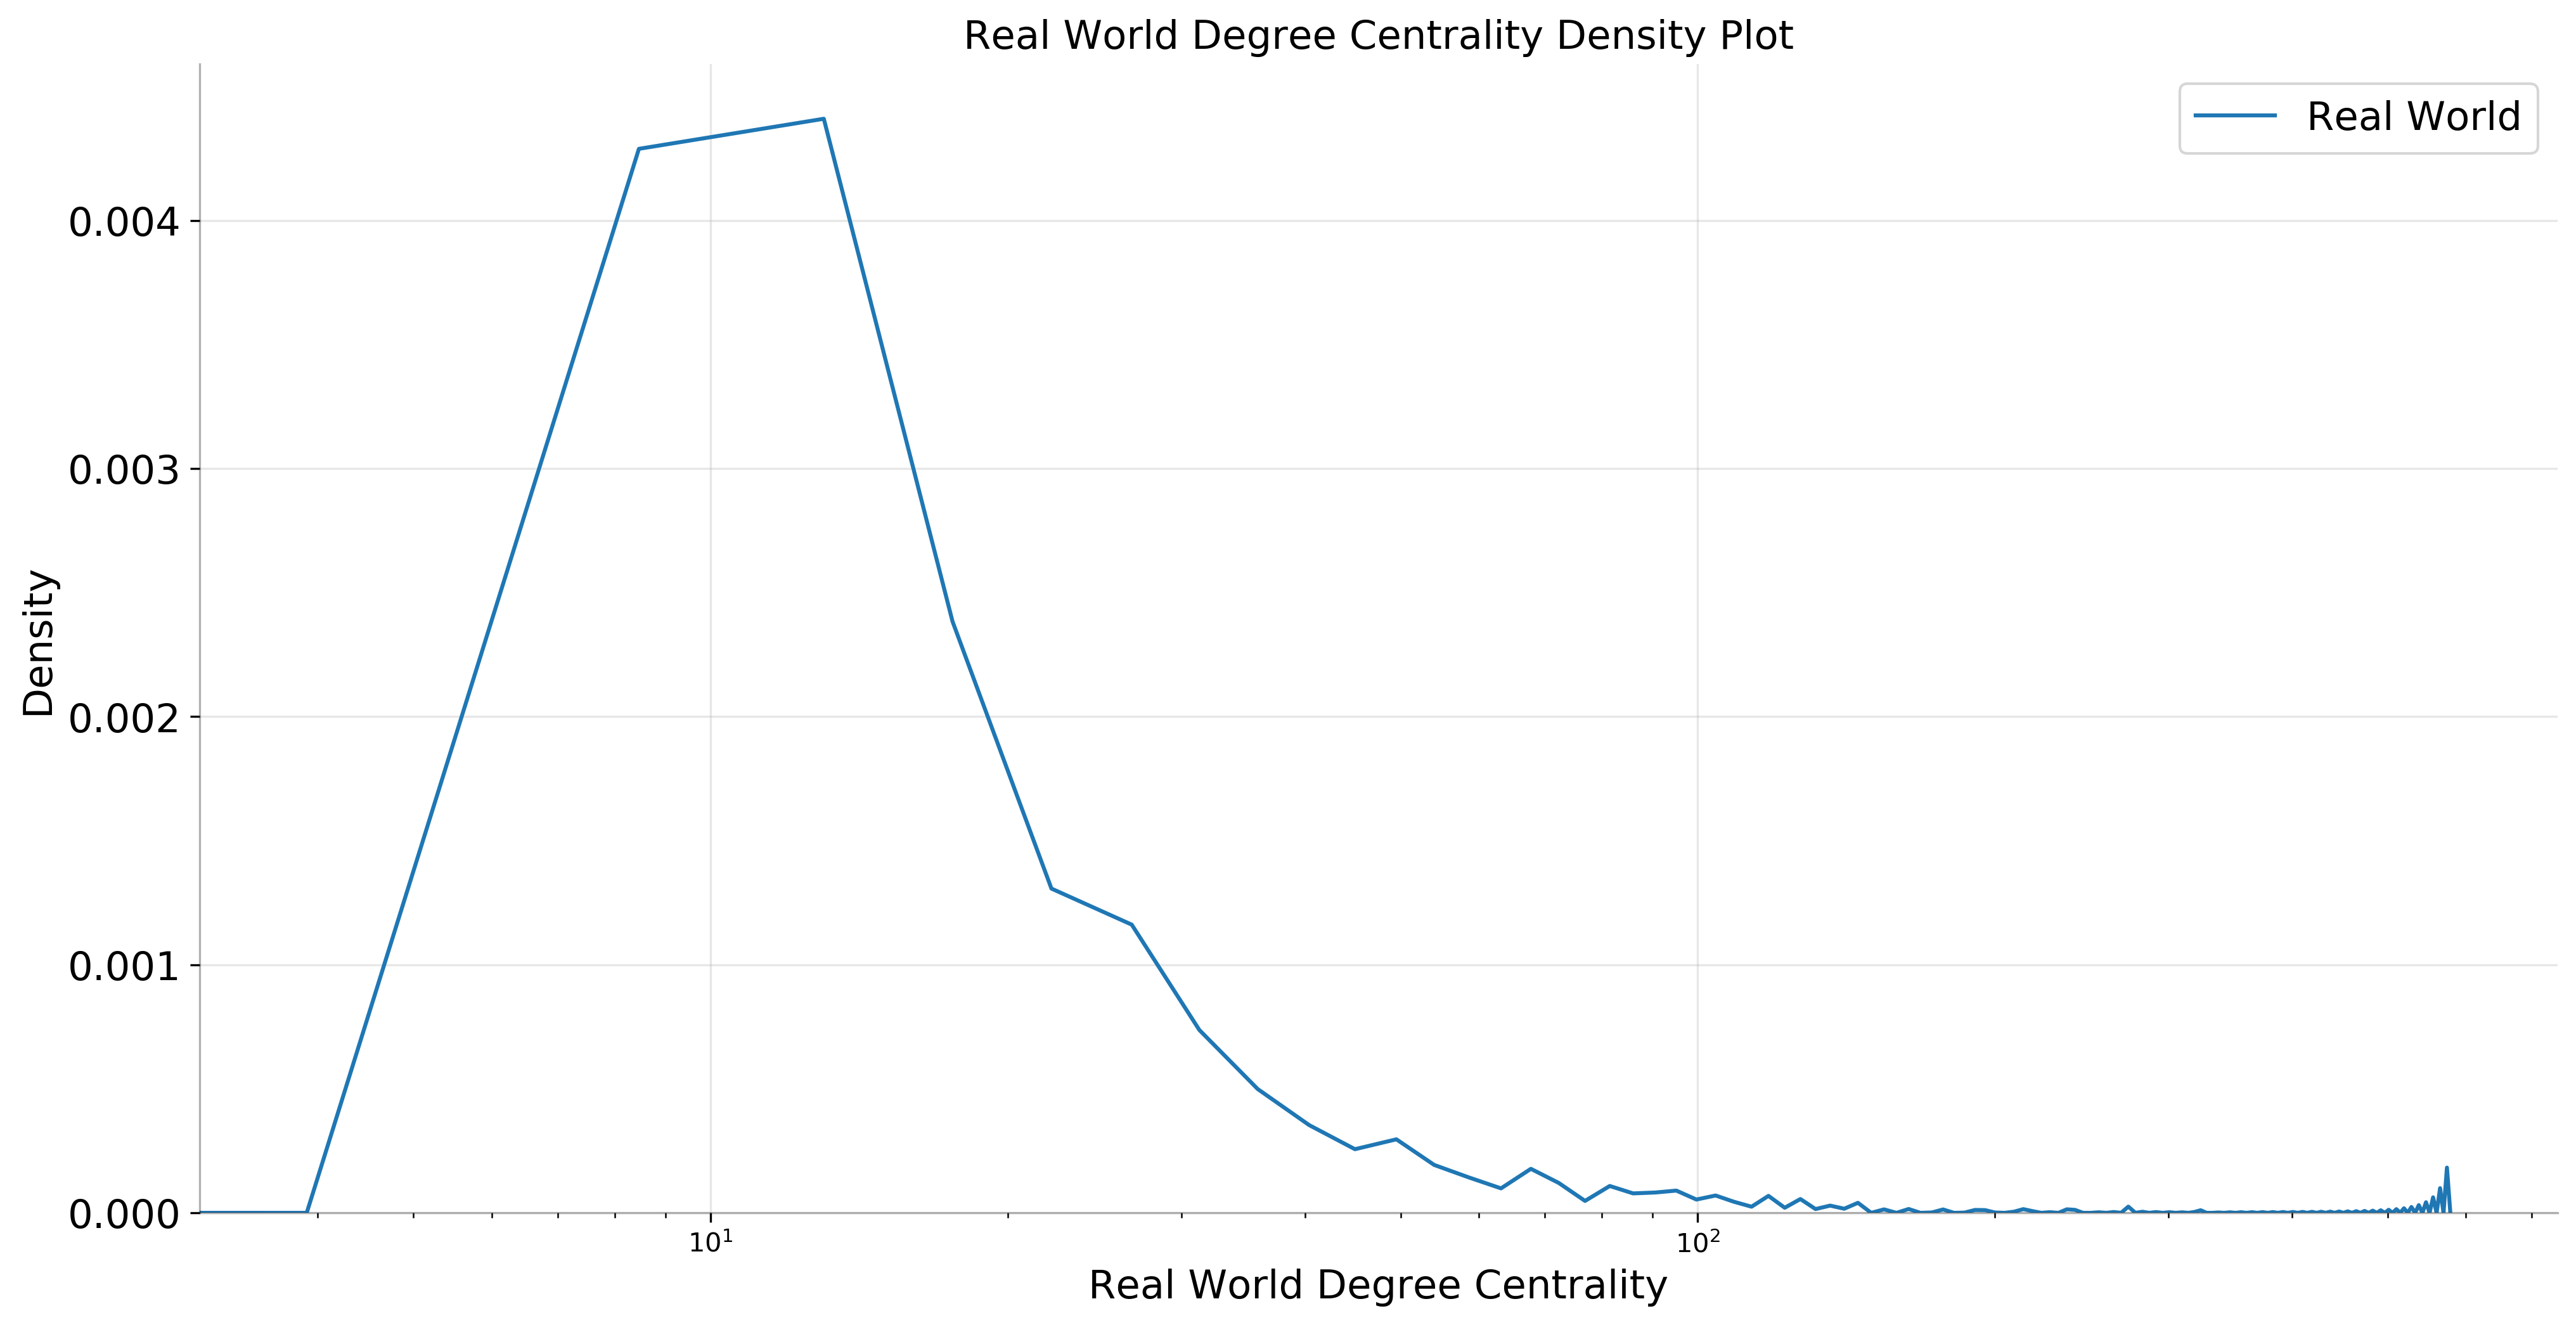

In [172]:
dist_plot(real_world_degree_data, "Real World Degree Centrality")

# Connectivity-Based Centrality

### Eigenvector Centrality

In [42]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [43]:
eigenvector_centrality = {k: v for k, v in sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)}

In [48]:
dict(itertools.islice(eigenvector_centrality.items(), 10))#Top Ten

{'Cricket': 0.27577937824000676,
 'India national cricket team': 0.26937901610890513,
 'ICC Cricket World Cup': 0.19750290539695403,
 'Stock': 0.18146547200903274,
 'United States': 0.1685285740723938,
 'Live television': 0.16815607458506646,
 'Price': 0.13739928224808987,
 'Television': 0.13200987569090042,
 'Car': 0.1276752120502671,
 'Share price': 0.12519813368179264}

**Highest Eigenvector Centrality Nodes:** Cricket(0.275) , India national cricket team(0.269), ICC Cricket World Cup(0.197)

In [107]:
real_world_eigenvector_list = list(eigenvector_centrality.values())

**ER EigenVector Centrality**

In [101]:
er_eigenvector_centrality = nx.eigenvector_centrality(er)
er_eigenvector_centrality = {k: v for k, v in sorted(er_eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)}
er_eigenvector_list = list(er_eigenvector_centrality.values())

**WS EigenVector Centrality**

In [108]:
ws_eigenvector_centrality = nx.eigenvector_centrality(ws)
ws_eigenvector_centrality = {k: v for k, v in sorted(ws_eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)}
ws_eigenvector_list = list(ws_eigenvector_centrality.values())

**BA EigenVector Centrality**

In [109]:
ba_eigenvector_centrality = nx.eigenvector_centrality(ba)
ba_eigenvector_centrality = {k: v for k, v in sorted(ba_eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)}
ba_eigenvector_list = list(ba_eigenvector_centrality.values())

**CM EigenVector Centrality**

In [117]:
cm_eigenvector_centrality = nx.eigenvector_centrality(cm)
cm_eigenvector_centrality = {k: v for k, v in sorted(cm_eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)}
cm_eigenvector_list = list(cm_eigenvector_centrality.values())

In [173]:
eigenvector_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_eigenvector_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_eigenvector_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_eigenvector_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_eigenvector_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_eigenvector_list
    }
}
real_world_eigenvector_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_eigenvector_list
    }
}

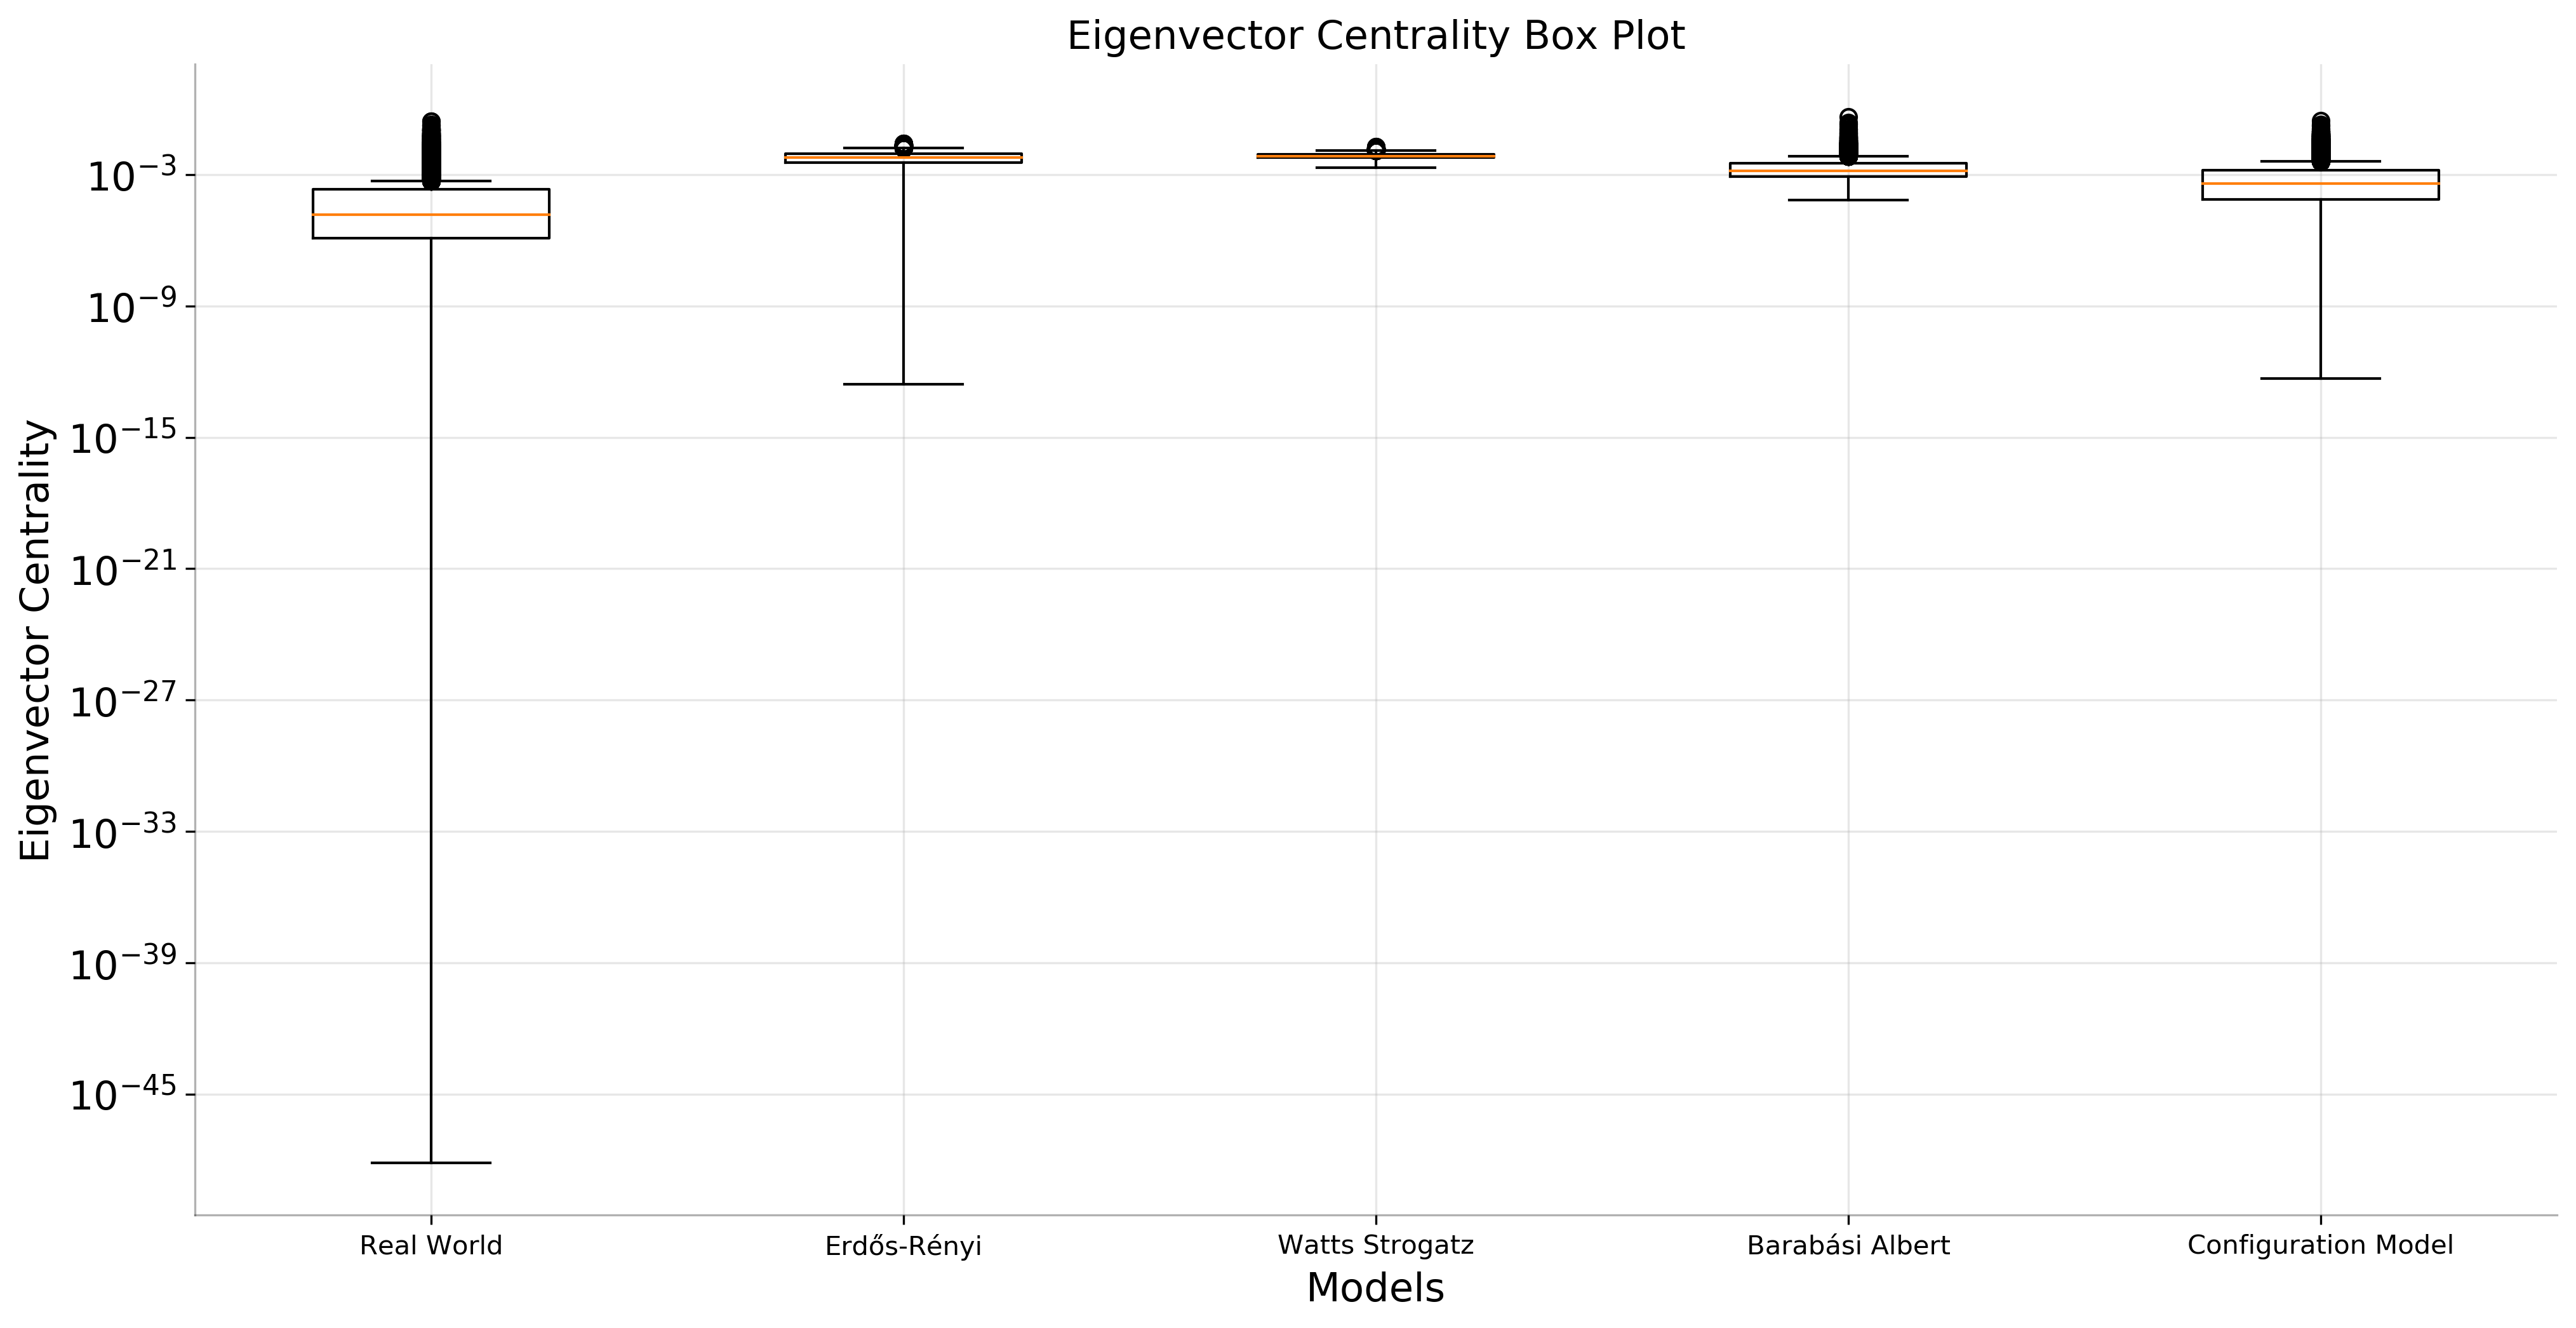

In [132]:
box_plot(eigenvector_data, "Eigenvector Centrality")

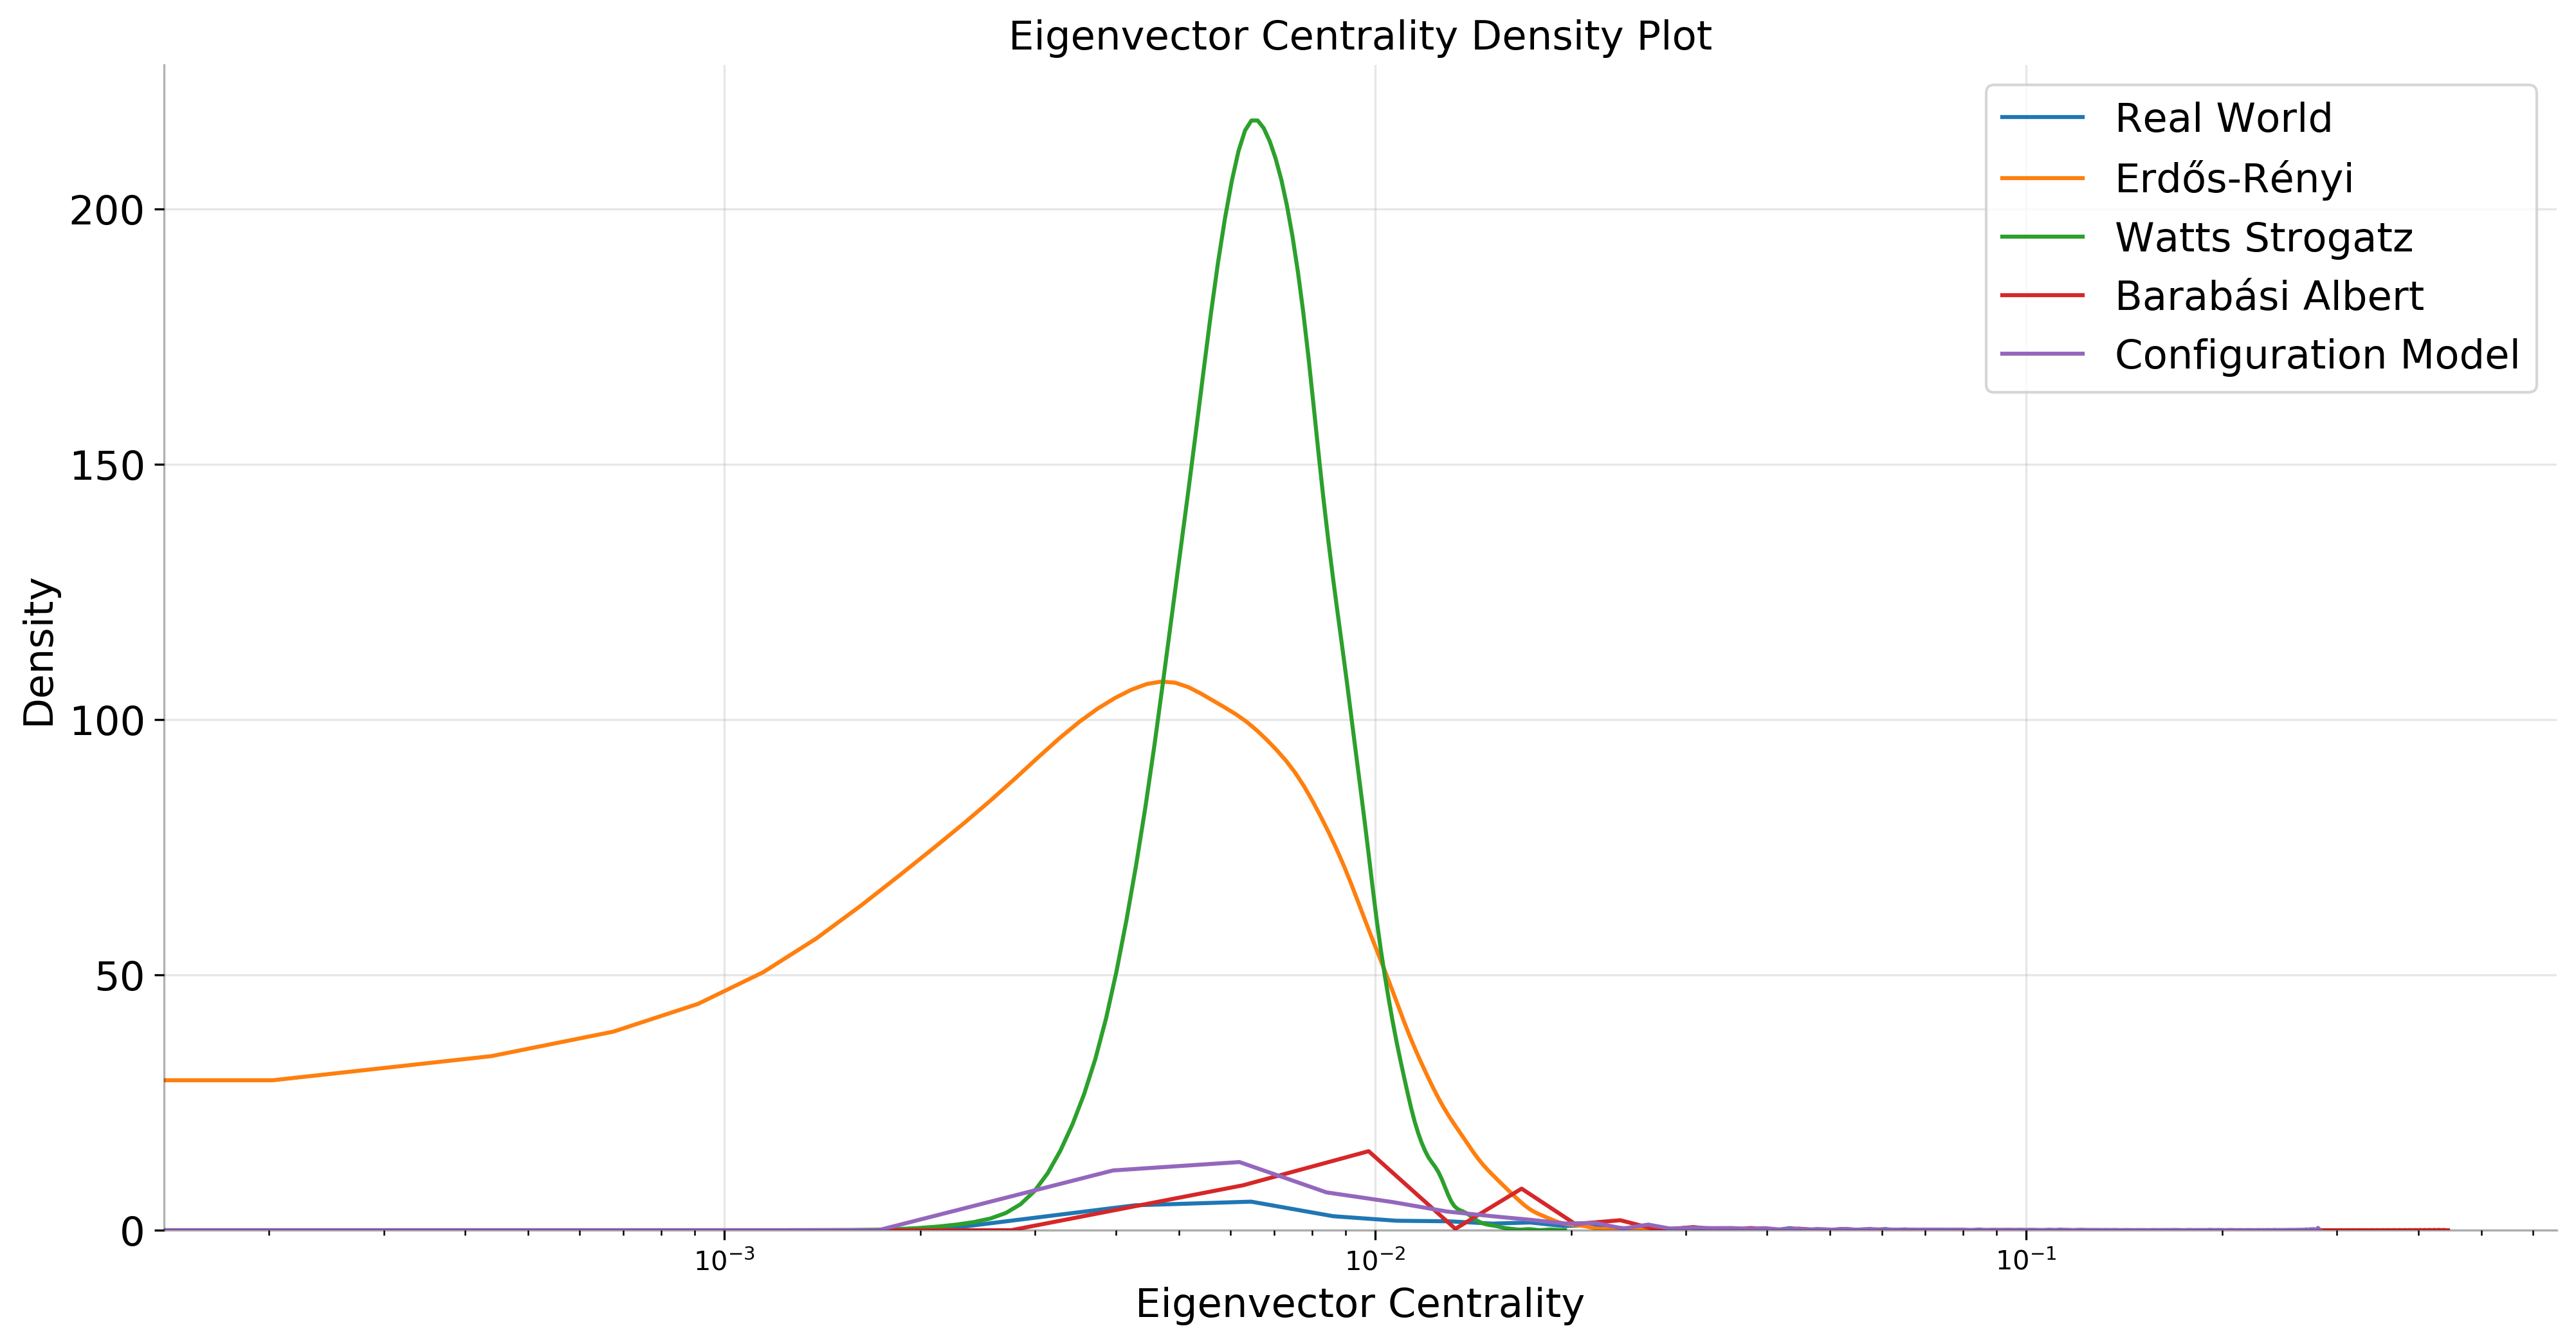

In [140]:
dist_plot(eigenvector_data, "Eigenvector Centrality")

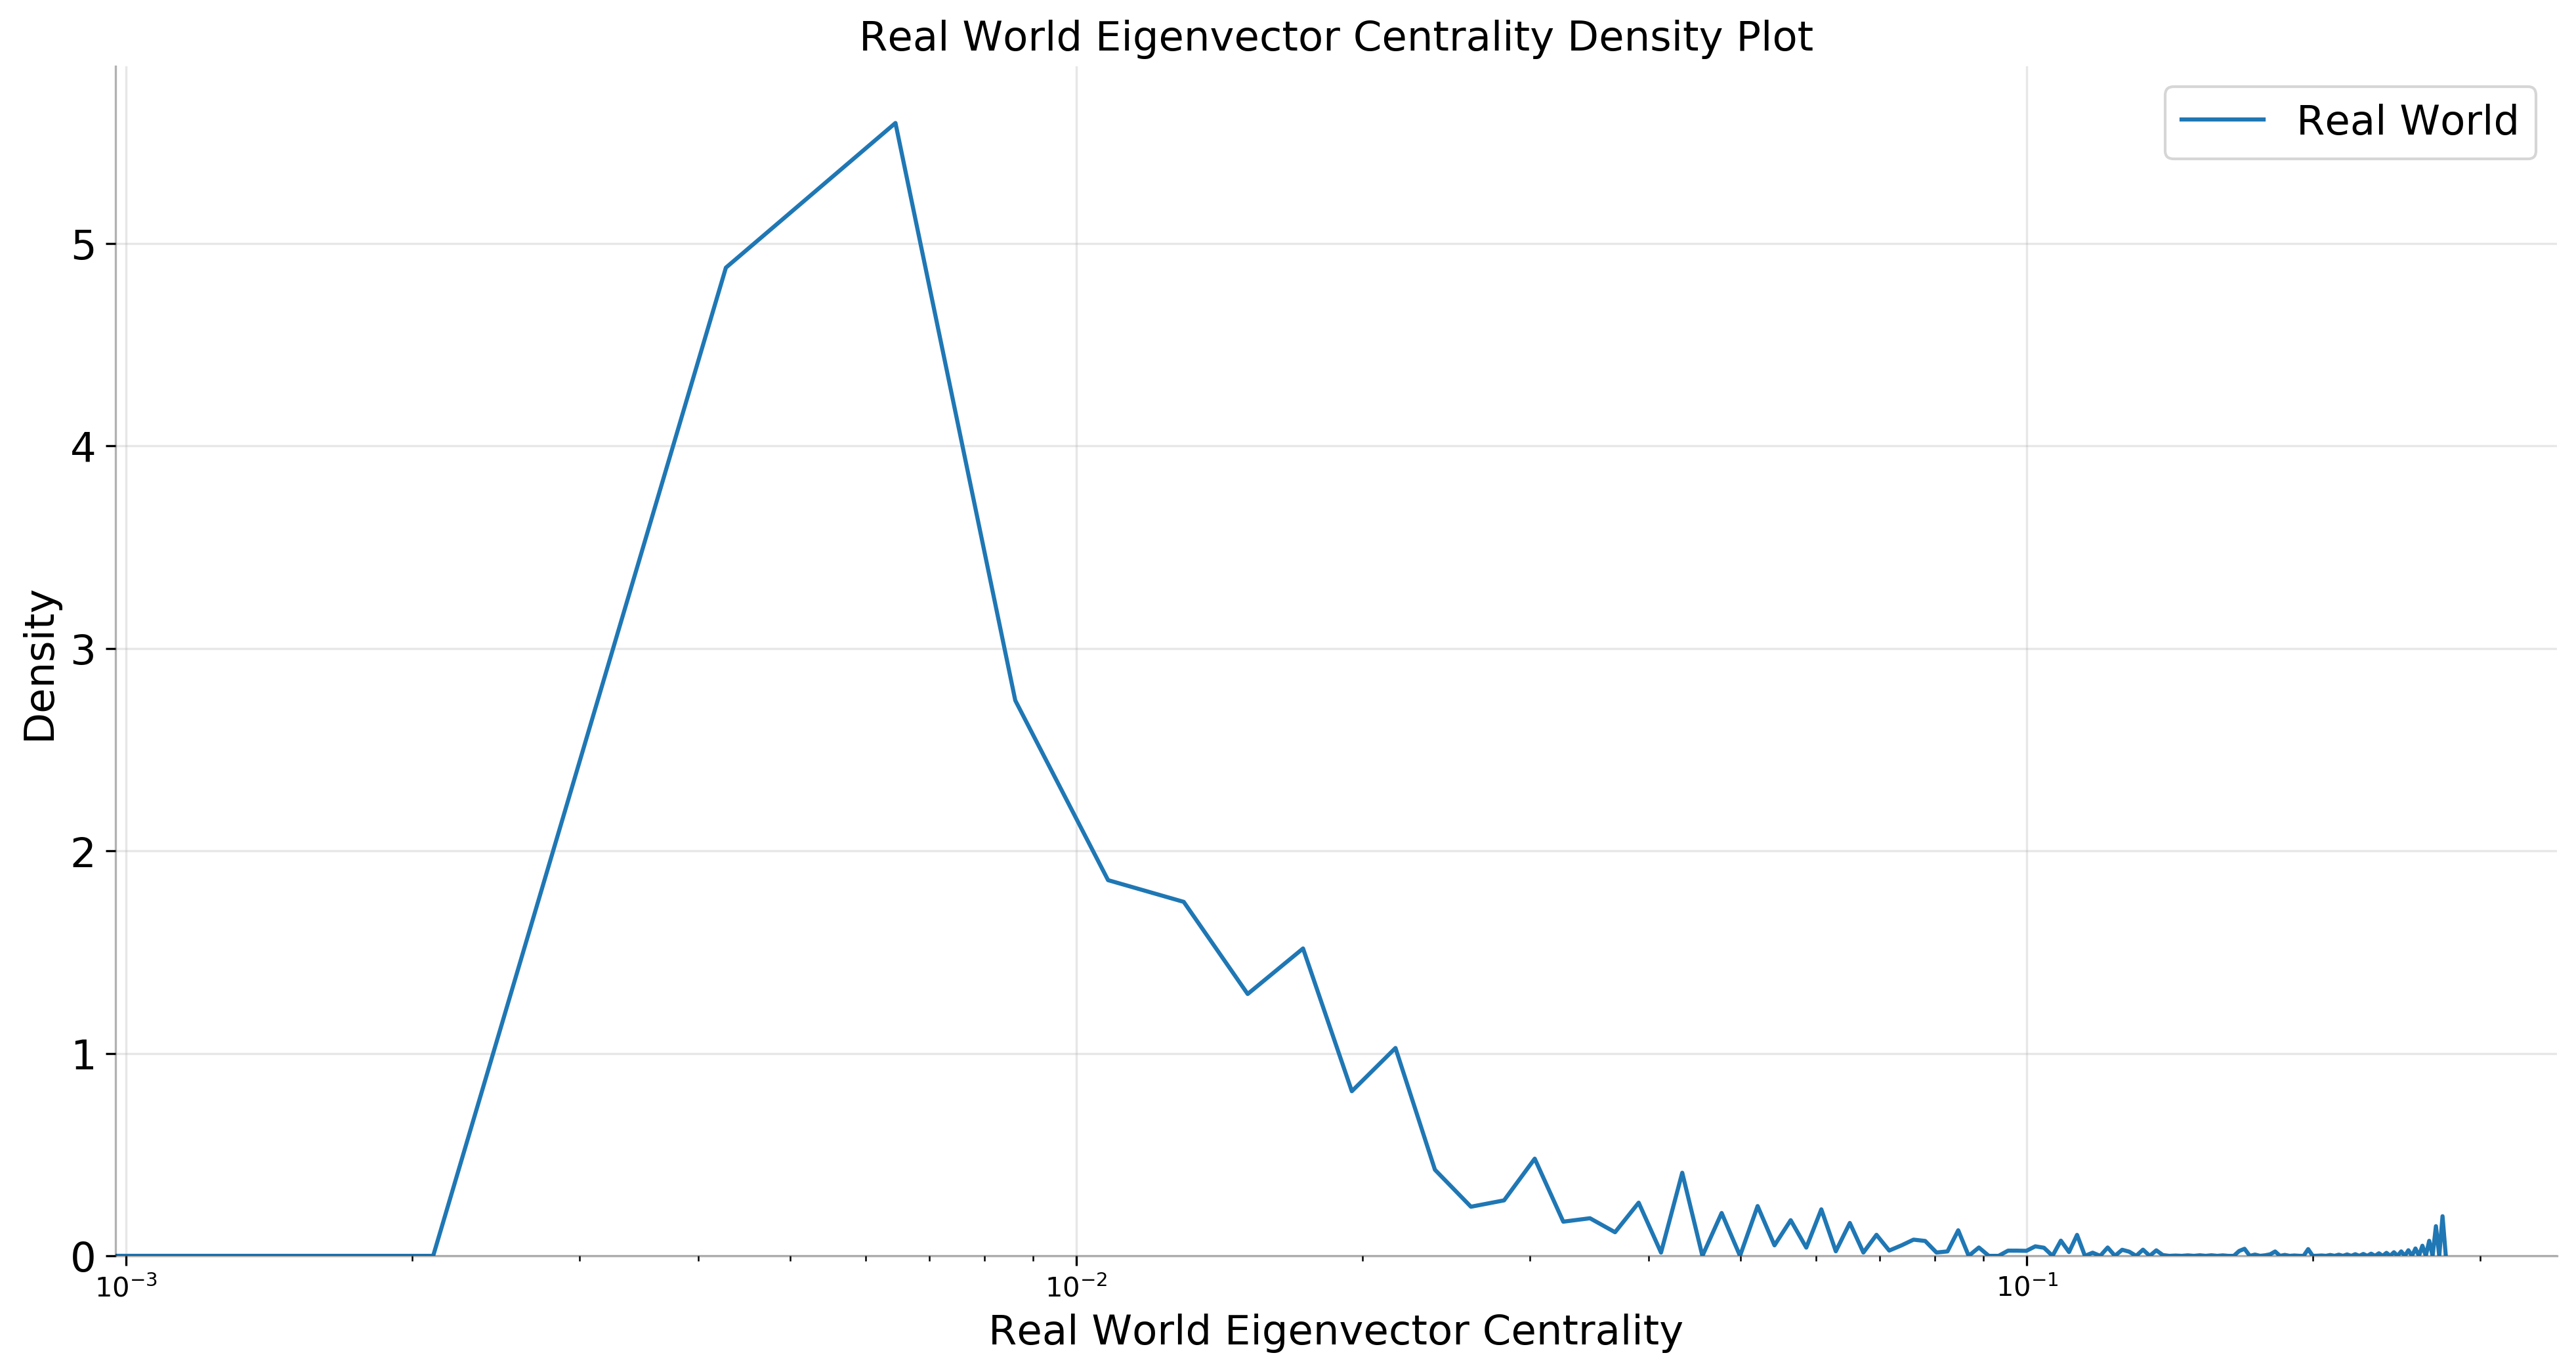

In [179]:
dist_plot(real_world_eigenvector_data, "Real World Eigenvector Centrality")

### Page Rank Centrality

In [49]:
page_rank_centrality = nx.pagerank(G, alpha=0.85)

In [50]:
page_rank_centrality = {k: v for k, v in sorted(page_rank_centrality.items(), key=lambda item: item[1], reverse=True)}

In [51]:
dict(itertools.islice(page_rank_centrality.items(), 10))#Top Ten

{'Casting': 0.004617033313518457,
 'United States': 0.0043356276270179045,
 'Car': 0.003074180195164948,
 'Episode': 0.0030310966942131653,
 'Download': 0.0029616570135002043,
 'Stock': 0.002914490159861978,
 'Season': 0.002828317164084782,
 'Video game': 0.002724167327108916,
 'Microsoft Windows': 0.002663284506299434,
 'Flight': 0.002598692428397926}

**Highest Page Rank Centrality Nodes:** Casting(0.00461), United States(0.00433), Car(0.00307)

In [144]:
real_world_pagerank_list = list(page_rank_centrality.values())

**ER PageRank Centrality**

In [146]:
er_page_rank_centrality = nx.pagerank(er, alpha=0.85)
er_page_rank_centrality = {k: v for k, v in sorted(er_page_rank_centrality.items(), key=lambda item: item[1], reverse=True)}
er_pagerank_list = list(er_page_rank_centrality.values())

**WS PageRank Centrality**

In [147]:
ws_page_rank_centrality = nx.pagerank(ws, alpha=0.85)
ws_page_rank_centrality = {k: v for k, v in sorted(ws_page_rank_centrality.items(), key=lambda item: item[1], reverse=True)}
ws_pagerank_list = list(ws_page_rank_centrality.values())

**BA PageRank Centrality**

In [148]:
ba_page_rank_centrality = nx.pagerank(ba, alpha=0.85)
ba_page_rank_centrality = {k: v for k, v in sorted(ba_page_rank_centrality.items(), key=lambda item: item[1], reverse=True)}
ba_pagerank_list = list(ba_page_rank_centrality.values())

**CM PageRank Centrality**

In [149]:
cm_page_rank_centrality = nx.pagerank(cm, alpha=0.85)
cm_page_rank_centrality = {k: v for k, v in sorted(cm_page_rank_centrality.items(), key=lambda item: item[1], reverse=True)}
cm_pagerank_list = list(cm_page_rank_centrality.values())

In [180]:
pagerank_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_pagerank_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_pagerank_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_pagerank_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_pagerank_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_pagerank_list
    }
}
real_world_pagerank_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_pagerank_list
    }
}

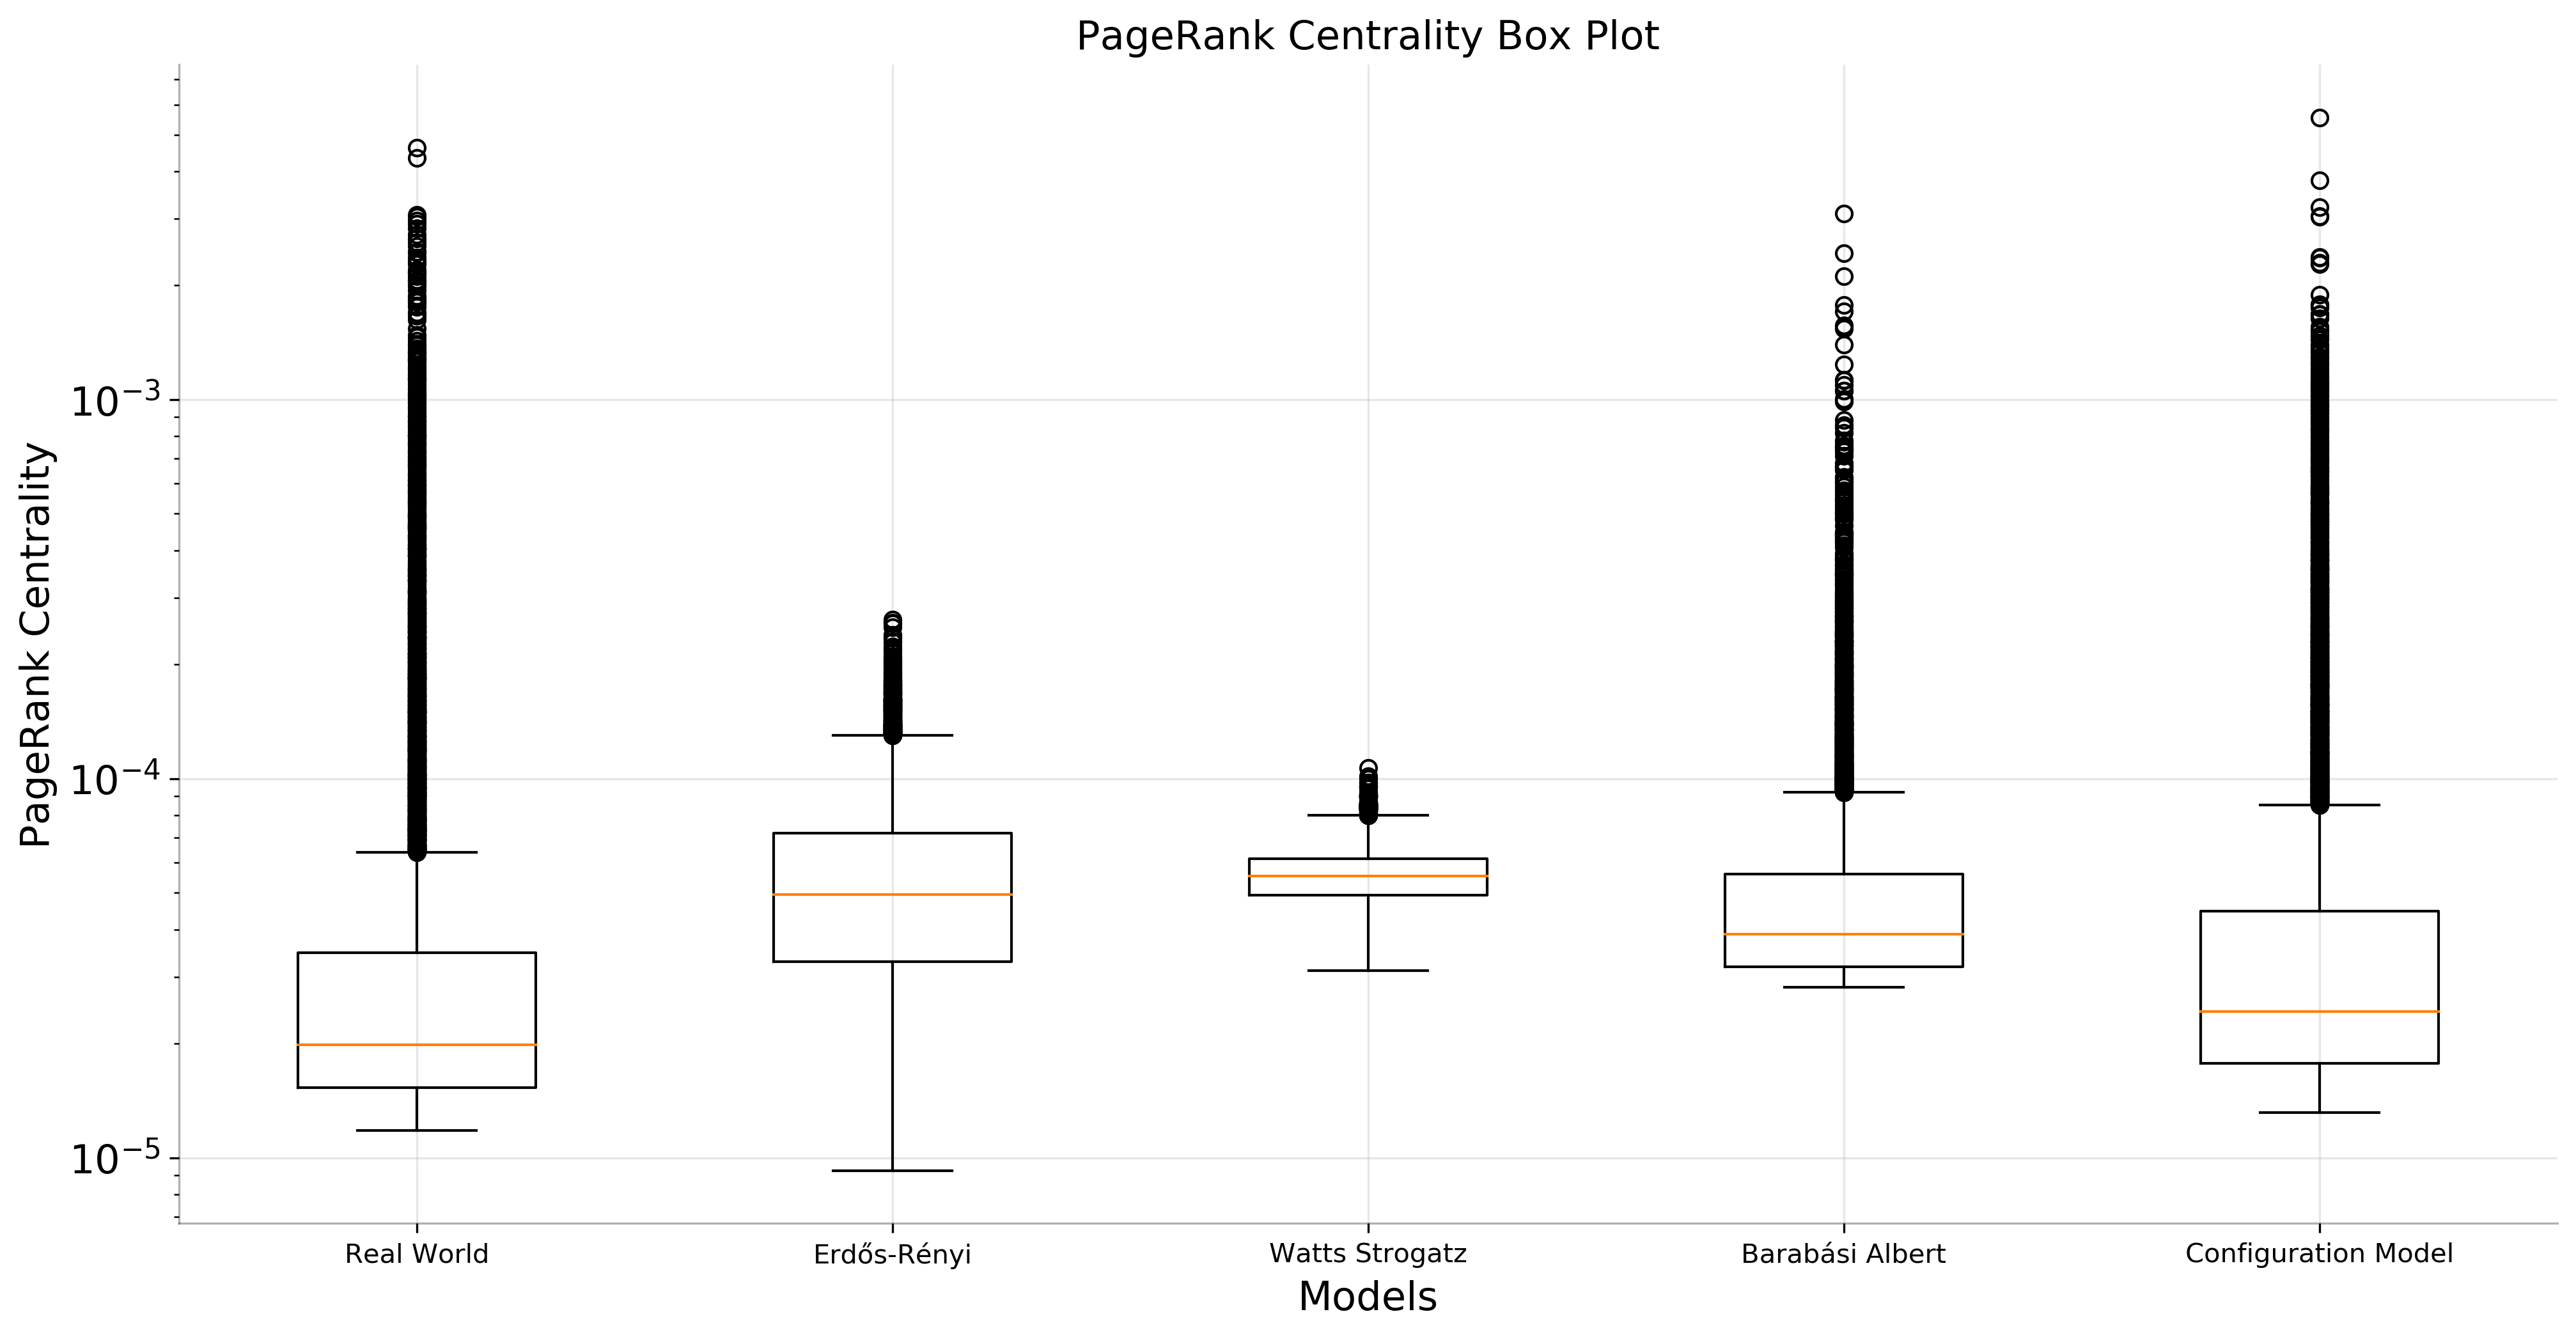

In [155]:
box_plot(pagerank_data, "PageRank Centrality")

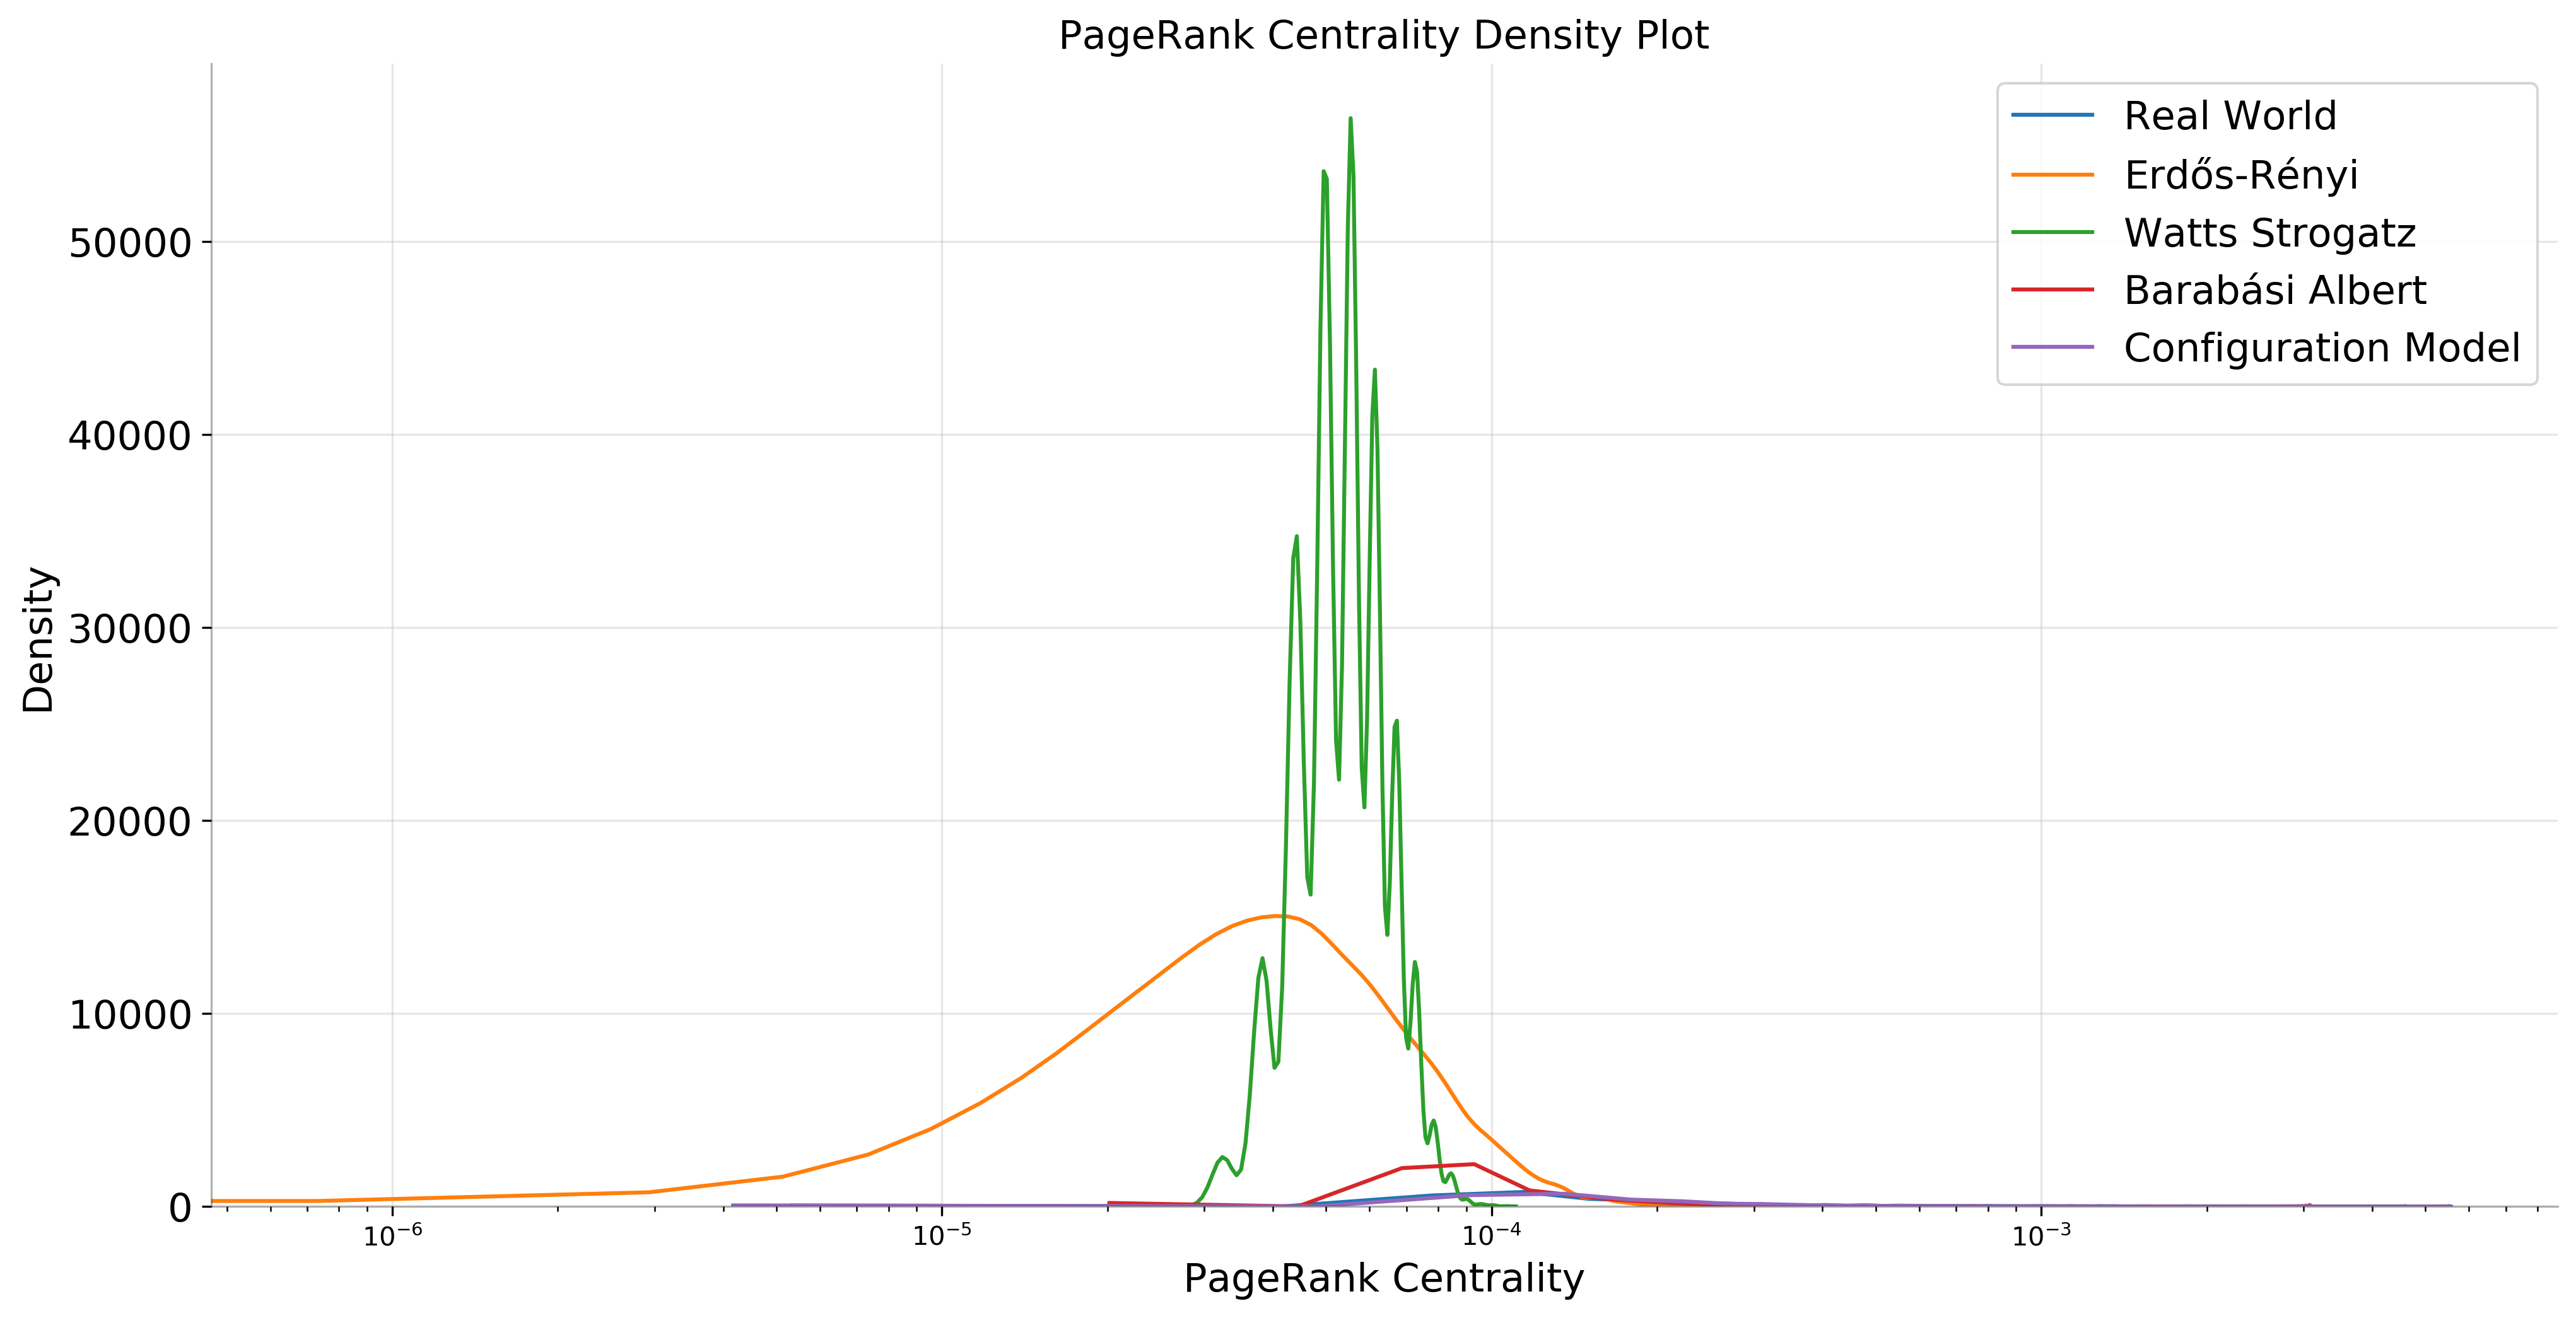

In [160]:
dist_plot(pagerank_data, "PageRank Centrality")

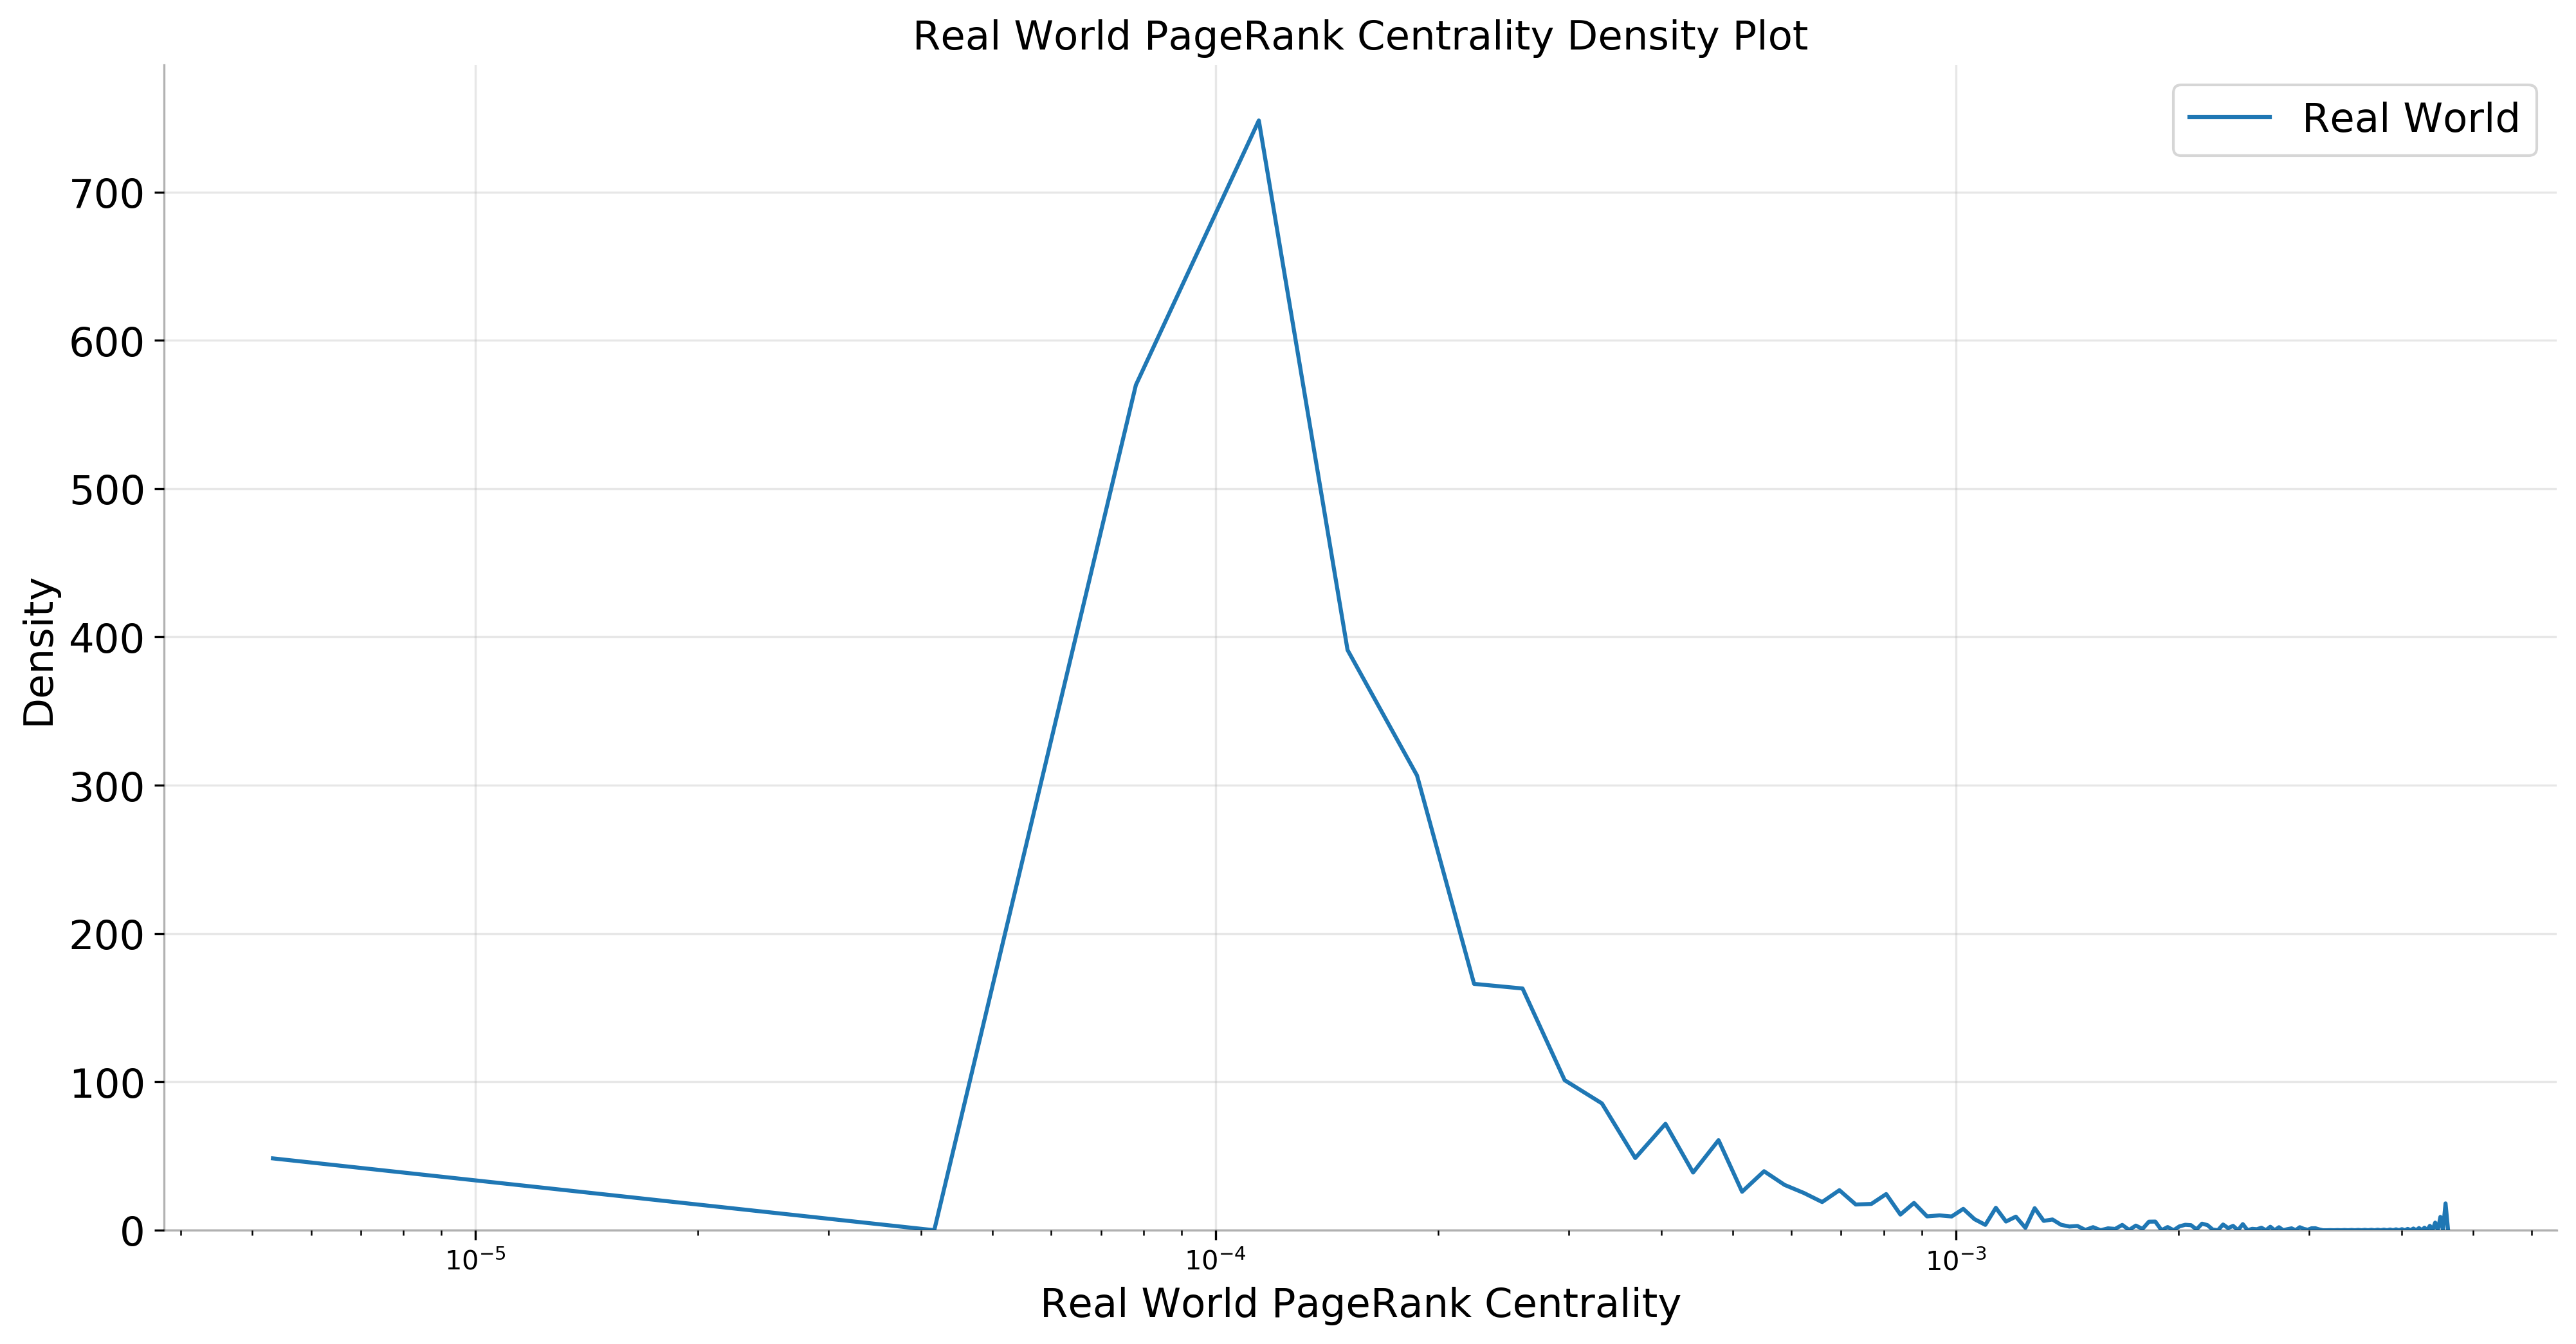

In [182]:
dist_plot(real_world_pagerank_data, "Real World PageRank Centrality")

### Katz Centrality

In [52]:
katz_centrality = nx.katz_centrality(G)

In [53]:
katz_centrality = {k: v for k, v in sorted(katz_centrality.items(), key=lambda item: item[1], reverse=True)}

In [54]:
dict(itertools.islice(katz_centrality.items(), 10))#Top Ten

{'Casting': 0.25575785222965014,
 'United States': 0.14971110731326653,
 'Video game': 0.134386458932625,
 'Episode': 0.13420289381646994,
 'Lyrics': 0.12561697809927316,
 'Season': 0.12139904112021344,
 'Flight': 0.10651740292125488,
 'Download': 0.10056982853363333,
 'Recipe': 0.10034532320946812,
 'Car': 0.09715559100399218}

**Highest Katz Centrality Nodes:** Casting(0.255), United States(0.149), Video Games(0.134)

In [187]:
real_world_katz_list = list(katz_centrality.values())

**ER Katz Centrality**

In [188]:
er_katz_centrality = nx.katz_centrality(er)
er_katz_centrality = {k: v for k, v in sorted(er_katz_centrality.items(), key=lambda item: item[1], reverse=True)}
er_katz_list = list(er_katz_centrality.values())

**WS Katz Centrality**

In [189]:
ws_katz_centrality = nx.katz_centrality(ws)
ws_katz_centrality = {k: v for k, v in sorted(ws_katz_centrality.items(), key=lambda item: item[1], reverse=True)}
ws_katz_list = list(ws_katz_centrality.values())

**BA Katz Centrality**

Generates Error

In [ ]:
ba_katz_centrality = nx.katz_centrality(ba)
ba_katz_centrality = {k: v for k, v in sorted(ba_katz_centrality.items(), key=lambda item: item[1], reverse=True)}
ba_katz_list = list(ba_katz_centrality.values())

In [194]:
ba.number_of_edges()

71992

**CM Katz Centrality**

In [191]:
cm_katz_centrality = nx.katz_centrality(cm)
cm_katz_centrality = {k: v for k, v in sorted(cm_katz_centrality.items(), key=lambda item: item[1], reverse=True)}
cm_katz_list = list(cm_katz_centrality.values())

In [195]:
katz_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_katz_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_katz_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_katz_list
    },
    #"barabasi–Albert":{
    #    "name":"Barabási Albert",
    #    "list":ba_katz_list
    #},
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_katz_list
    }
}
real_world_katz_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_katz_list
    }
}

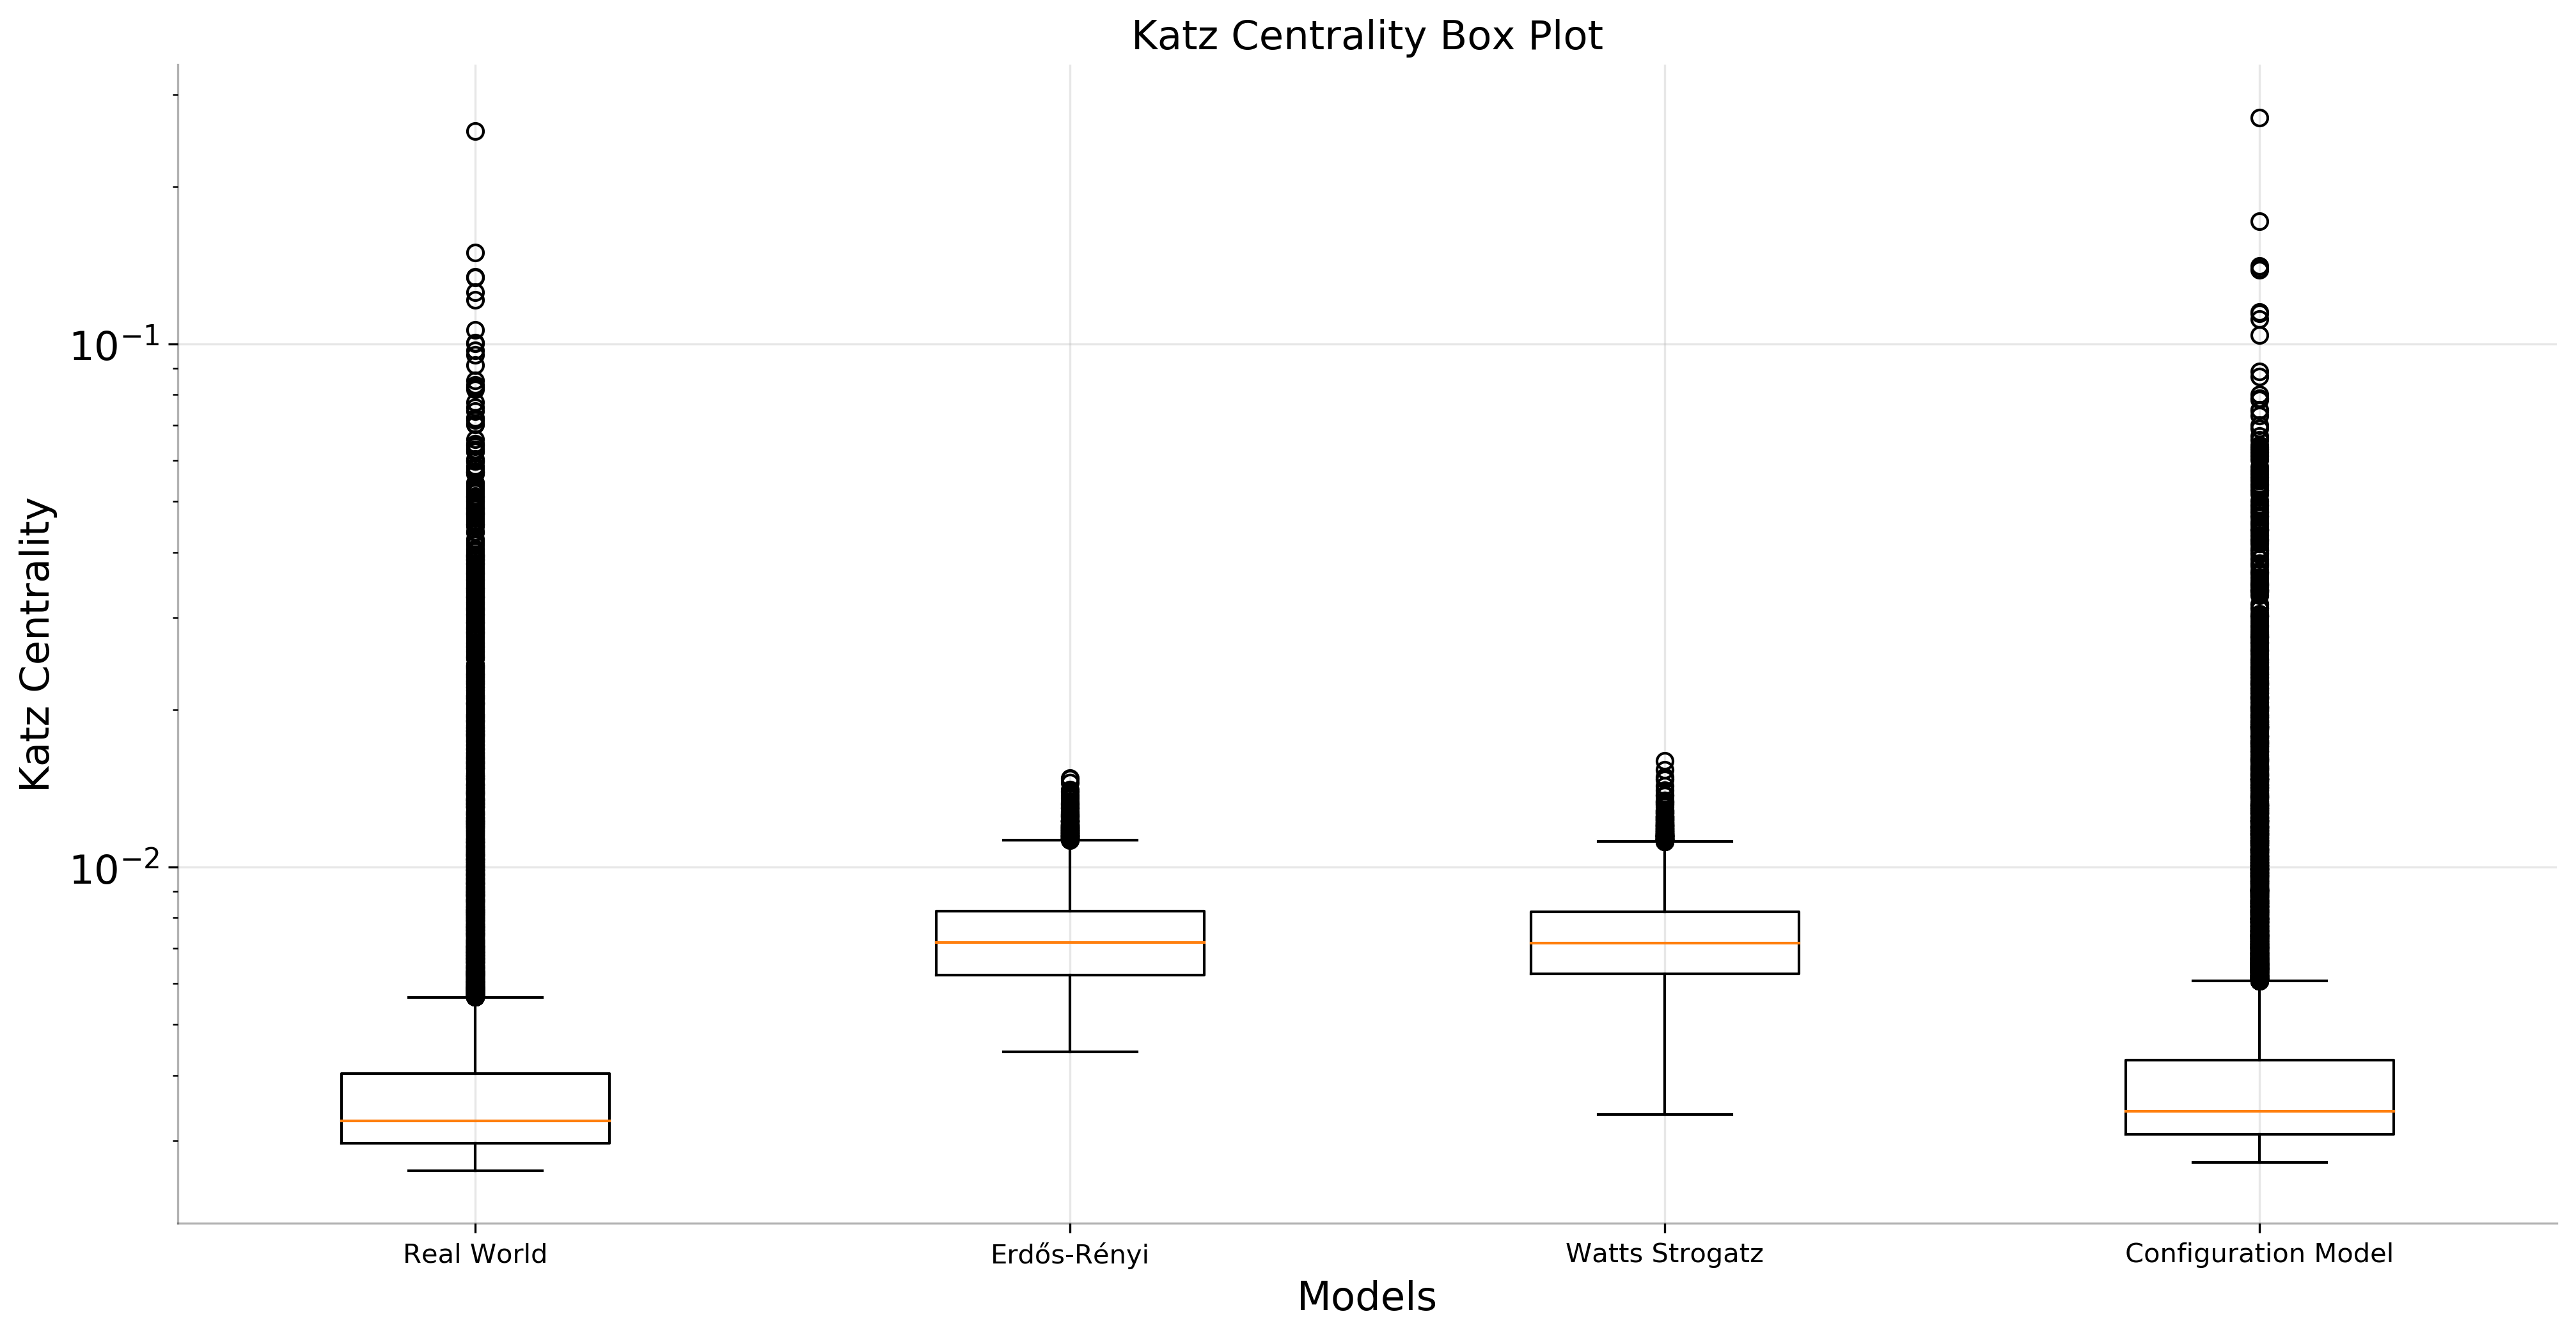

In [196]:
box_plot(katz_data, "Katz Centrality")

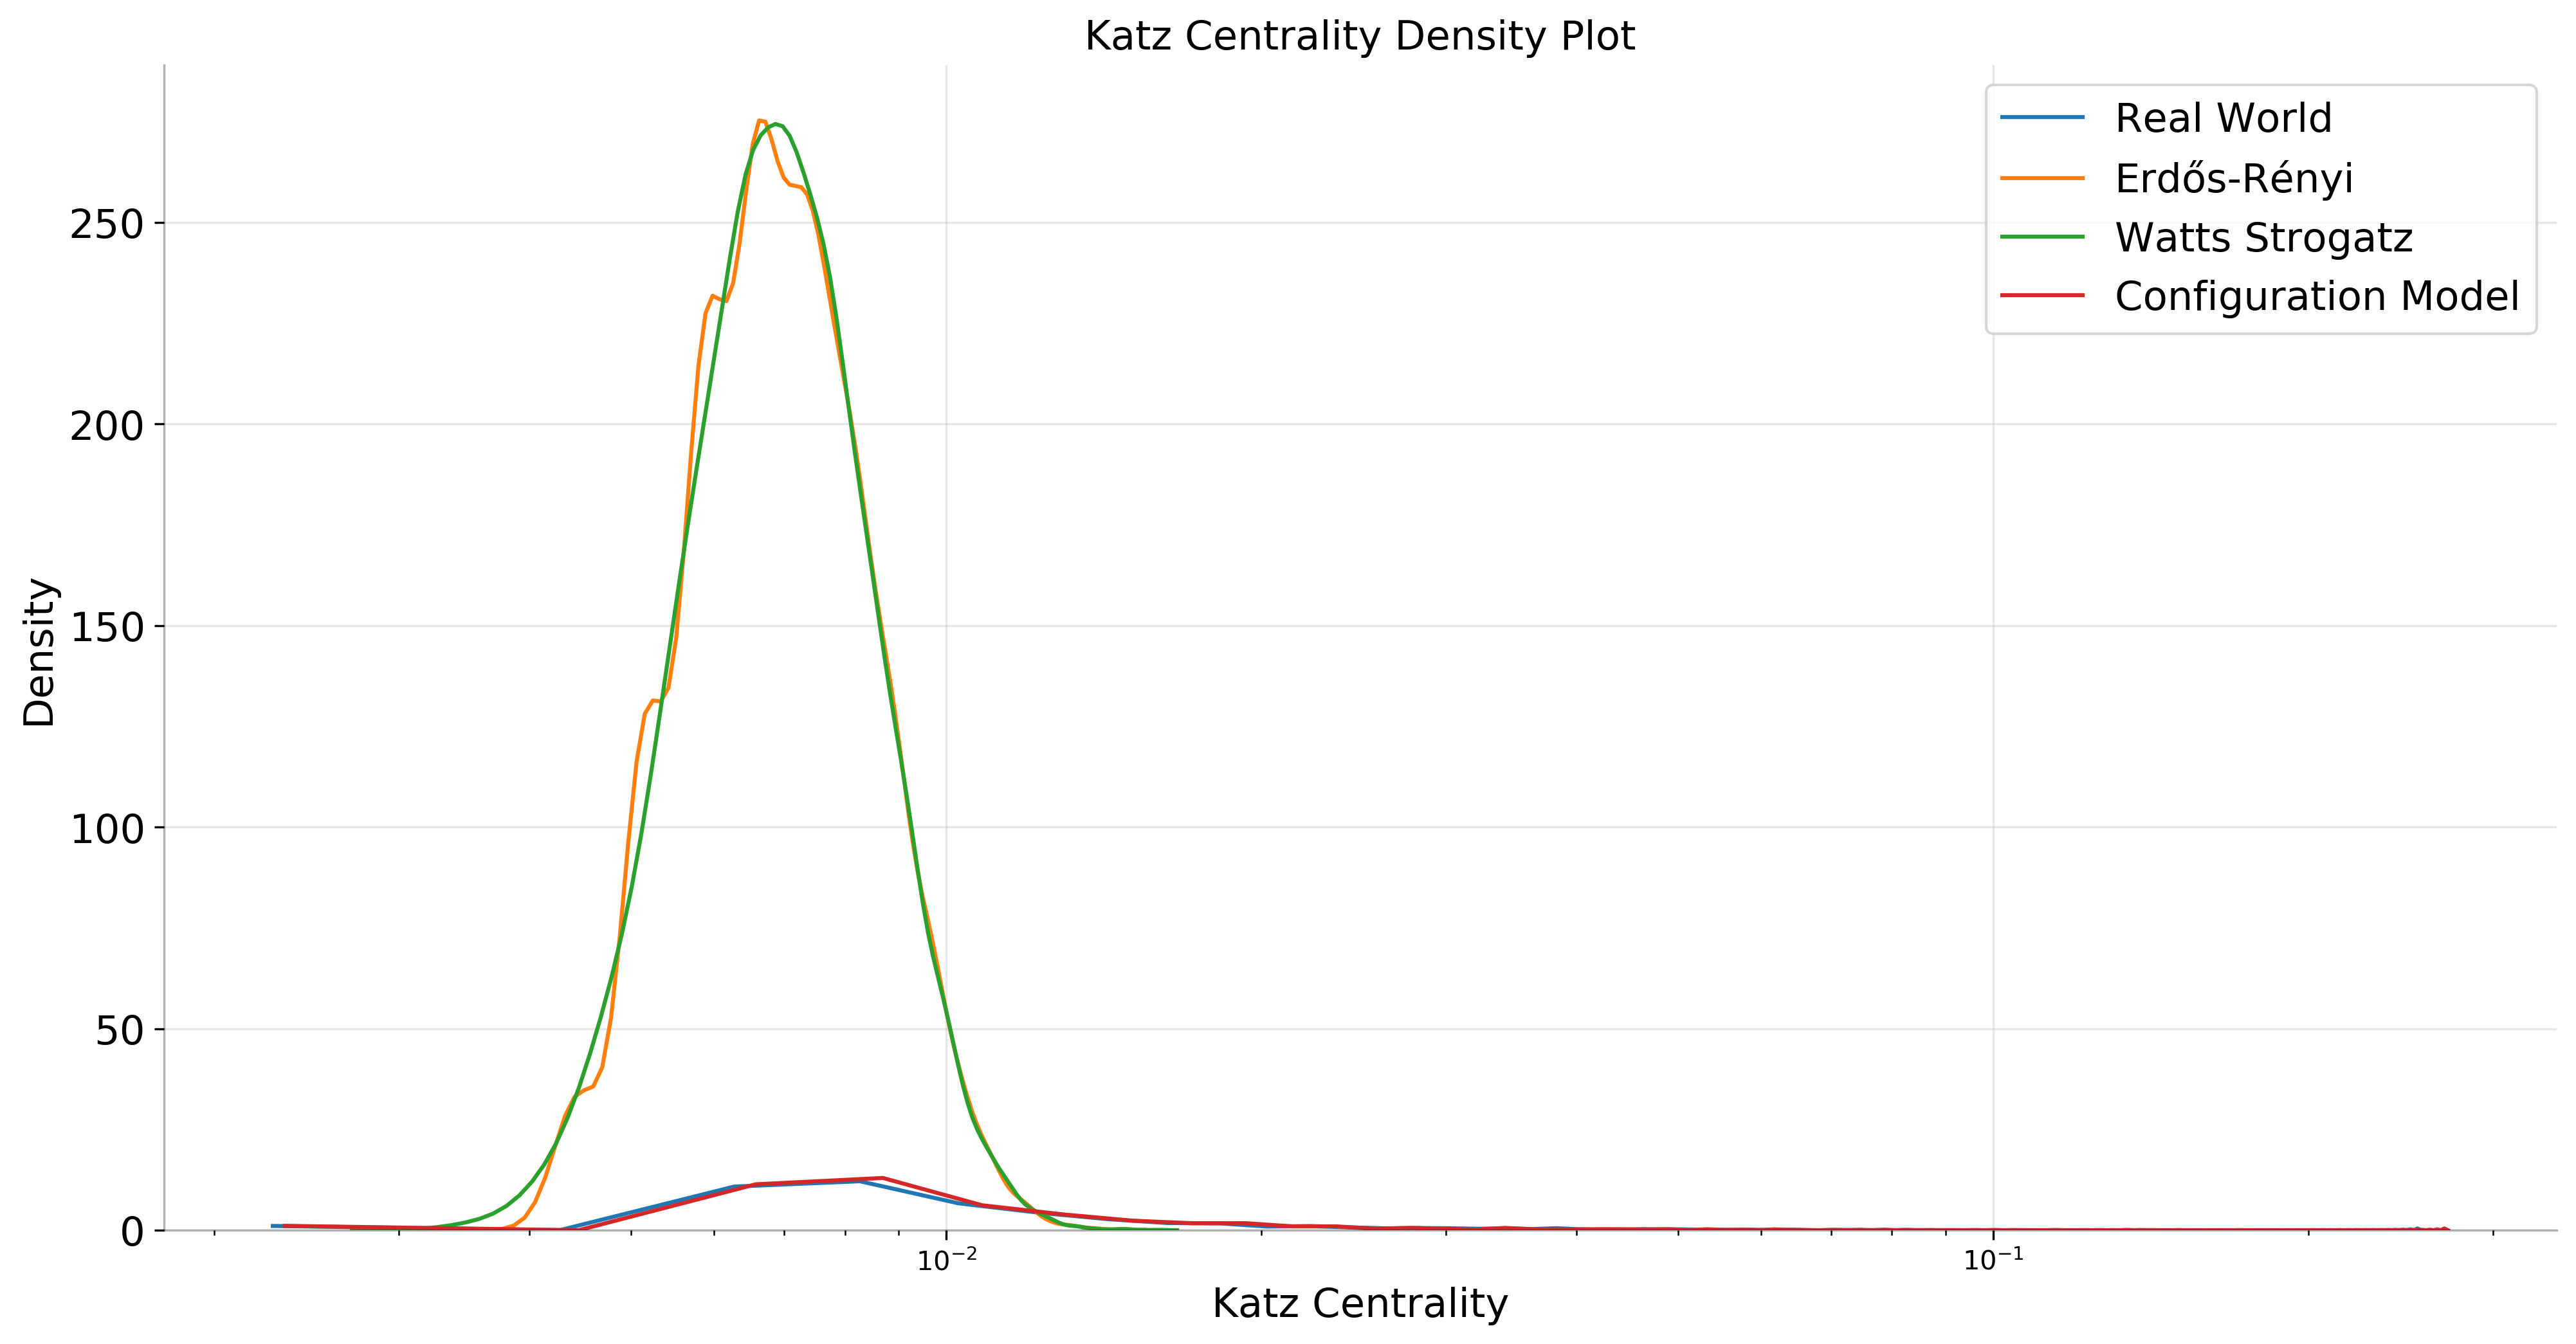

In [198]:
dist_plot(katz_data, "Katz Centrality")

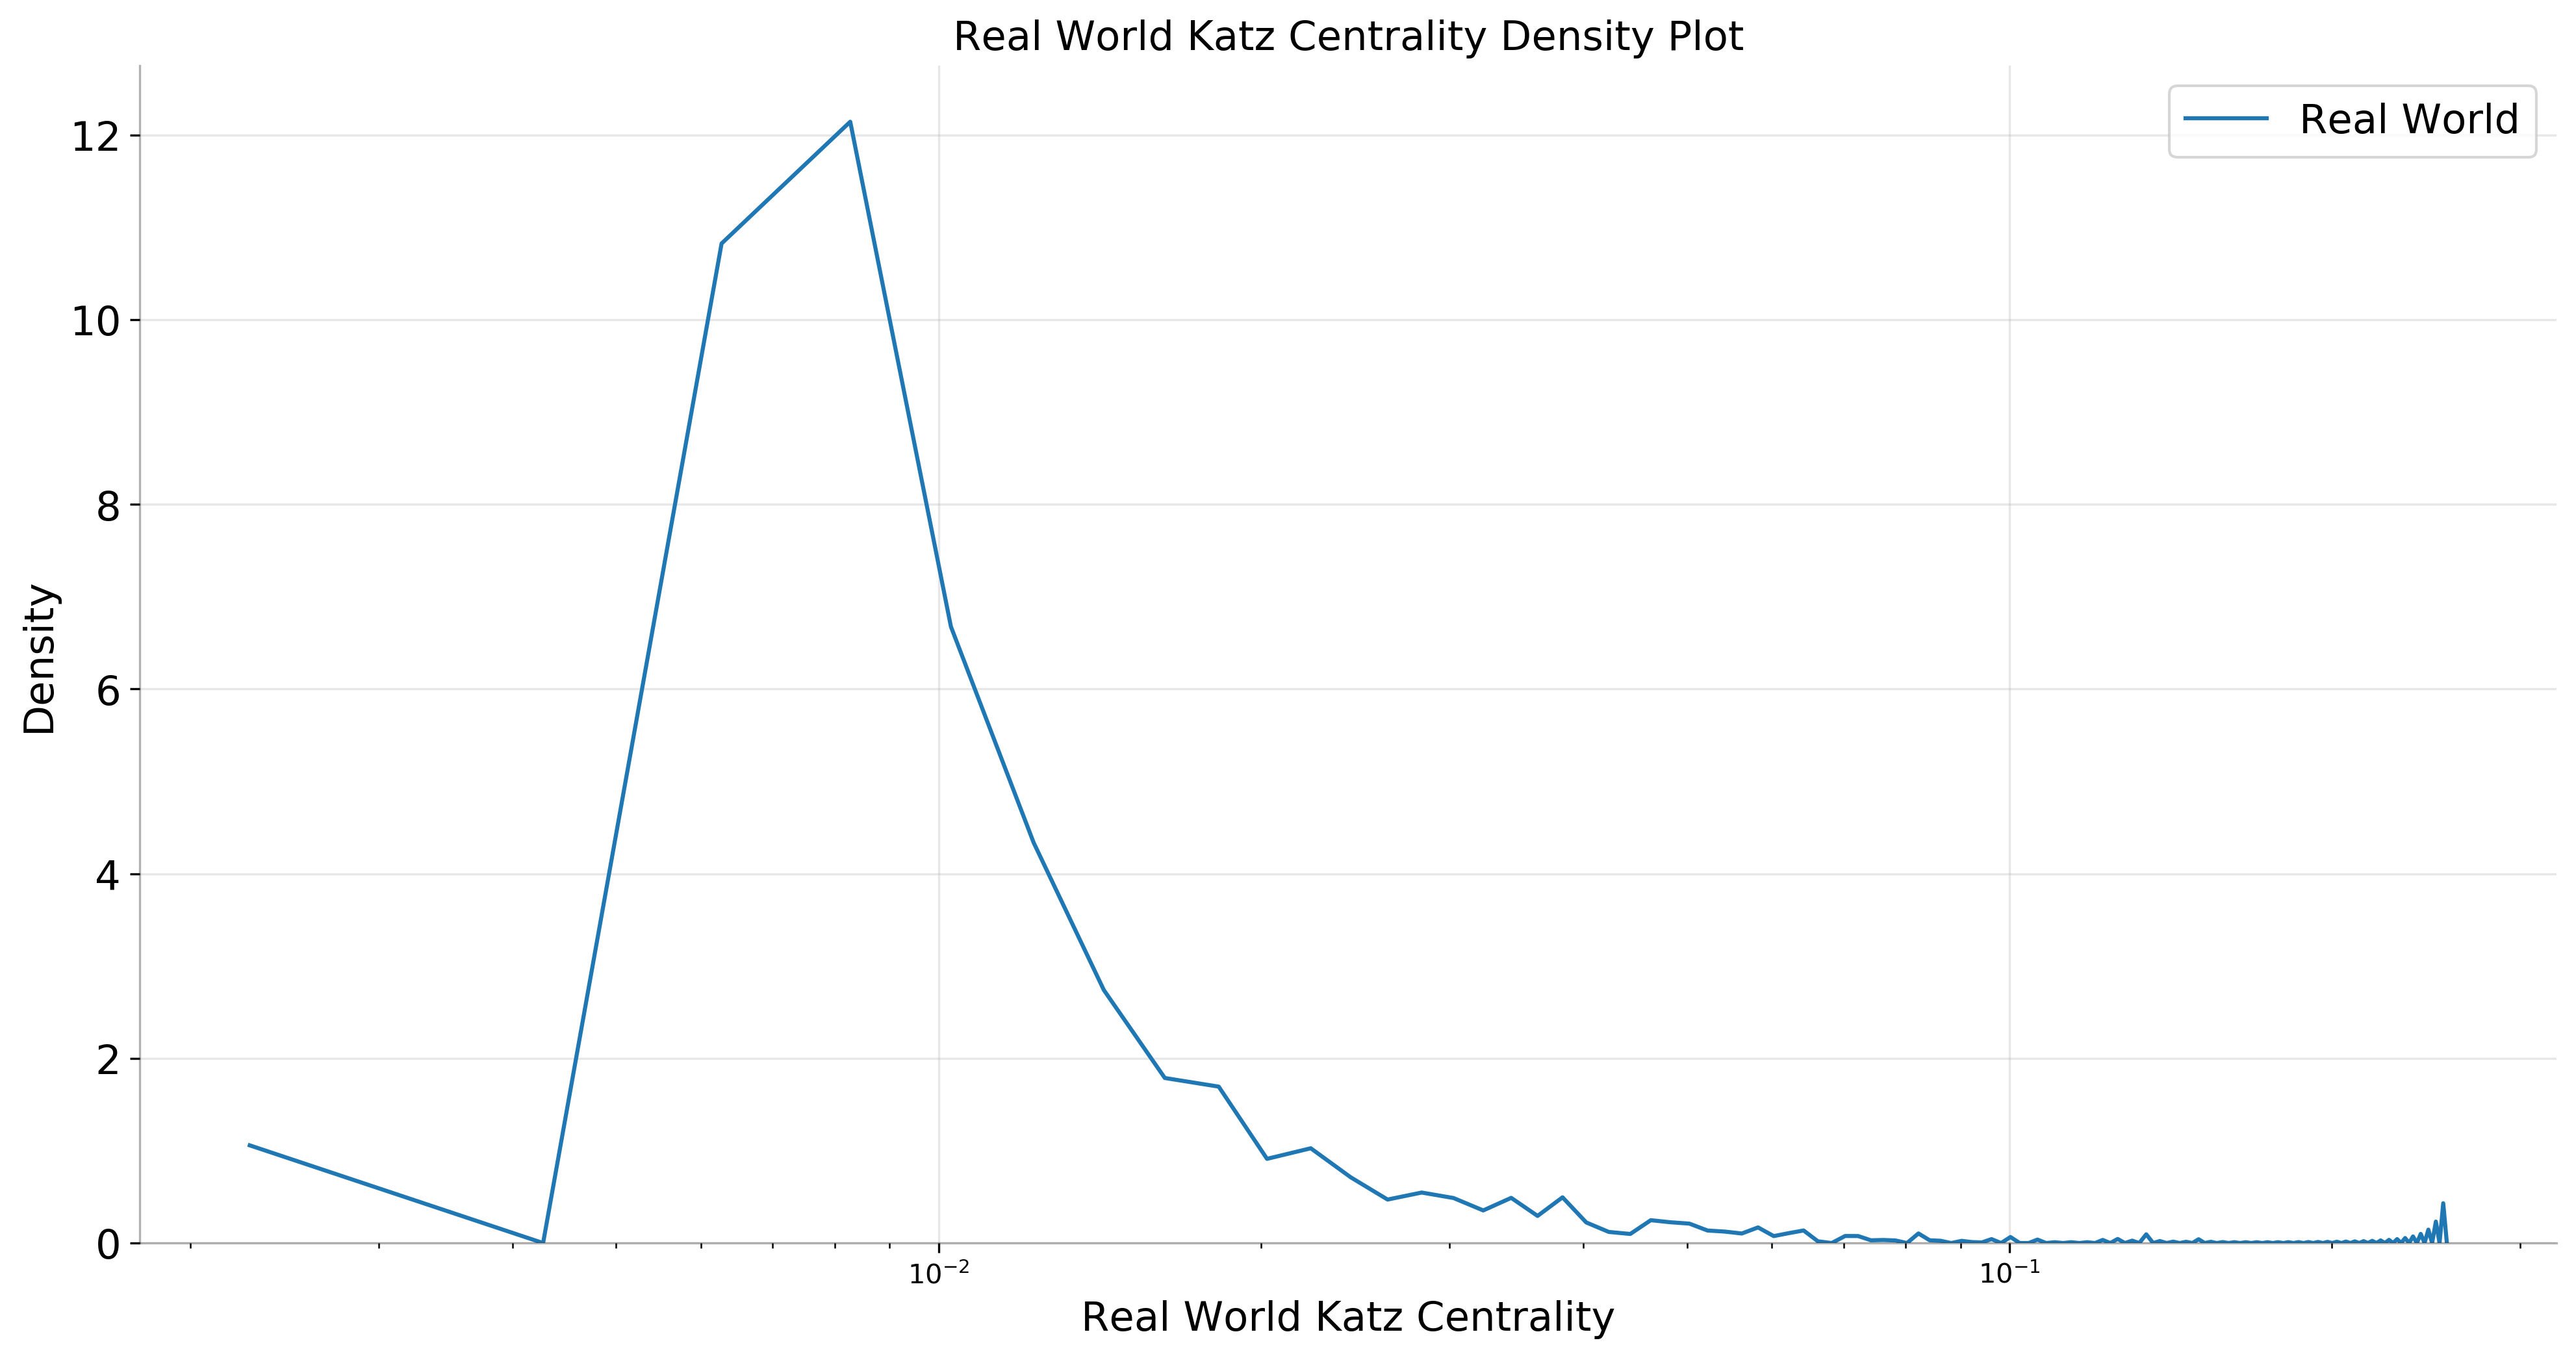

In [199]:
dist_plot(real_world_katz_data, "Real World Katz Centrality")

# Geometric Centrality

### Closeness Centrality

It takes too much time, around 15 mins.

In [30]:
closeness_centrality = nx.closeness_centrality(G)

In [31]:
closeness_centrality = {k: v for k, v in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)}

In [56]:
dict(itertools.islice(closeness_centrality.items(), 10))#Top Ten

{'United States': 0.1976665801751352,
 'Company': 0.18166298848748513,
 'Casting': 0.18097611733983443,
 'Job': 0.17821286383519316,
 'India': 0.1774245815355764,
 'Americans': 0.1768818639205195,
 'How-to': 0.17556248065210625,
 'Indian people': 0.1747759659103886,
 'Car': 0.17476255955561515,
 'Definition': 0.1739380190565895}

**Highest Closeness Centrality Nodes:** United States(0.197), Company(0.181), Casting(0.180)

In [111]:
save(closeness_centrality, "closeness_centrality.json")

In [12]:
closeness_centrality = load("closeness_centrality.json")
closeness_list = list(closeness_centrality.values())

**ER Closeness Centrality**

In [204]:
er_closeness_centrality = nx.closeness_centrality(er)
er_closeness_centrality = {k: v for k, v in sorted(er_closeness_centrality.items(), key=lambda item: item[1], reverse=True)}
er_closeness_list = list(er_closeness_centrality.values())

In [205]:
save(er_closeness_centrality, "er_closeness_centrality.json")

In [13]:
er_closeness_centrality = load("er_closeness_centrality.json")
er_closeness_list = list(er_closeness_centrality.values())

**WS Closeness Centrality**

In [14]:
ws_closeness_centrality = nx.closeness_centrality(ws)
ws_closeness_centrality = {k: v for k, v in sorted(ws_closeness_centrality.items(), key=lambda item: item[1], reverse=True)}
ws_closeness_list = list(ws_closeness_centrality.values())
save(ws_closeness_centrality, "ws_closeness_centrality.json")

In [5]:
ws_closeness_centrality = load("ws_closeness_centrality.json")
ws_closeness_list = list(ws_closeness_centrality.values())

**BA Closeness Centrality**

In [ ]:
ba_closeness_centrality = nx.closeness_centrality(ba)
ba_closeness_centrality = {k: v for k, v in sorted(ba_closeness_centrality.items(), key=lambda item: item[1], reverse=True)}
ba_closeness_list = list(ba_closeness_centrality.values())
save(ba_closeness_centrality, "ba_closeness_centrality.json")

In [17]:
ba_closeness_centrality = load("ba_closeness_centrality.json")
ba_closeness_list = list(ba_closeness_centrality.values())

**CM Closeness Centrality**

In [ ]:
cm_closeness_centrality = nx.closeness_centrality(cm)
cm_closeness_centrality = {k: v for k, v in sorted(cm_closeness_centrality.items(), key=lambda item: item[1], reverse=True)}
cm_closeness_list = list(cm_closeness_centrality.values())
save(cm_closeness_centrality, "cm_closeness_centrality.json")

In [15]:
cm_closeness_centrality = load("cm_closeness_centrality.json")
cm_closeness_list = list(cm_closeness_centrality.values())

In [18]:
closeness_data = {
    "real_word":{
        "name":"Real World",
        "list":closeness_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_closeness_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_closeness_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_closeness_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_closeness_list
    }
}
real_world_closeness_data = {
    "real_word":{
        "name":"Real World",
        "list":closeness_list
    }
}

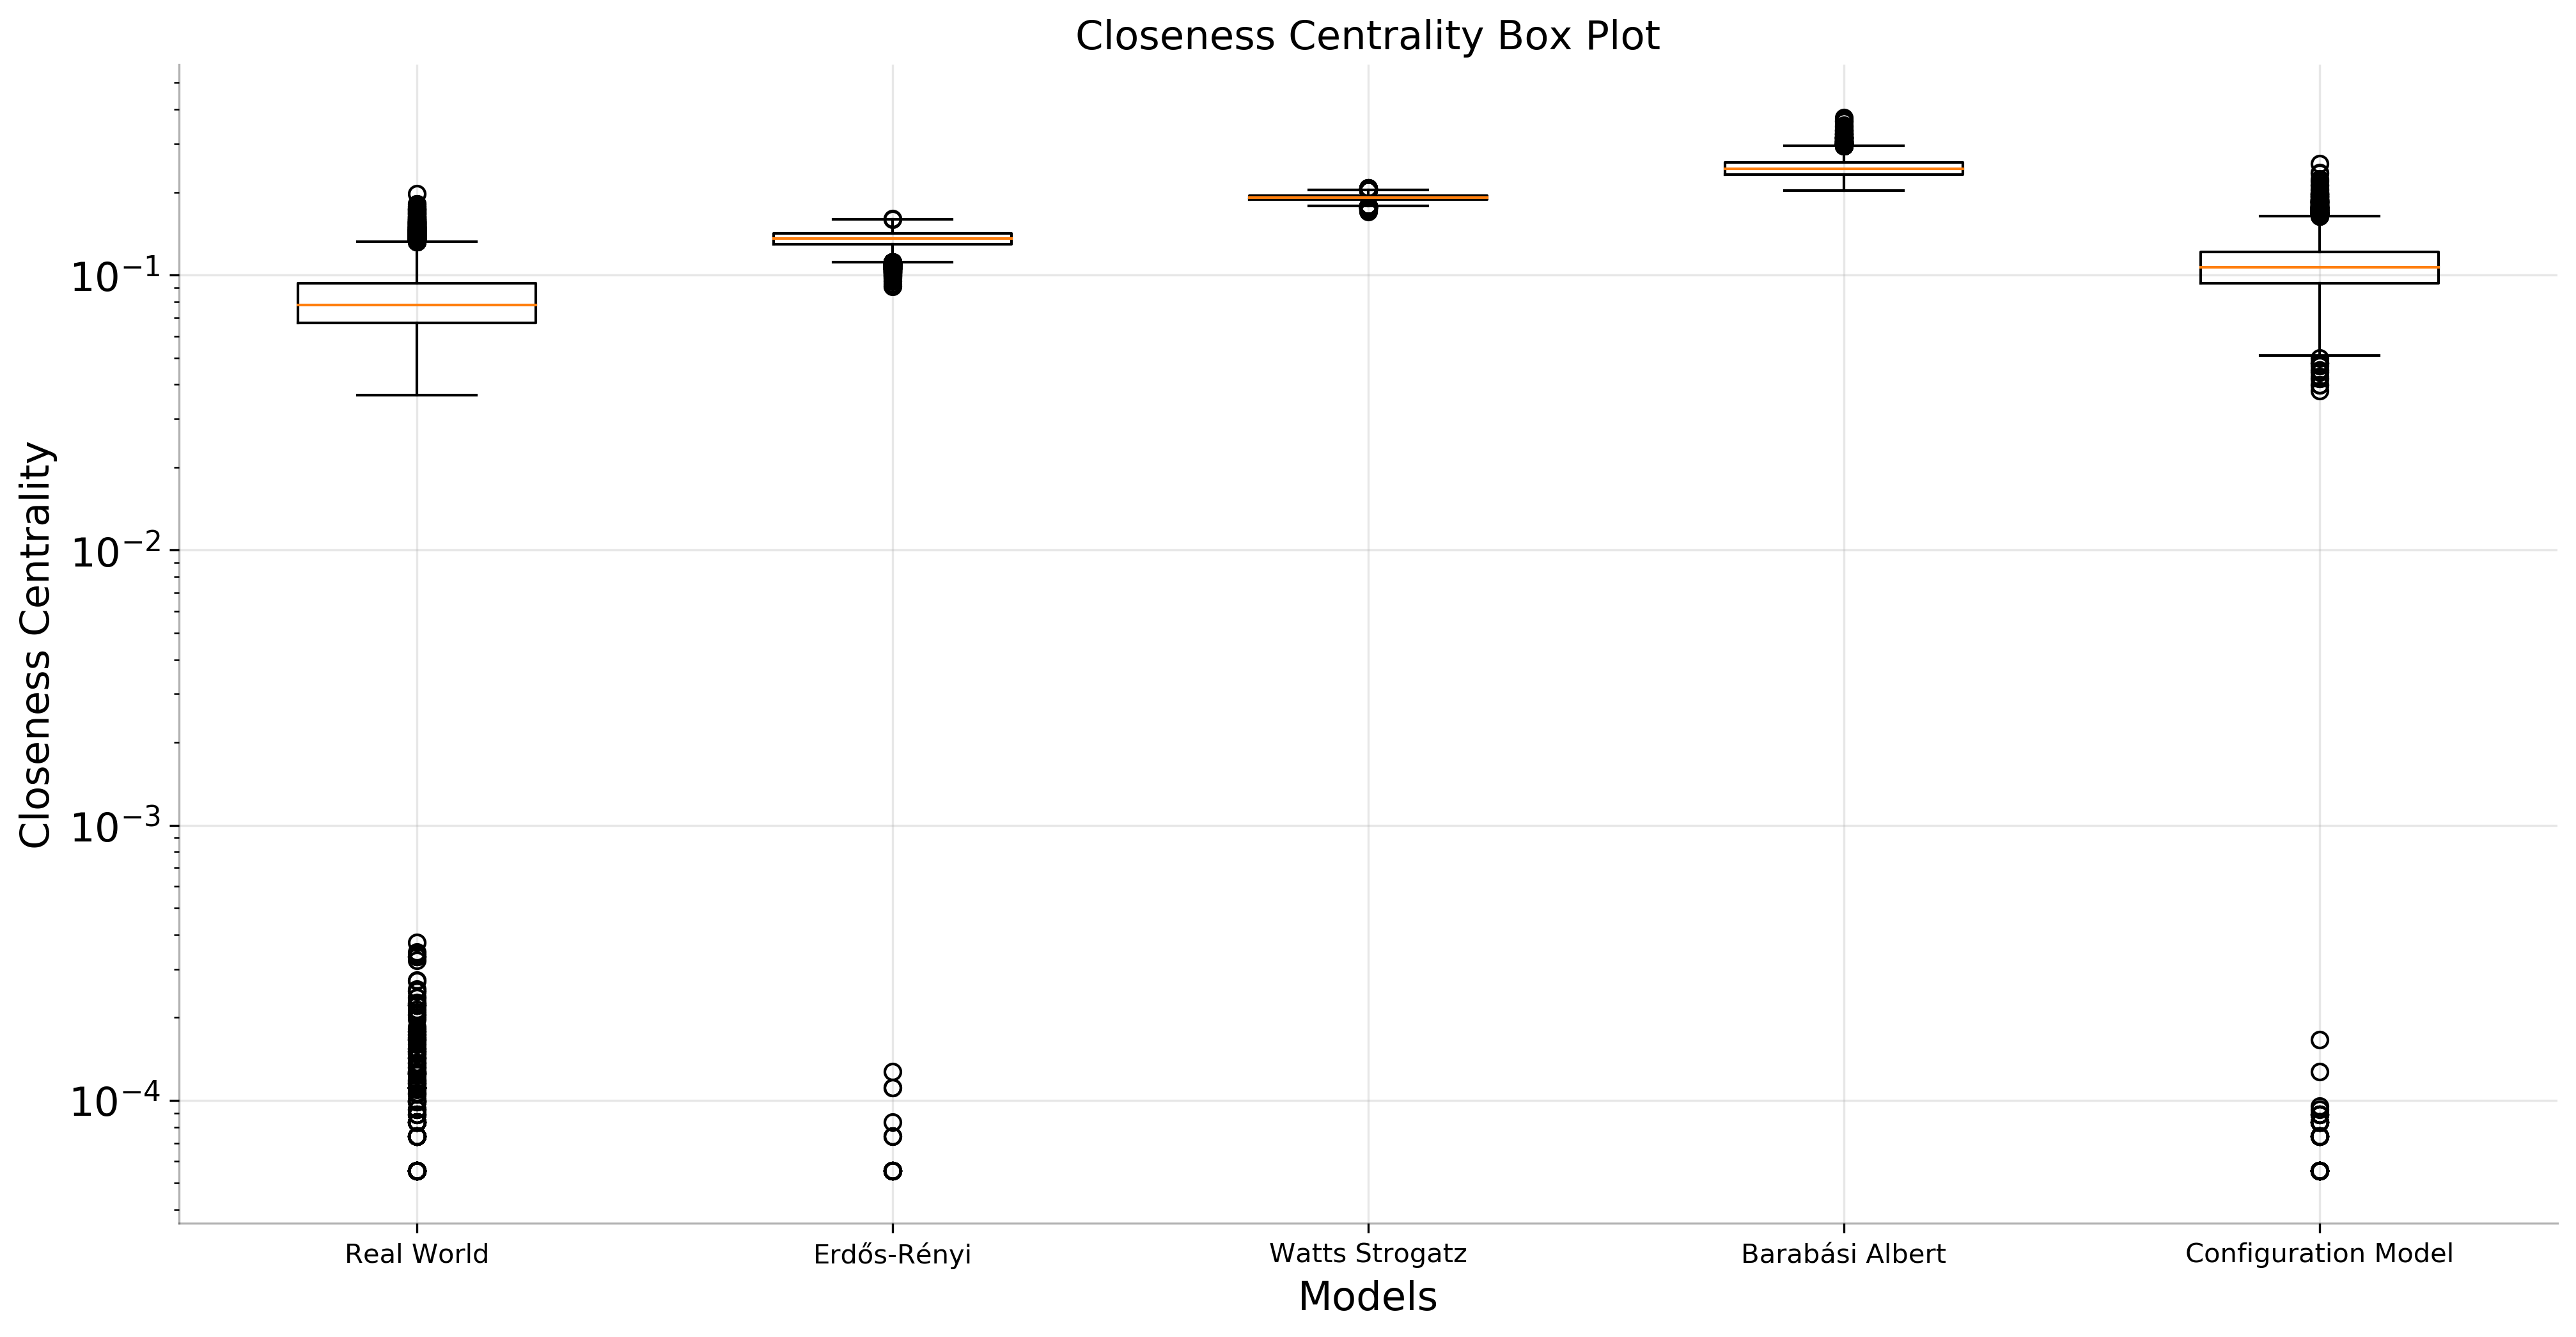

In [19]:
box_plot(closeness_data, "Closeness Centrality")

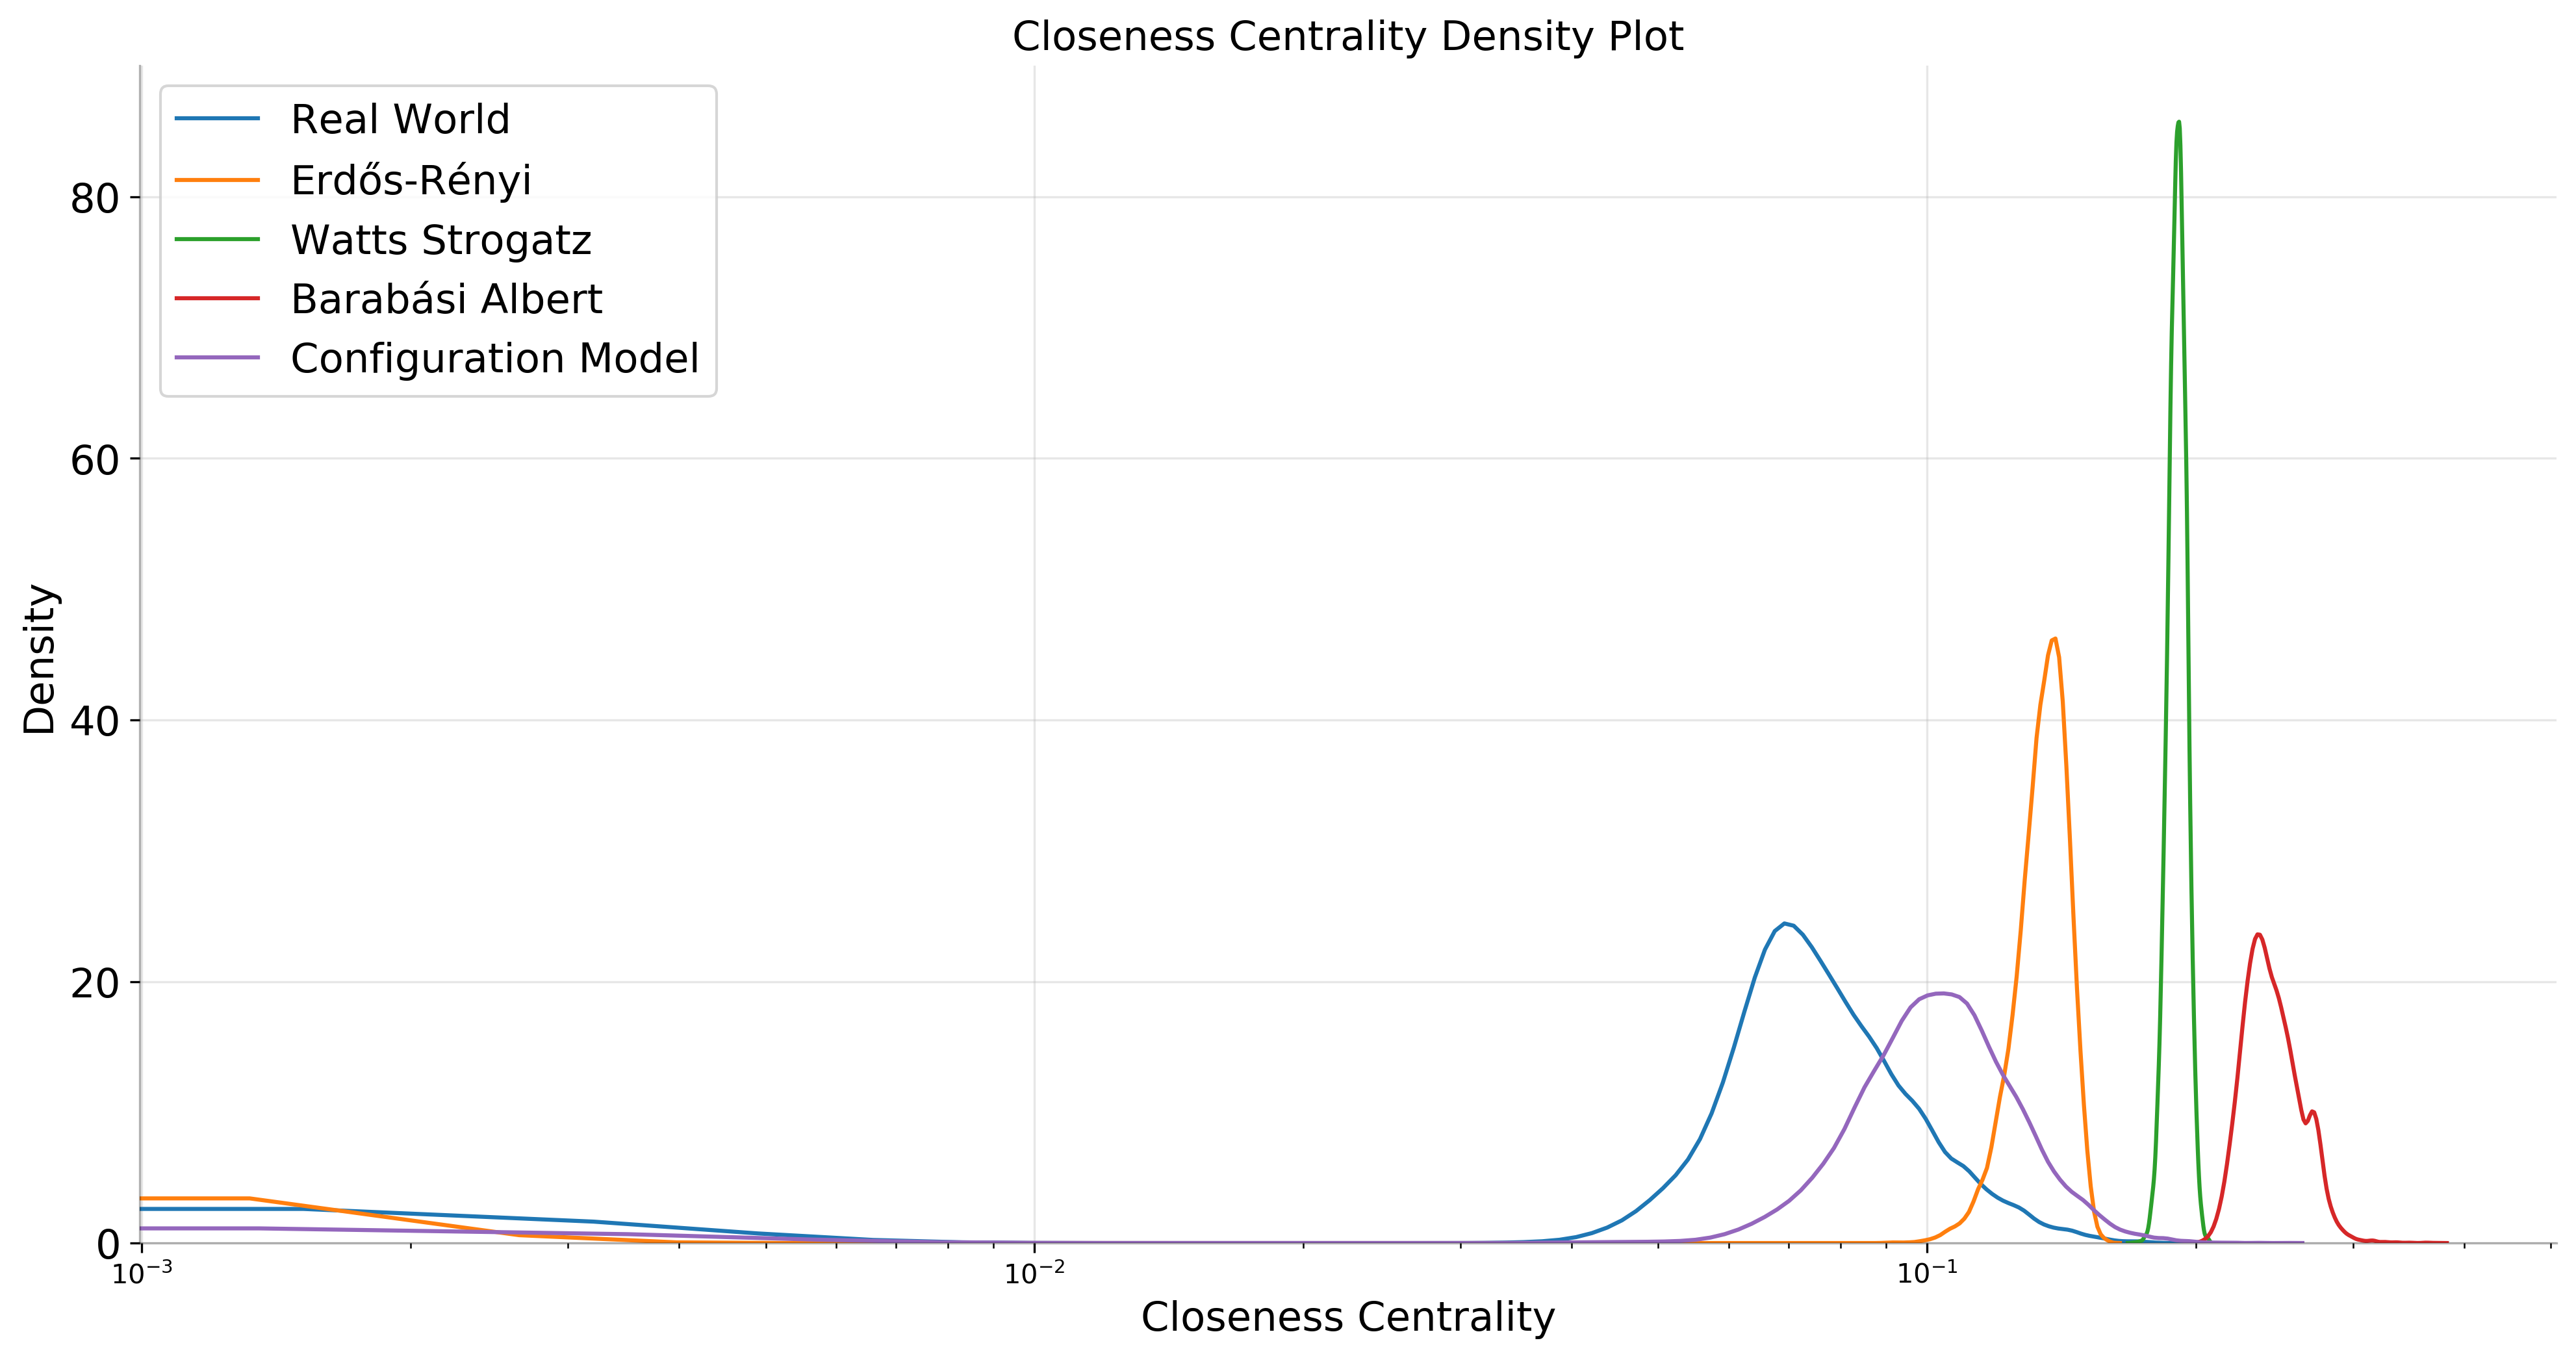

In [20]:
dist_plot(closeness_data, "Closeness Centrality")

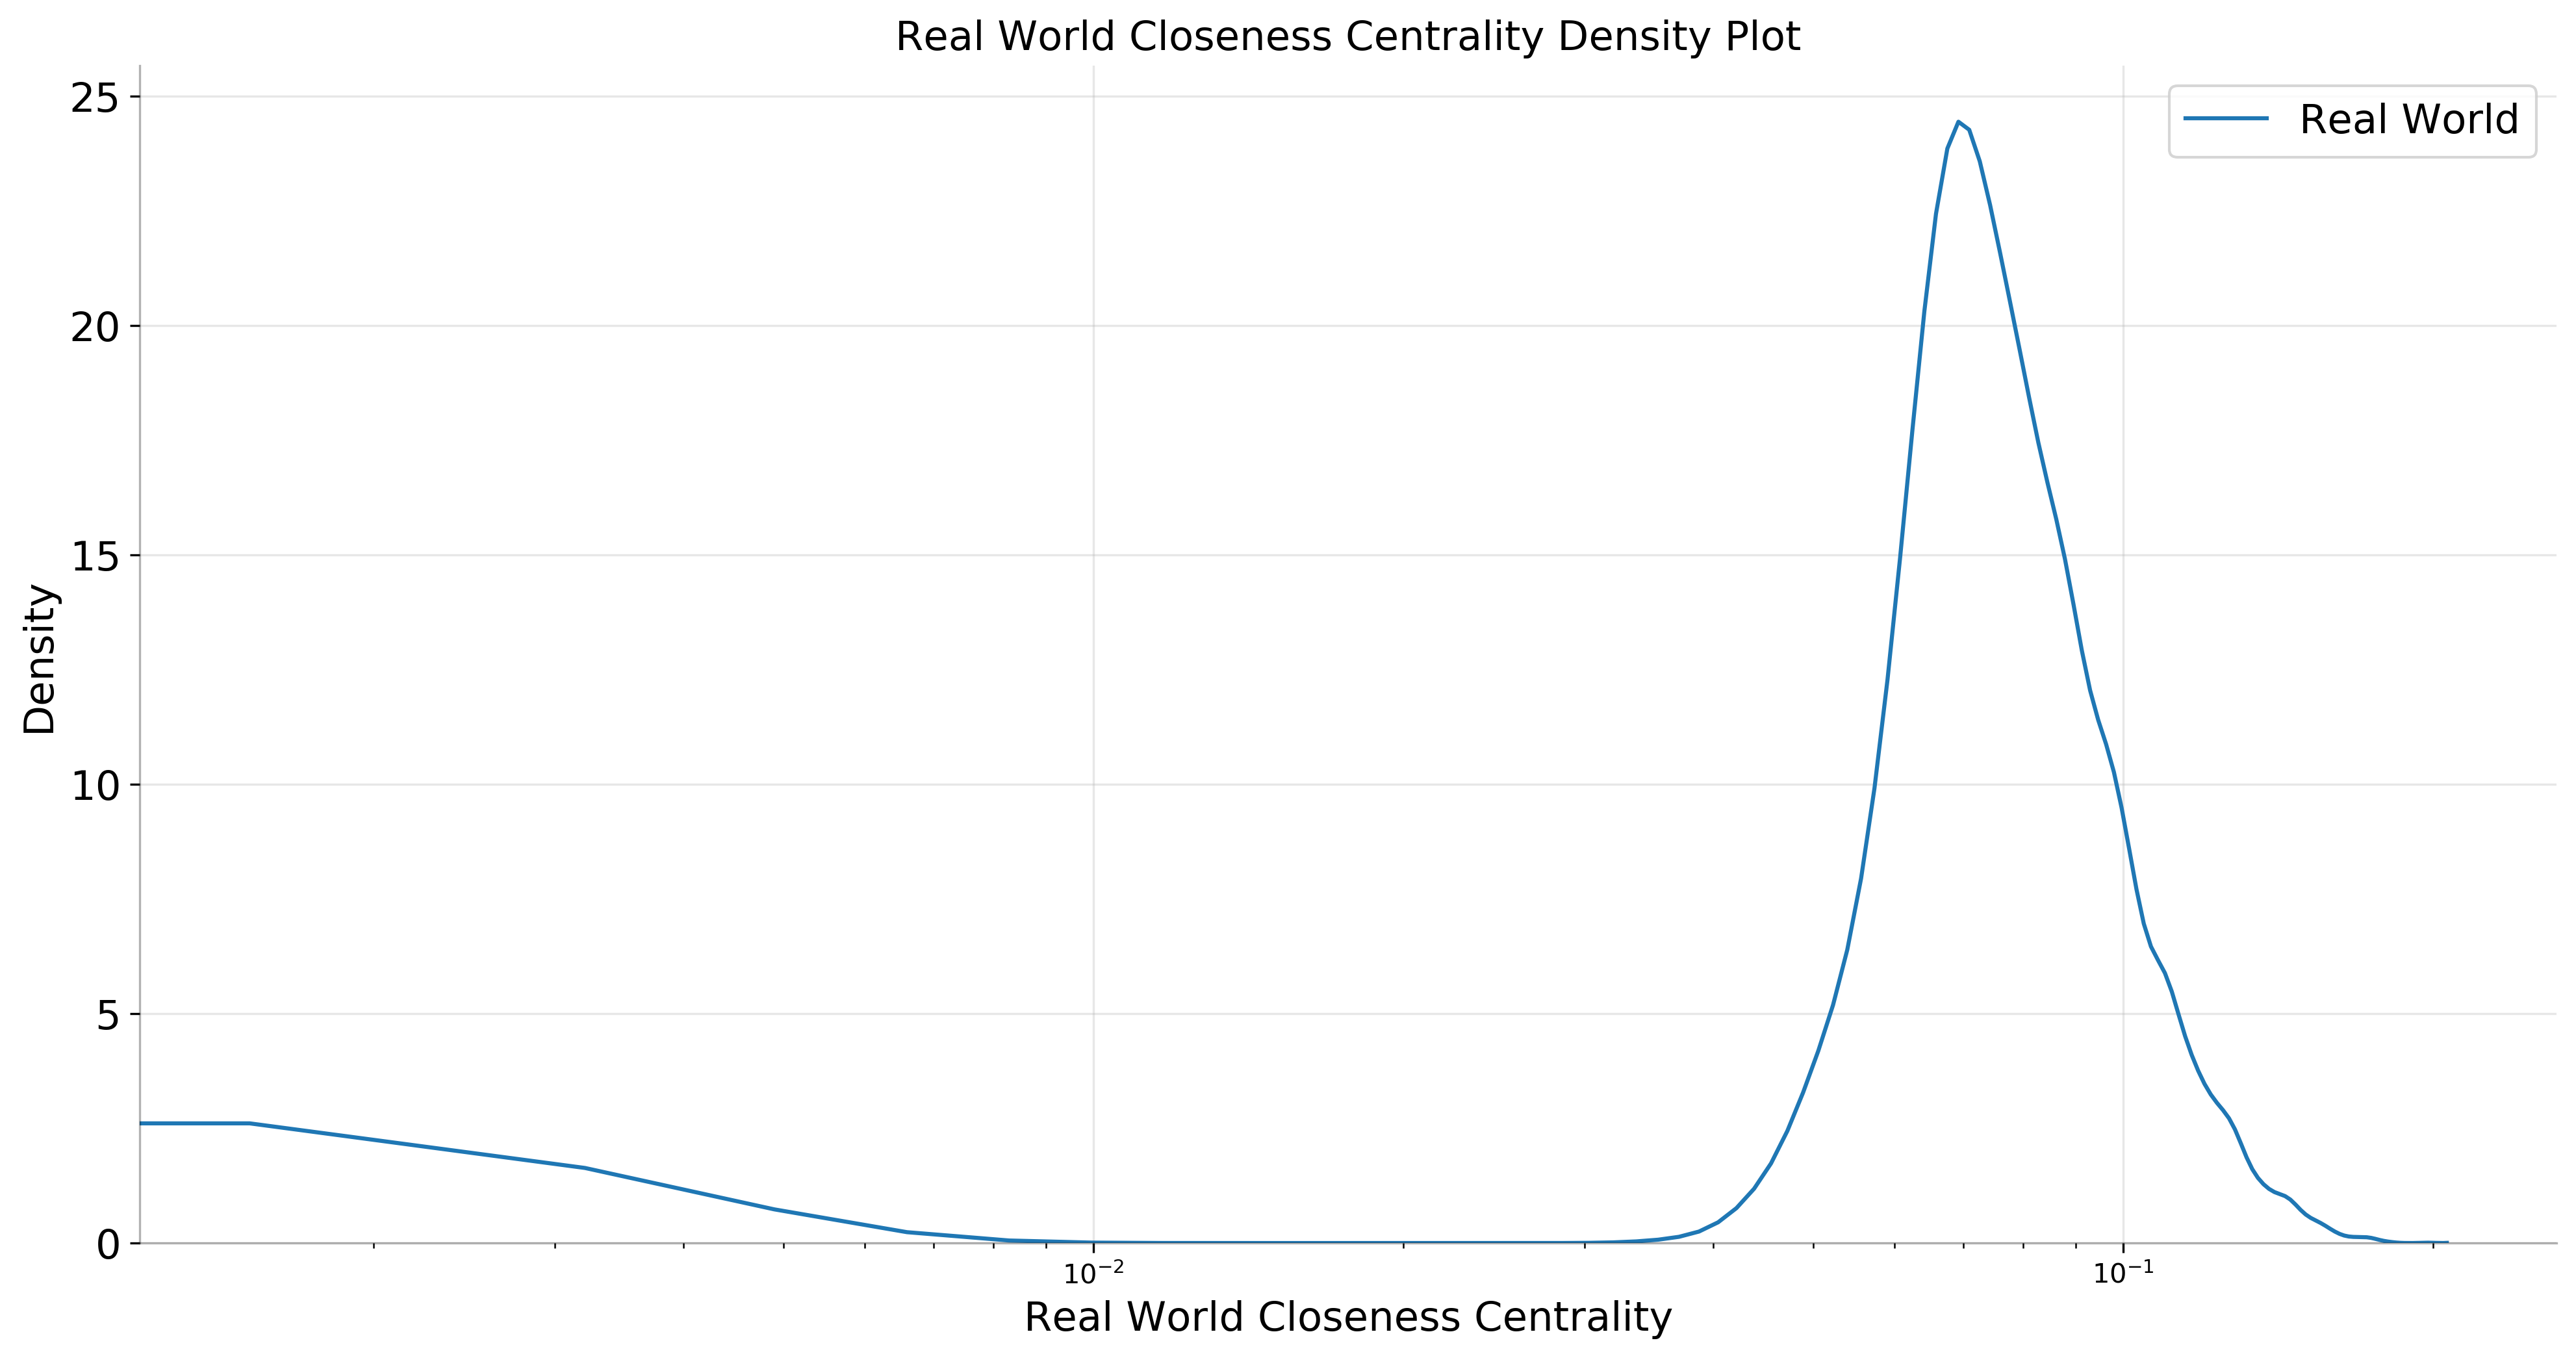

In [14]:
dist_plot(real_world_closeness_data, "Real World Closeness Centrality")

### Harmonic Centrality

It takes too much time, around 15 mins.

In [34]:
harmonic_centrality = nx.harmonic_centrality(G)

In [35]:
harmonic_centrality = {k: v for k, v in sorted(harmonic_centrality.items(), key=lambda item: item[1], reverse=True)}

In [58]:
dict(itertools.islice(harmonic_centrality.items(), 10))#Top Ten

{'United States': 3963.757142856193,
 'Casting': 3917.207936506729,
 'Company': 3586.896428570317,
 'Job': 3542.693650792507,
 'Video game': 3524.9107142845814,
 'Episode': 3522.6238095226954,
 'Season': 3501.086904760821,
 'Definition': 3487.005555554452,
 'Car': 3478.1444444433264,
 'India': 3467.271428570238}

**Highest Harmonic Centrality Nodes:** United States(3963.7), Casting(3917.2), Company(3586.9)

In [112]:
save(harmonic_centrality ,"harmonic_centrality.json")

In [15]:
harmonic_centrality = load("harmonic_centrality.json")
harmonic_list = list(harmonic_centrality.values())

**ER Harmonic Centrality**

In [ ]:
er_harmonic_centrality = nx.harmonic_centrality(er)
er_harmonic_centrality = {k: v for k, v in sorted(er_harmonic_centrality.items(), key=lambda item: item[1], reverse=True)}
er_harmonic_list = list(er_harmonic_centrality.values())
save(er_harmonic_centrality ,"er_harmonic_centrality.json")

In [16]:
er_harmonic_centrality = load("er_harmonic_centrality.json")
er_harmonic_list = list(er_harmonic_centrality.values())

**WS Harmonic Centrality**

In [ ]:
ws_harmonic_centrality = nx.harmonic_centrality(ws)
ws_harmonic_centrality = {k: v for k, v in sorted(ws_harmonic_centrality.items(), key=lambda item: item[1], reverse=True)}
ws_harmonic_list = list(ws_harmonic_centrality.values())
save(ws_harmonic_centrality ,"ws_harmonic_centrality.json")

In [17]:
ws_harmonic_centrality = load("ws_harmonic_centrality.json")
ws_harmonic_list = list(ws_harmonic_centrality.values())

**BA Harmonic Centrality**

In [ ]:
ba_harmonic_centrality = nx.harmonic_centrality(ba)
ba_harmonic_centrality = {k: v for k, v in sorted(ba_harmonic_centrality.items(), key=lambda item: item[1], reverse=True)}
ba_harmonic_list = list(ba_harmonic_centrality.values())
save(ba_harmonic_centrality ,"ba_harmonic_centrality.json")

In [18]:
ba_harmonic_centrality = load("ba_harmonic_centrality.json")
ba_harmonic_list = list(ba_harmonic_centrality.values())

**CM Harmonic Centrality**

In [ ]:
cm_harmonic_centrality = nx.harmonic_centrality(cm)
cm_harmonic_centrality = {k: v for k, v in sorted(cm_harmonic_centrality.items(), key=lambda item: item[1], reverse=True)}
cm_harmonic_list = list(cm_harmonic_centrality.values())
save(cm_harmonic_centrality ,"cm_harmonic_centrality.json")

In [19]:
cm_harmonic_centrality = load("cm_harmonic_centrality.json")
cm_harmonic_list = list(cm_harmonic_centrality.values())

In [20]:
harmonic_data = {
    "real_word":{
        "name":"Real World",
        "list":harmonic_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_harmonic_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_harmonic_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_harmonic_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_harmonic_list
    }
}
real_world_harmonic_data = {
    "real_word":{
        "name":"Real World",
        "list":harmonic_list
    }
}

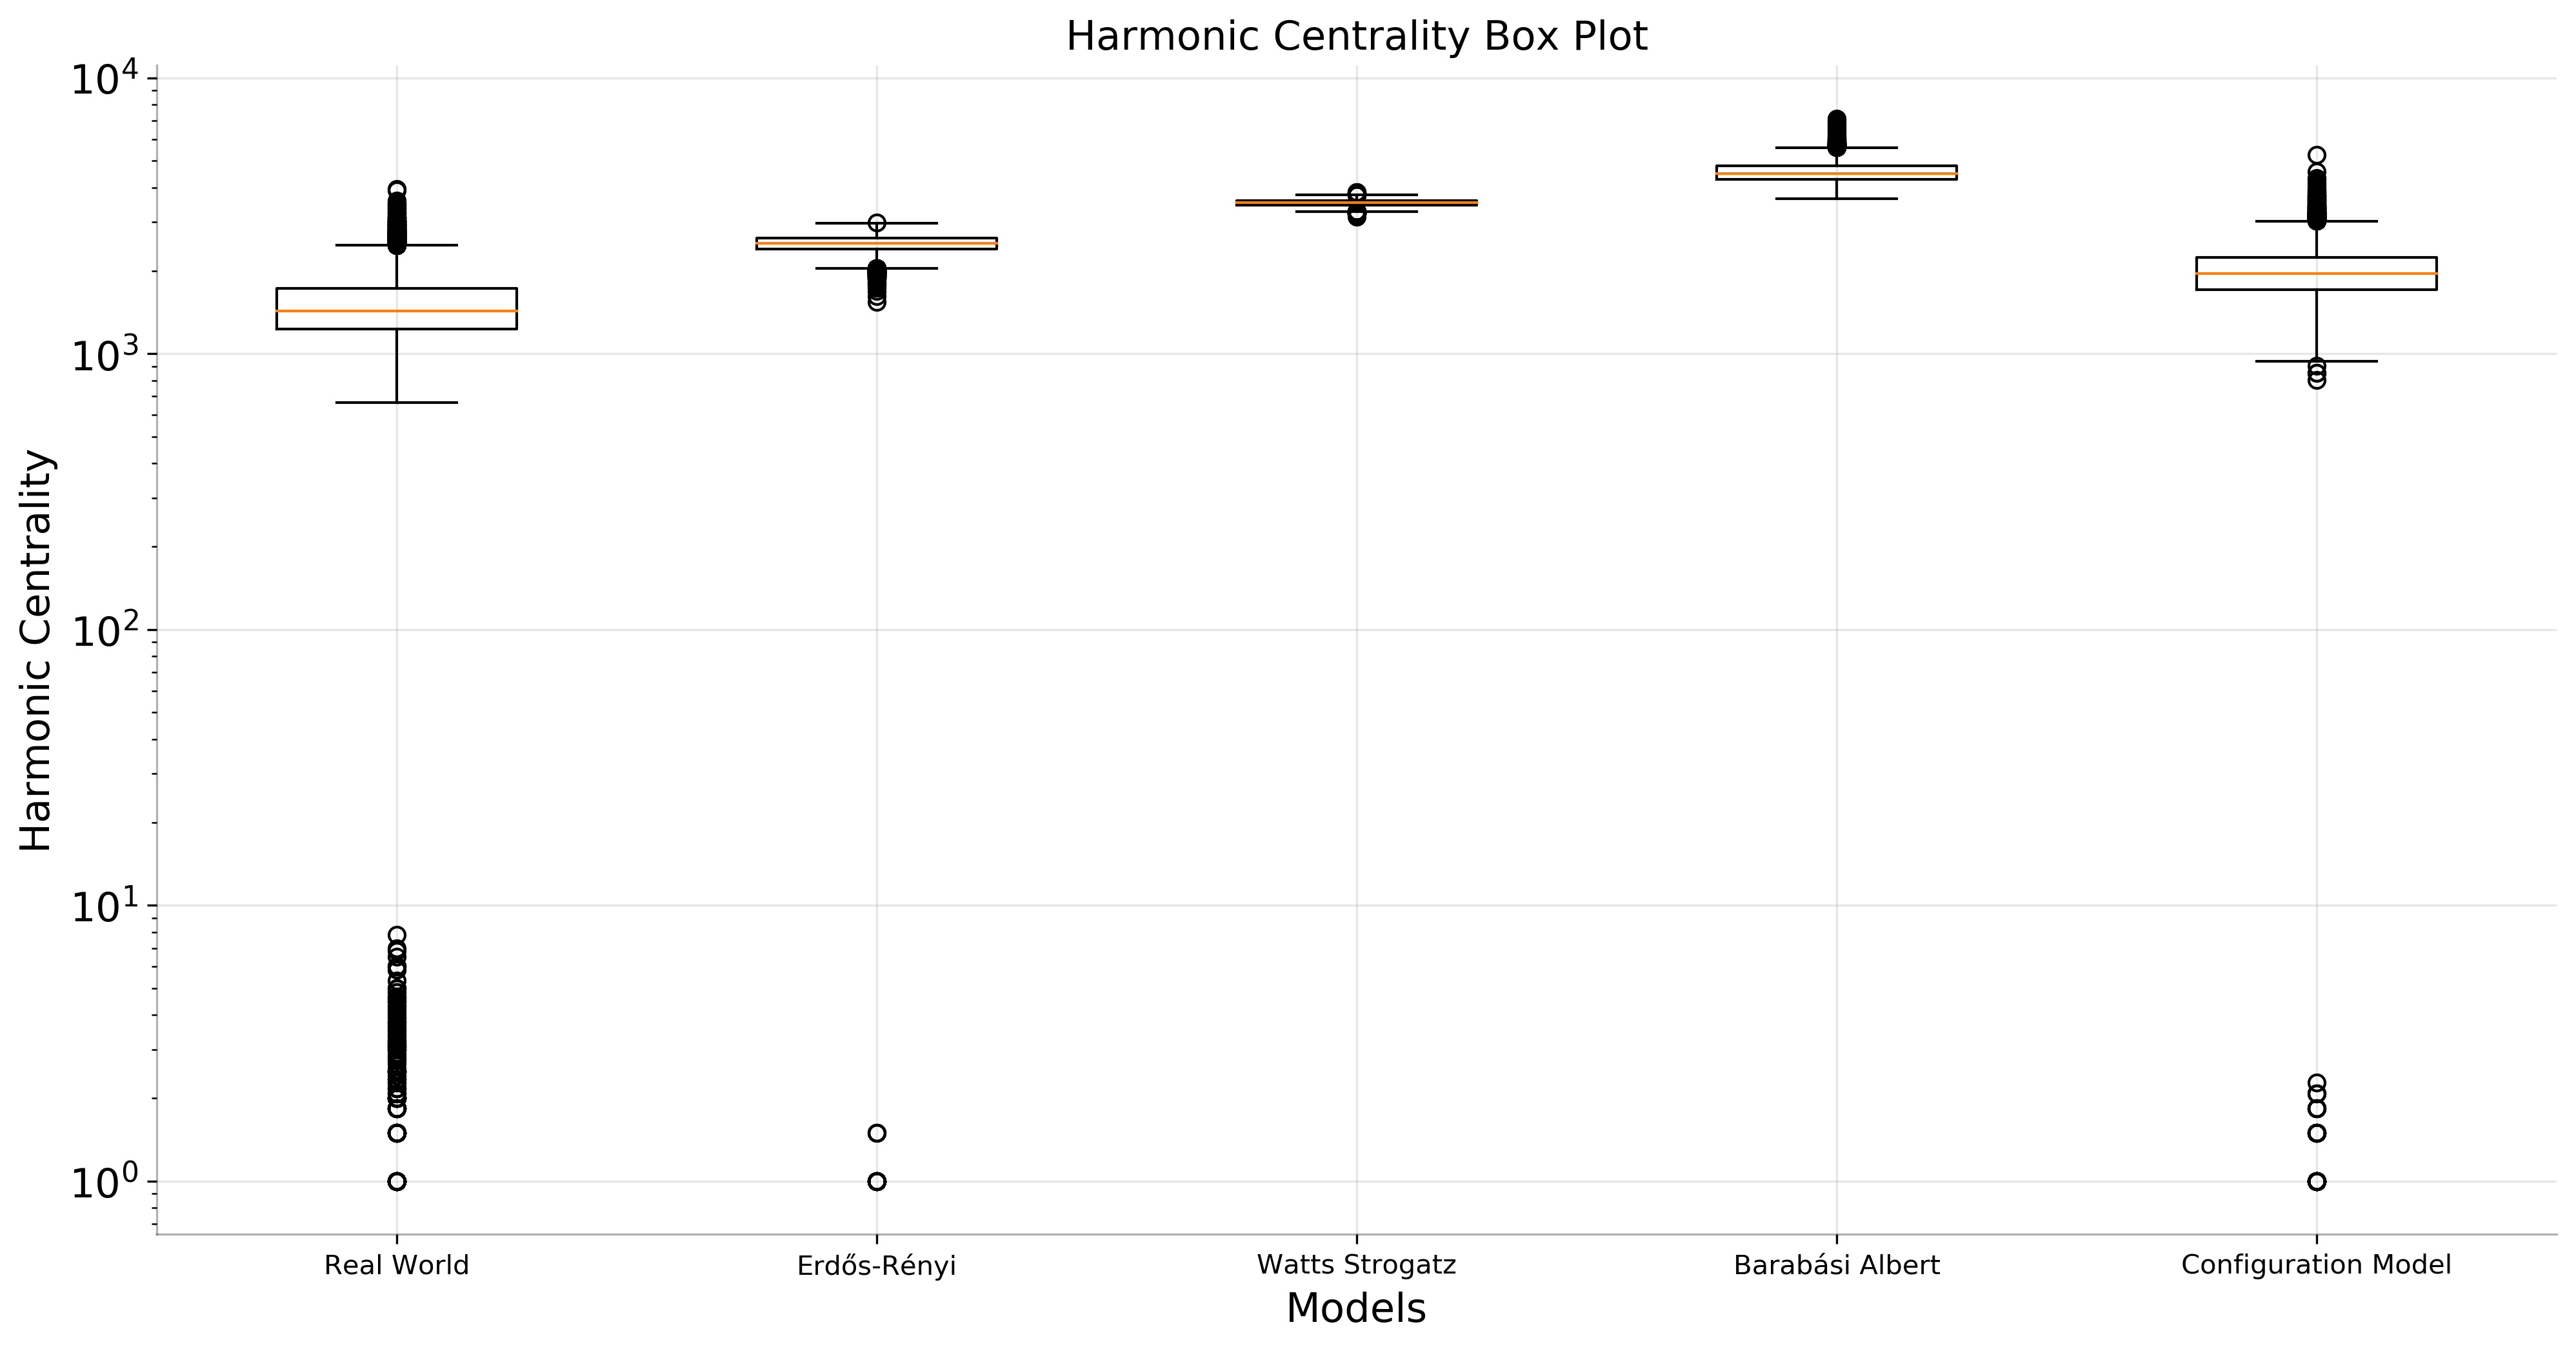

In [21]:
box_plot(harmonic_data, "Harmonic Centrality")

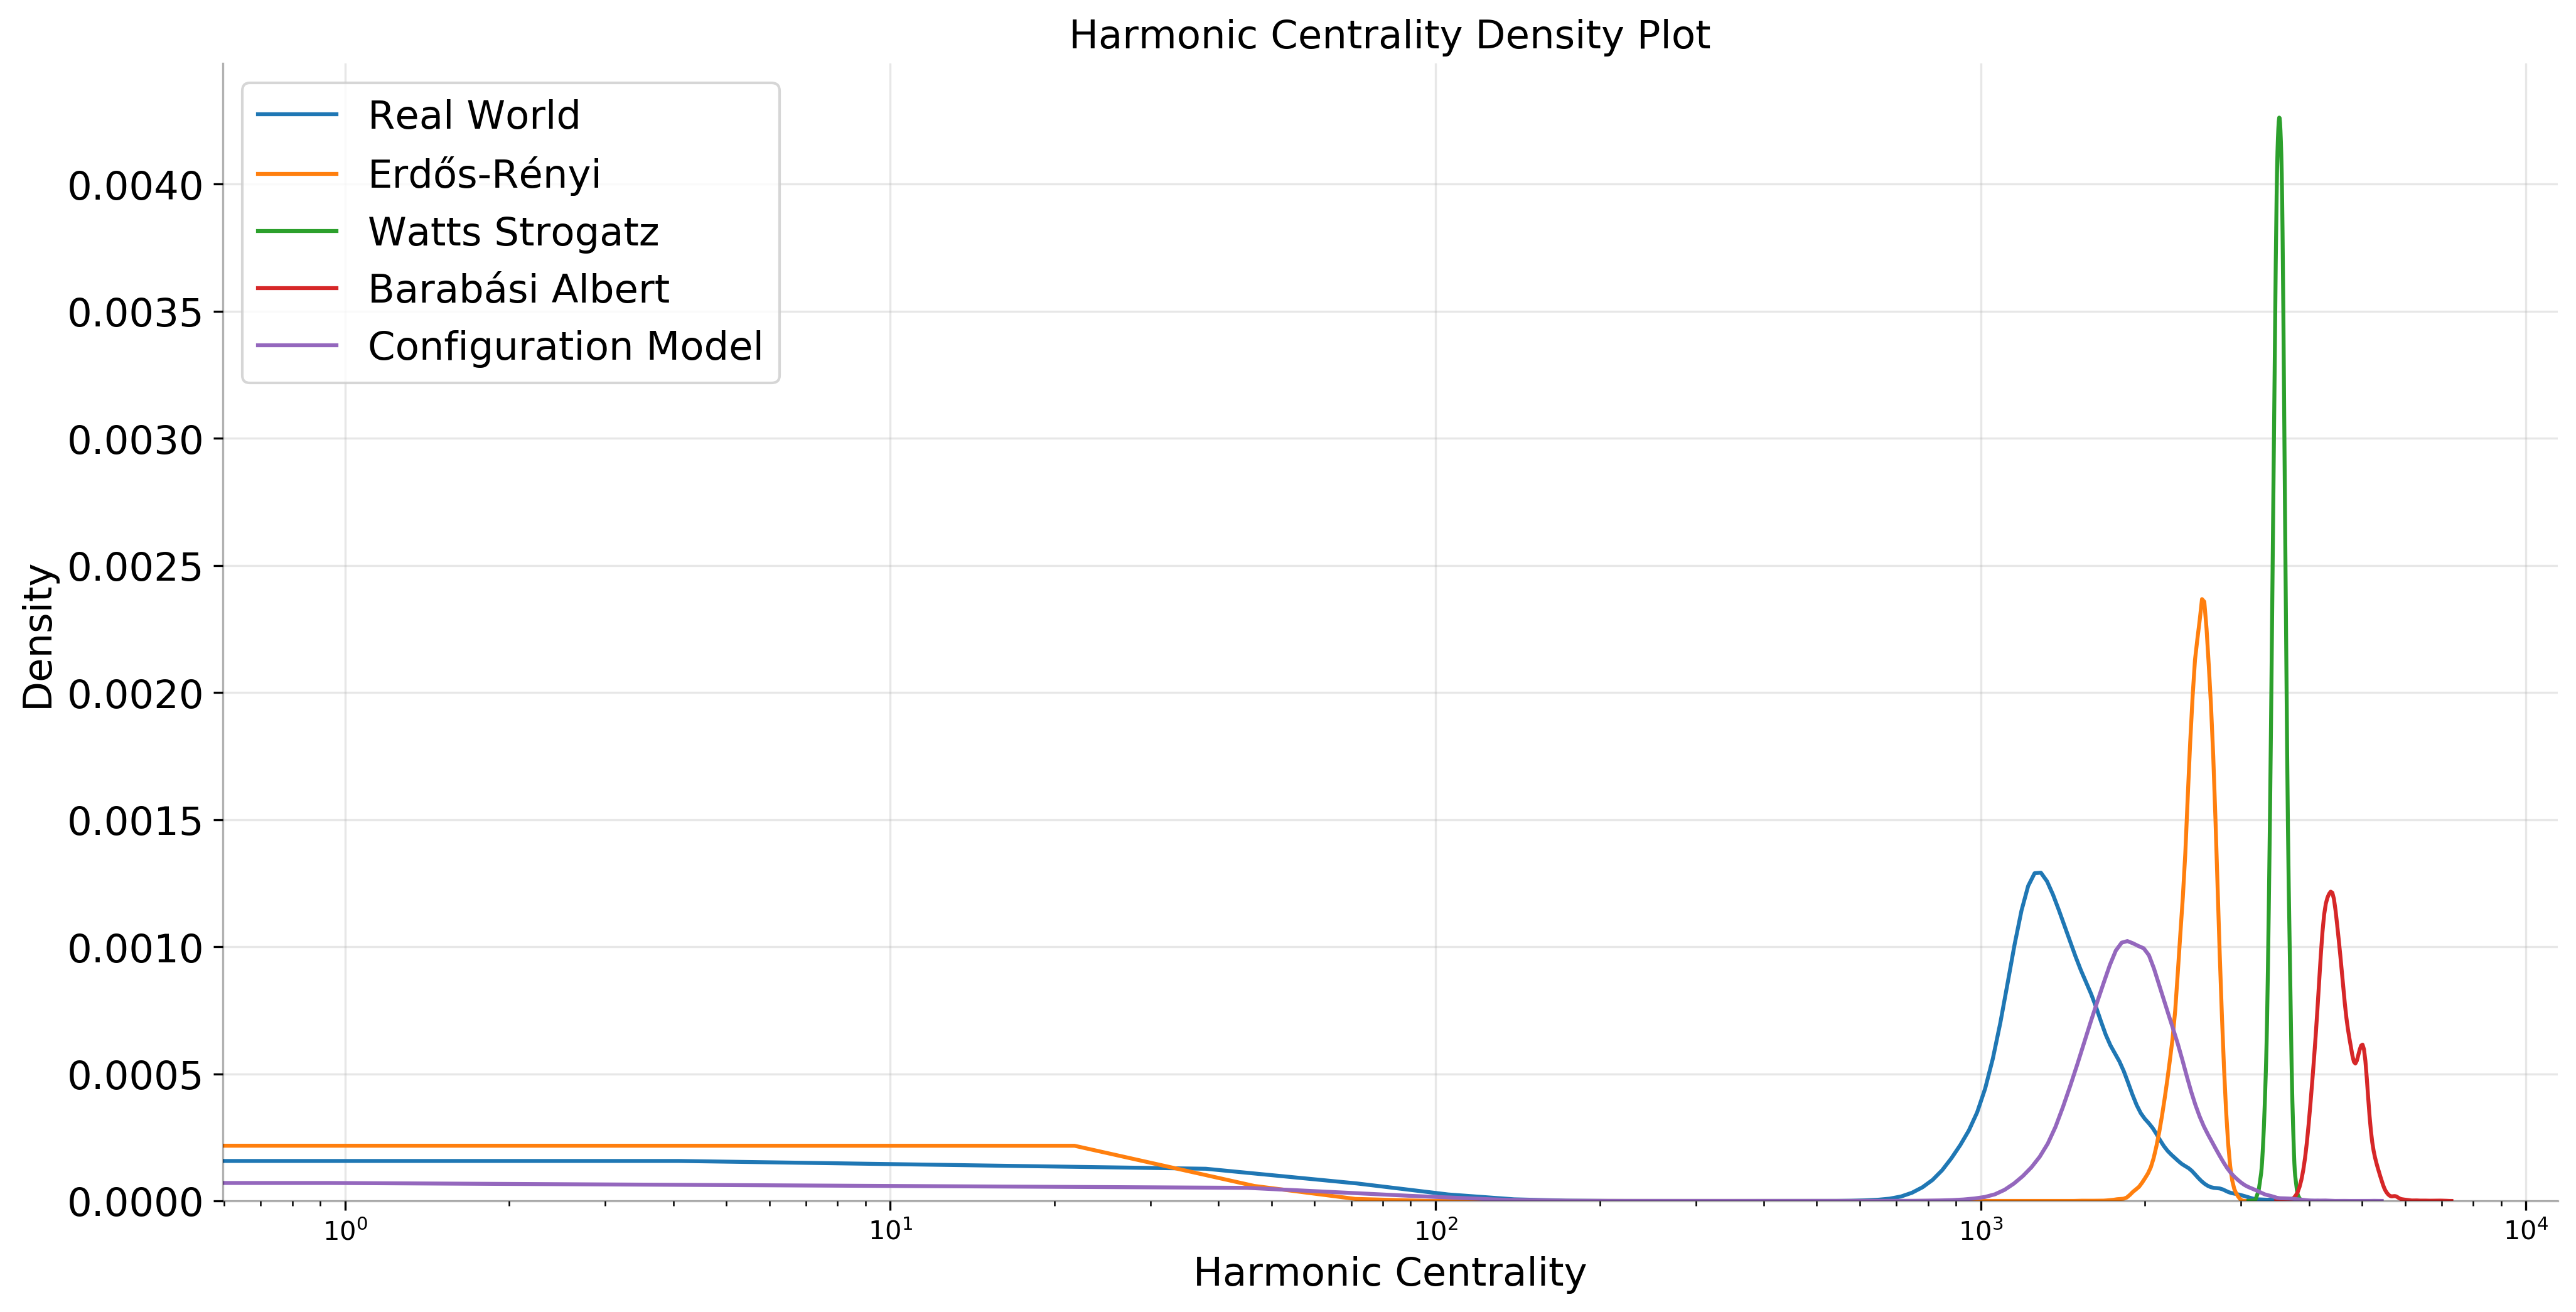

In [22]:
dist_plot(harmonic_data, "Harmonic Centrality")

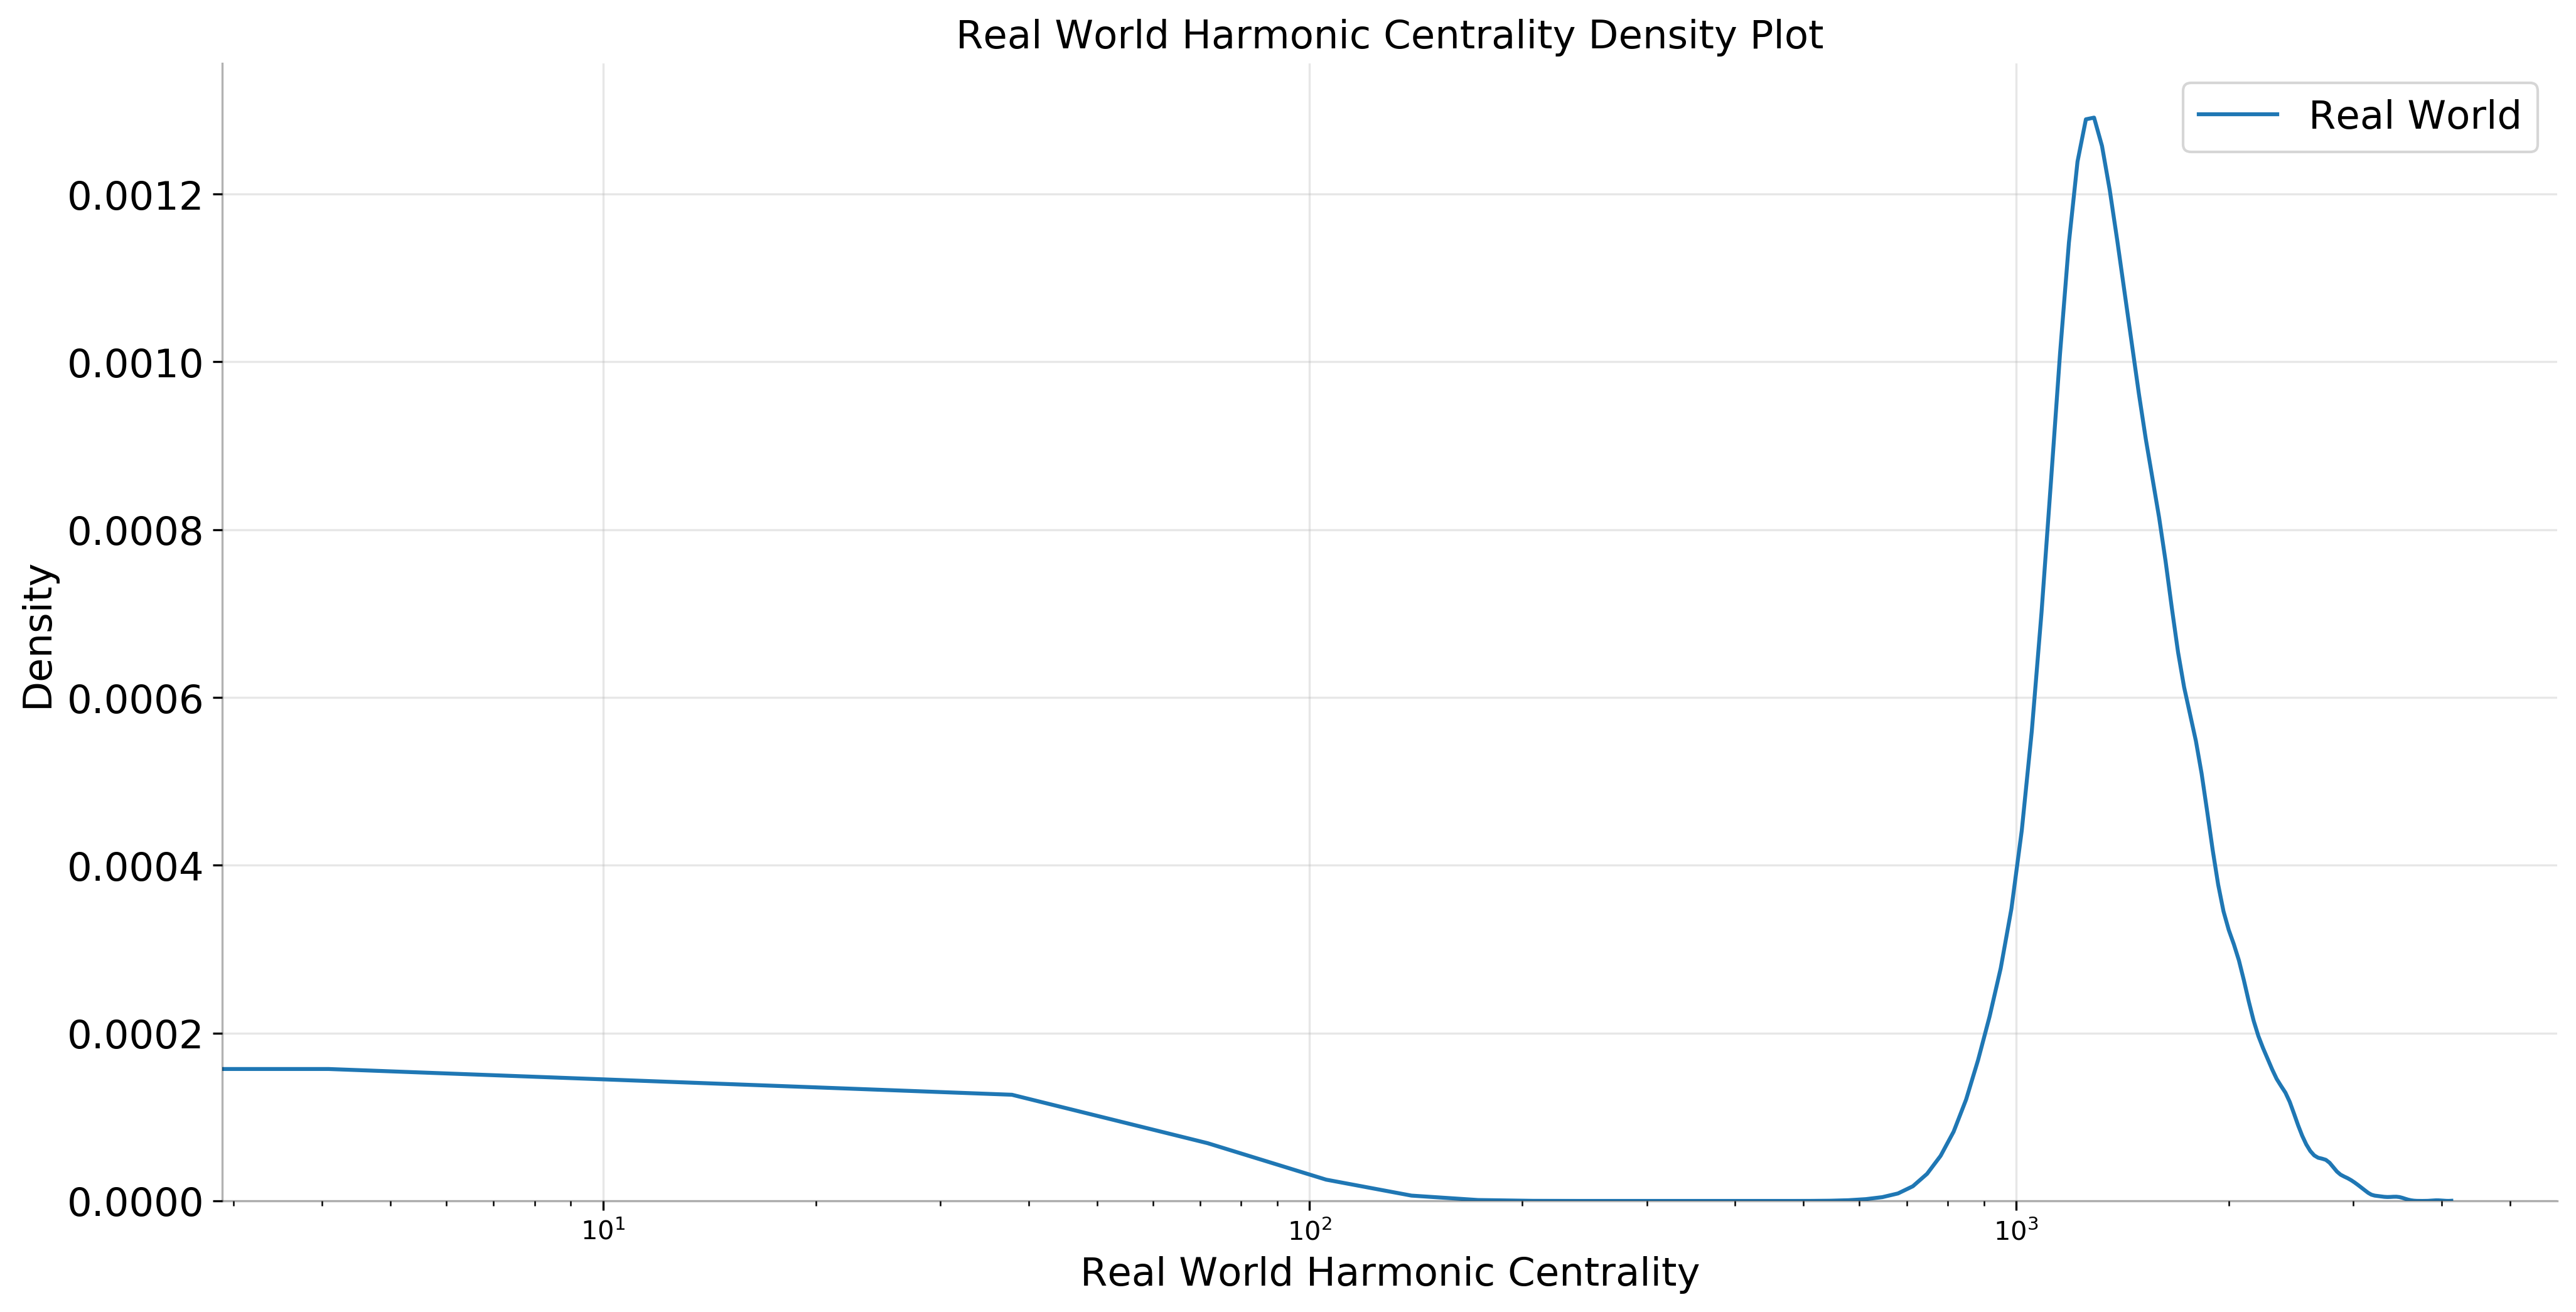

In [23]:
dist_plot(real_world_harmonic_data, "Real World Harmonic Centrality")

### Betweenness Centrality

In [117]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=False)

In [118]:
betweenness_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}

In [59]:
dict(itertools.islice(betweenness_centrality.items(), 10))#Top Ten

{'Casting': 13200279.626955267,
 'Death': 9988924.106606282,
 'Cause of death': 7522167.232917063,
 'Lyrics': 6449821.4056780245,
 'United States': 5435542.947212439,
 'Company': 5299315.161619431,
 'Video game': 5100119.368353211,
 'Car': 4604160.473087754,
 'Age': 4342607.205808538,
 'Streaming media': 4076256.2092246916}

In [120]:
save(betweenness_centrality ,"betweenness_centrality.json")

In [24]:
betweenness_centrality = load("betweenness_centrality.json")
betweenness_list = list(betweenness_centrality.values())

**ER Betweenness Centrality**

In [ ]:
er_betweenness_centrality = nx.betweenness_centrality(er, normalized=False)
er_betweenness_centrality = {k: v for k, v in sorted(er_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}
er_betweenness_list = list(er_betweenness_centrality.values())
save(er_betweenness_centrality ,"er_betweenness_centrality.json")

In [25]:
er_betweenness_centrality = load("er_betweenness_centrality.json")
er_betweenness_list = list(er_betweenness_centrality.values())

**WS Betweenness Centrality**

In [206]:
ws_betweenness_centrality = nx.betweenness_centrality(ws, normalized=False)
ws_betweenness_centrality = {k: v for k, v in sorted(ws_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}
ws_betweenness_list = list(ws_betweenness_centrality.values())
save(ws_betweenness_centrality ,"ws_betweenness_centrality.json")

In [26]:
ws_betweenness_centrality = load("ws_betweenness_centrality.json")
ws_betweenness_list = list(ws_betweenness_centrality.values())

**BA Betweenness Centrality**

In [ ]:
ba_betweenness_centrality = nx.betweenness_centrality(ba, normalized=False)
ba_betweenness_centrality = {k: v for k, v in sorted(ba_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}
ba_betweenness_list = list(ba_betweenness_centrality.values())
save(ba_betweenness_centrality ,"ba_betweenness_centrality.json")

In [27]:
ba_betweenness_centrality = load("ba_betweenness_centrality.json")
ba_betweenness_list = list(ba_betweenness_centrality.values())

**CM Betweenness Centrality**

In [207]:
cm_betweenness_centrality = nx.betweenness_centrality(cm, normalized=False)
cm_betweenness_centrality = {k: v for k, v in sorted(cm_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}
cm_betweenness_list = list(cm_betweenness_centrality.values())
save(cm_betweenness_centrality ,"cm_betweenness_centrality.json")

In [28]:
cm_betweenness_centrality = load("cm_betweenness_centrality.json")
cm_betweenness_list = list(cm_betweenness_centrality.values())

In [29]:
betweenness_data = {
    "real_word":{
        "name":"Real World",
        "list":betweenness_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_betweenness_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_betweenness_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_betweenness_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_betweenness_list
    }
}
real_world_betweenness_data = {
    "real_word":{
        "name":"Real World",
        "list":betweenness_list
    }
}

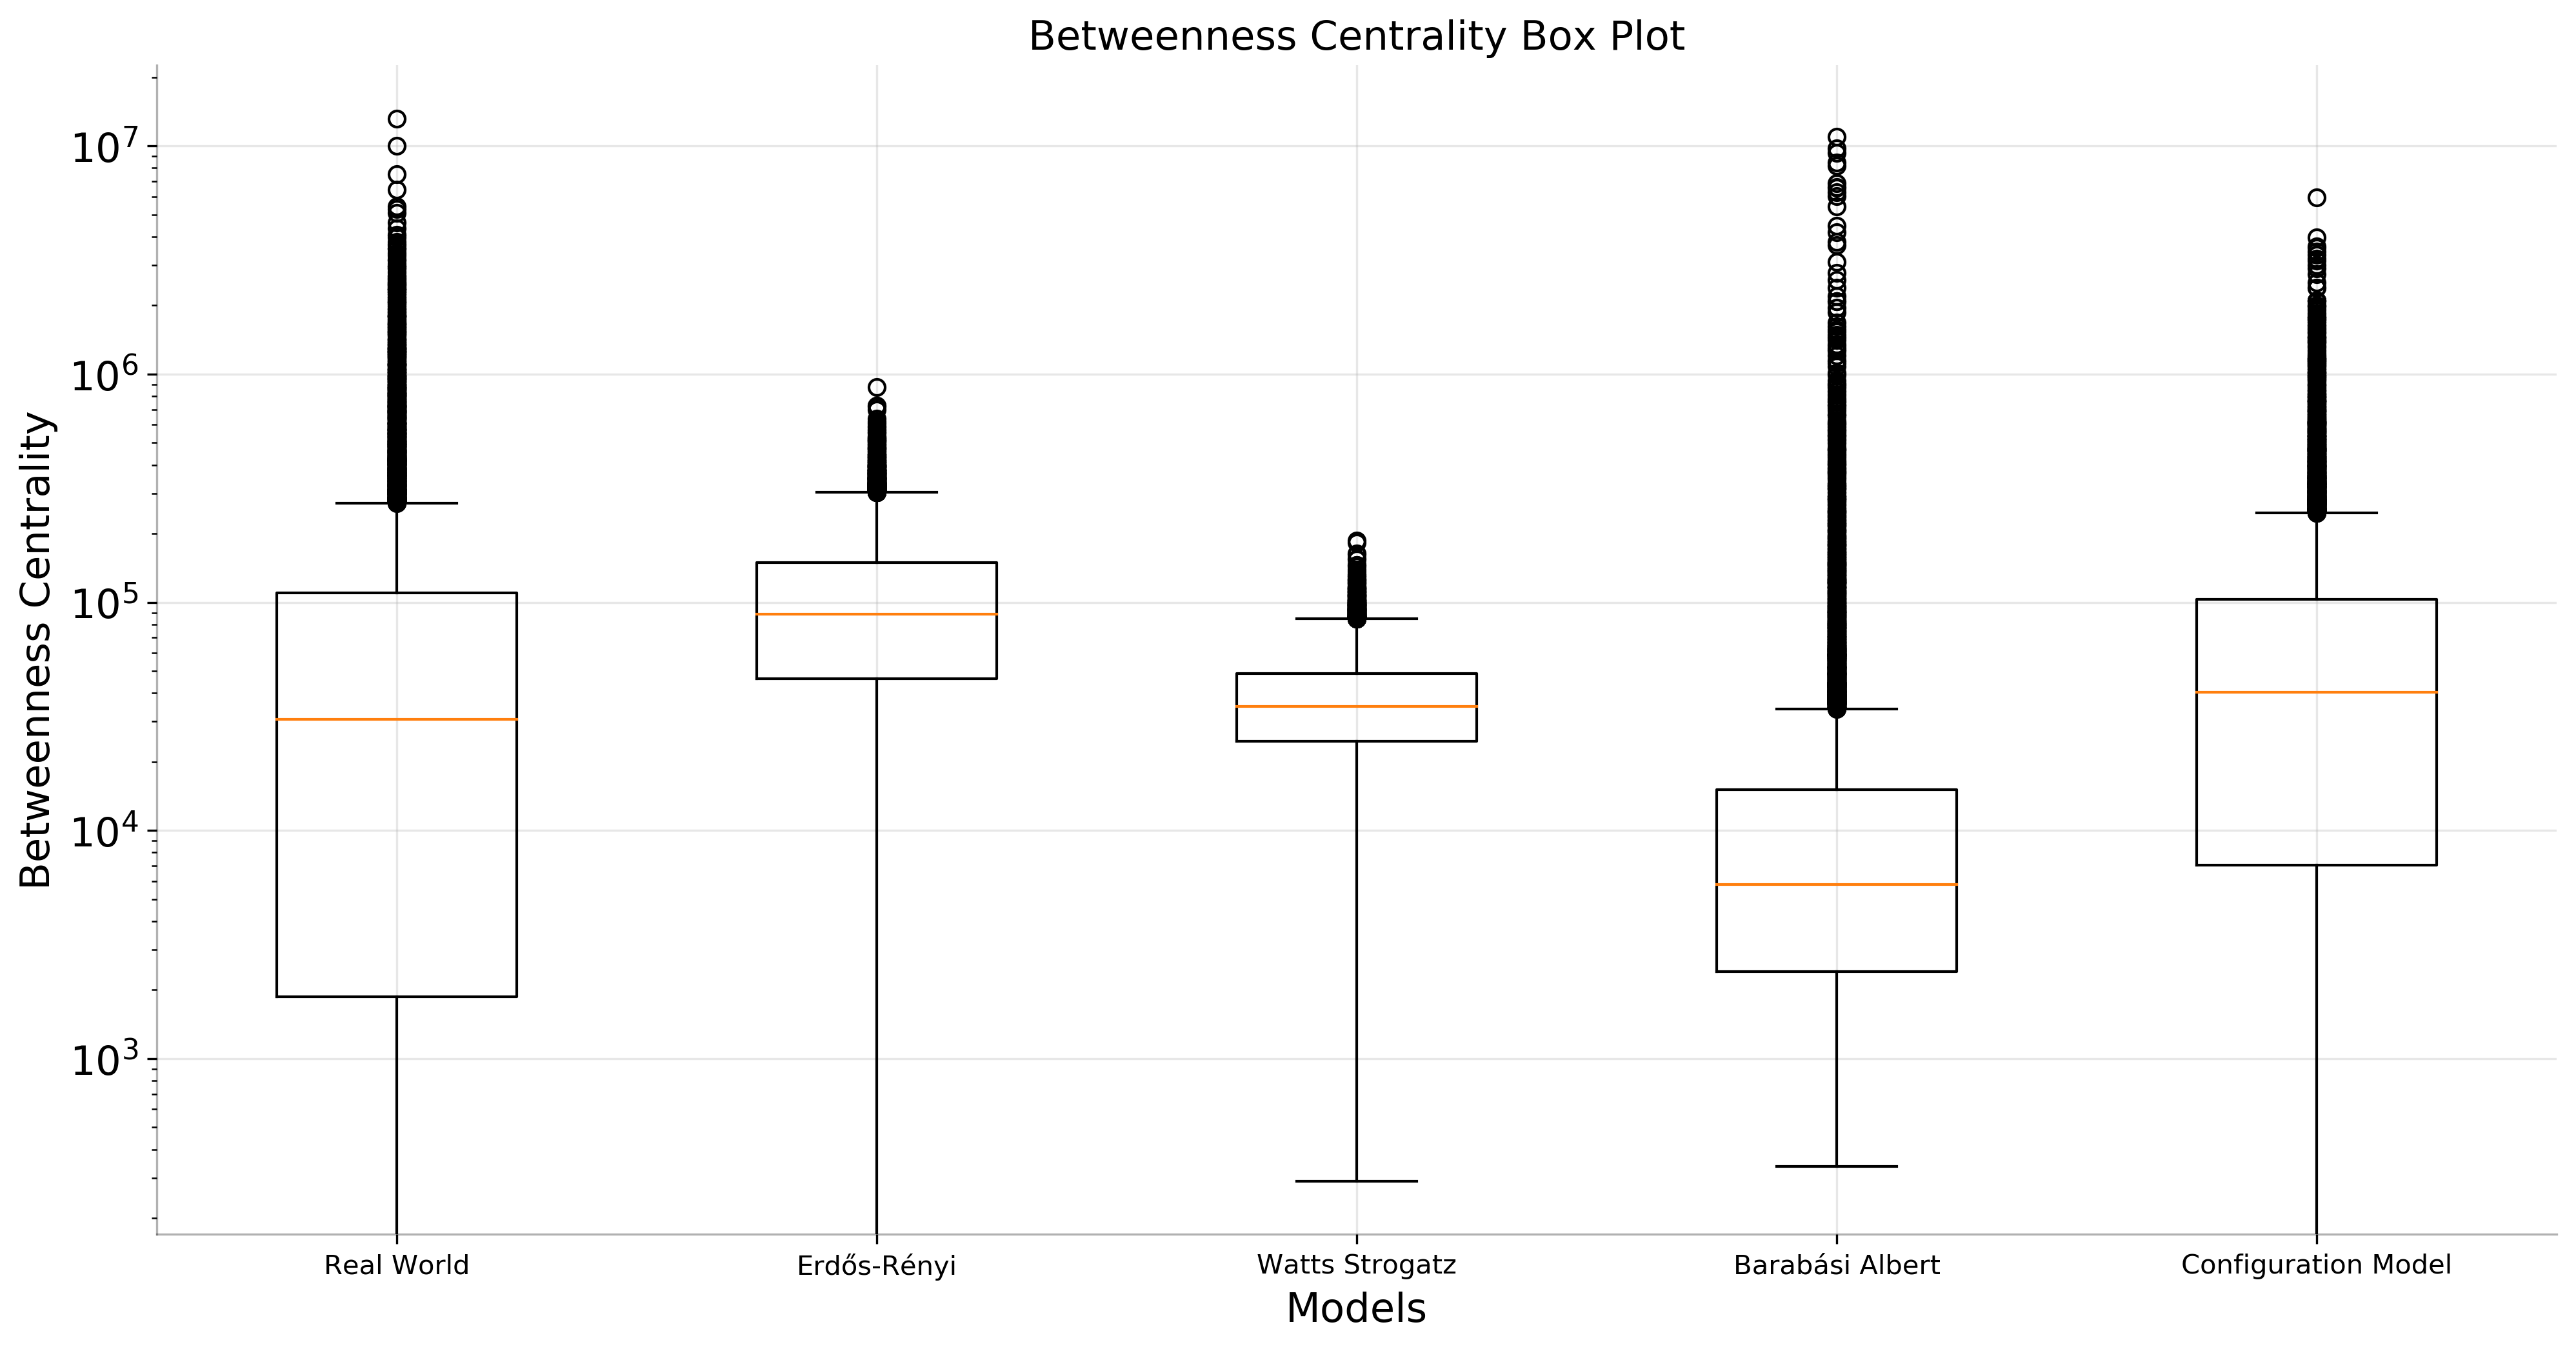

In [30]:
box_plot(betweenness_data, "Betweenness Centrality")

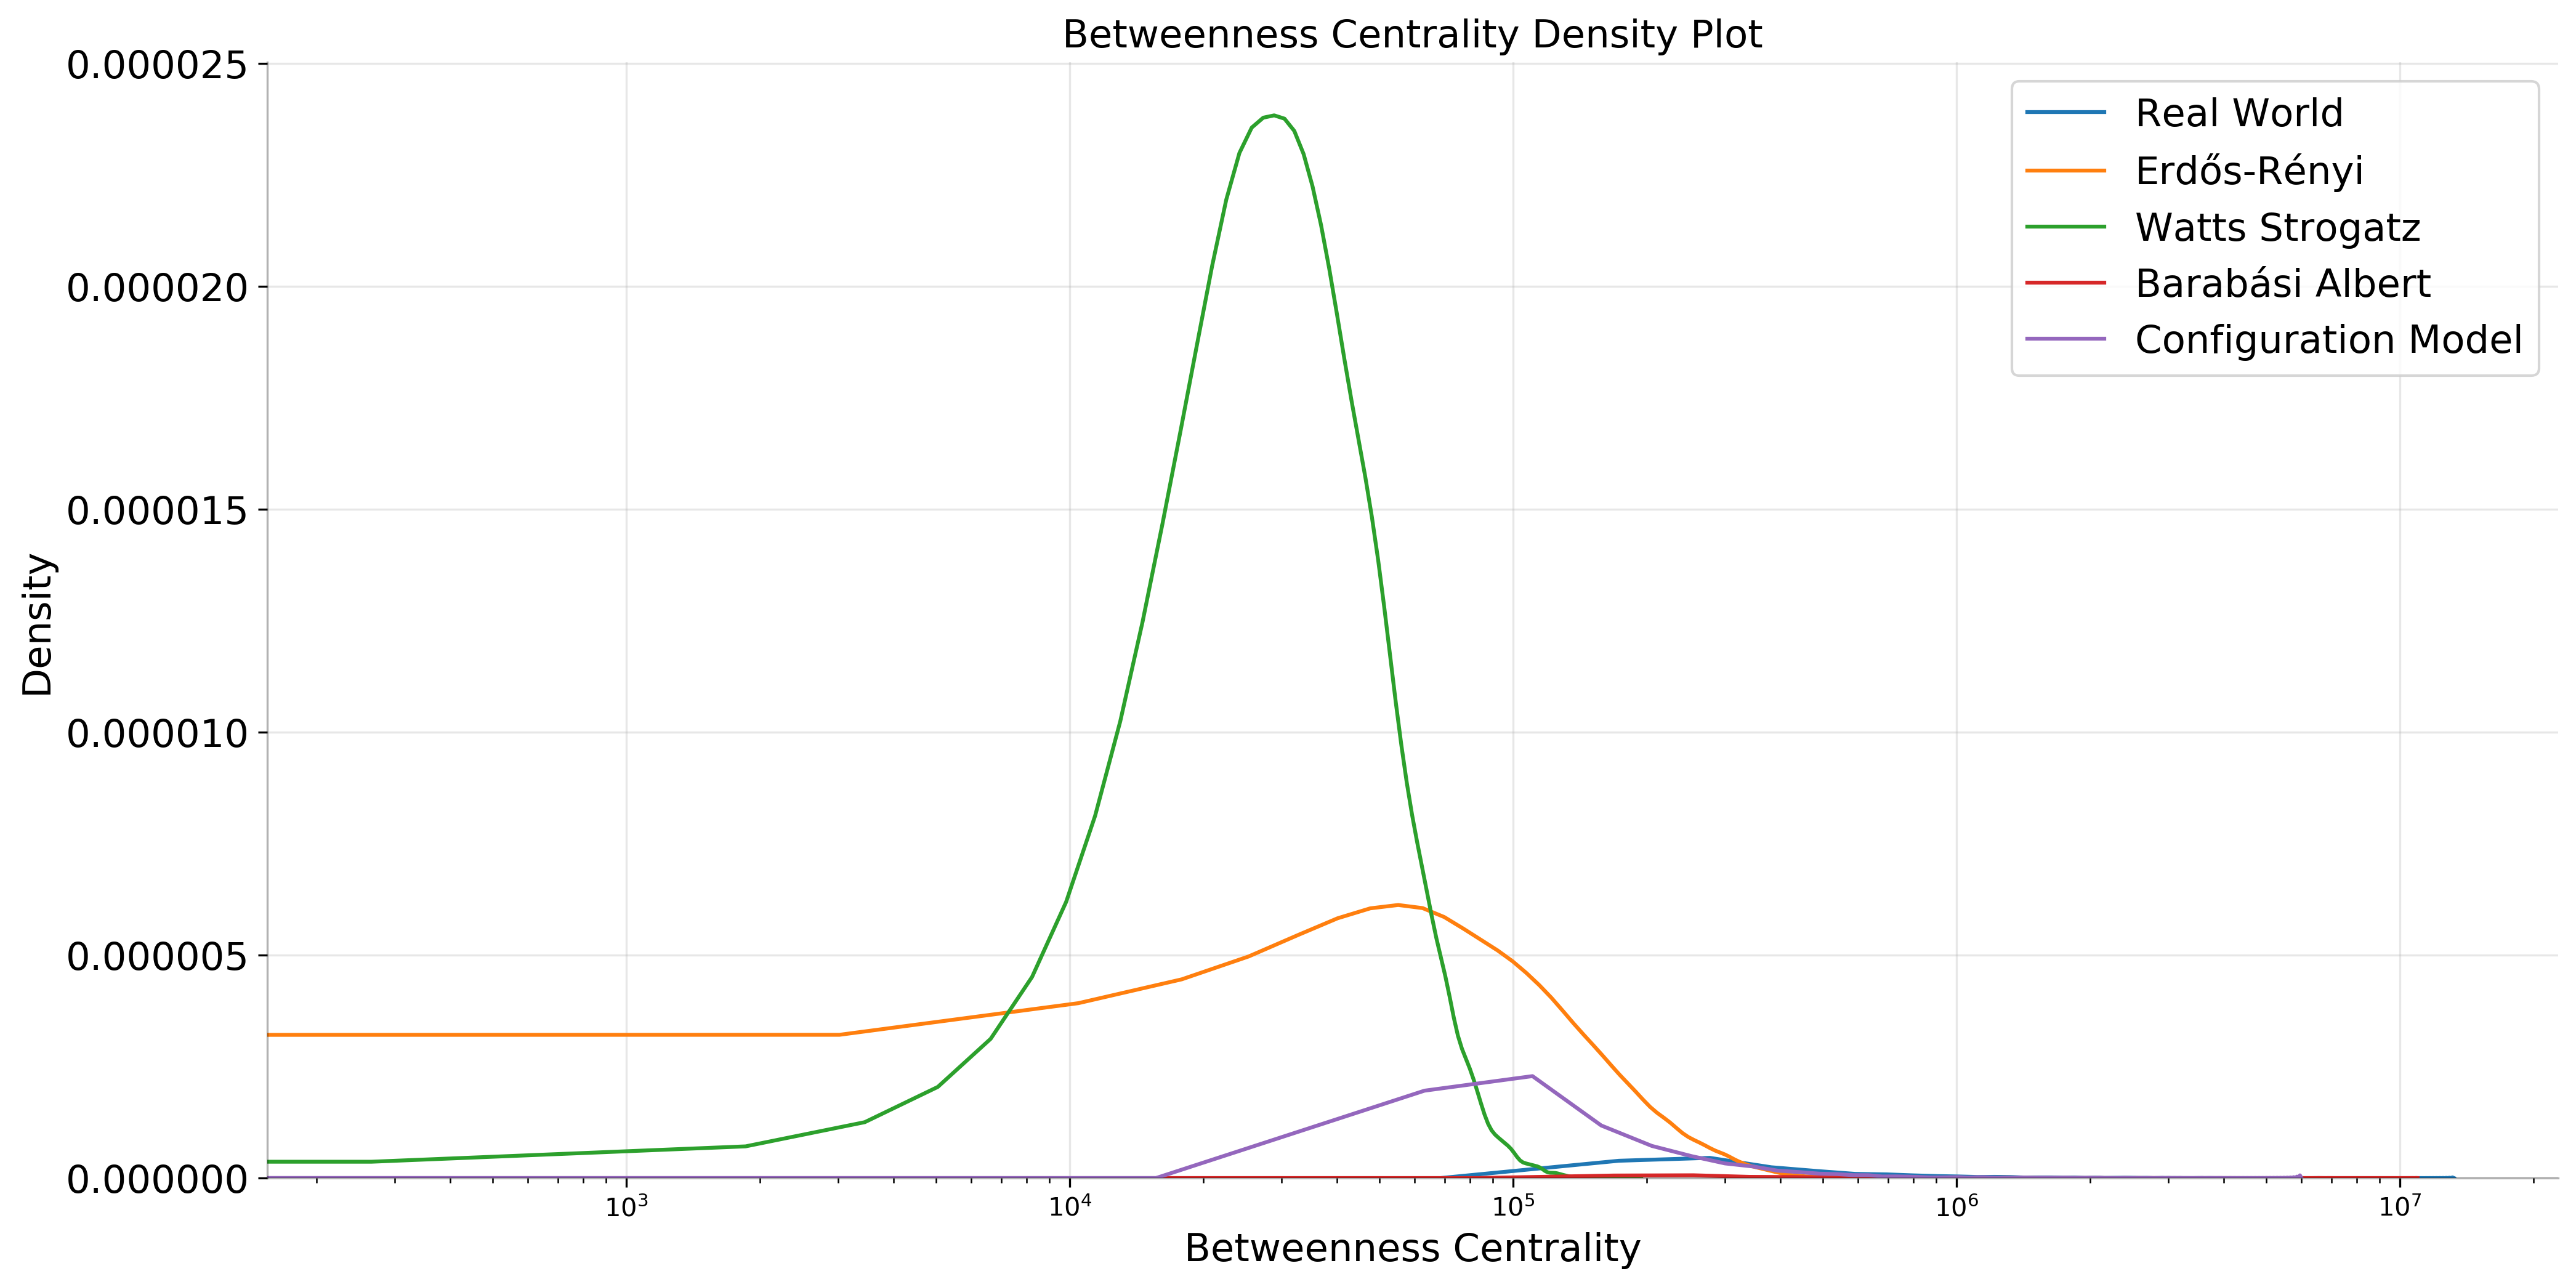

In [31]:
dist_plot(betweenness_data, "Betweenness Centrality")

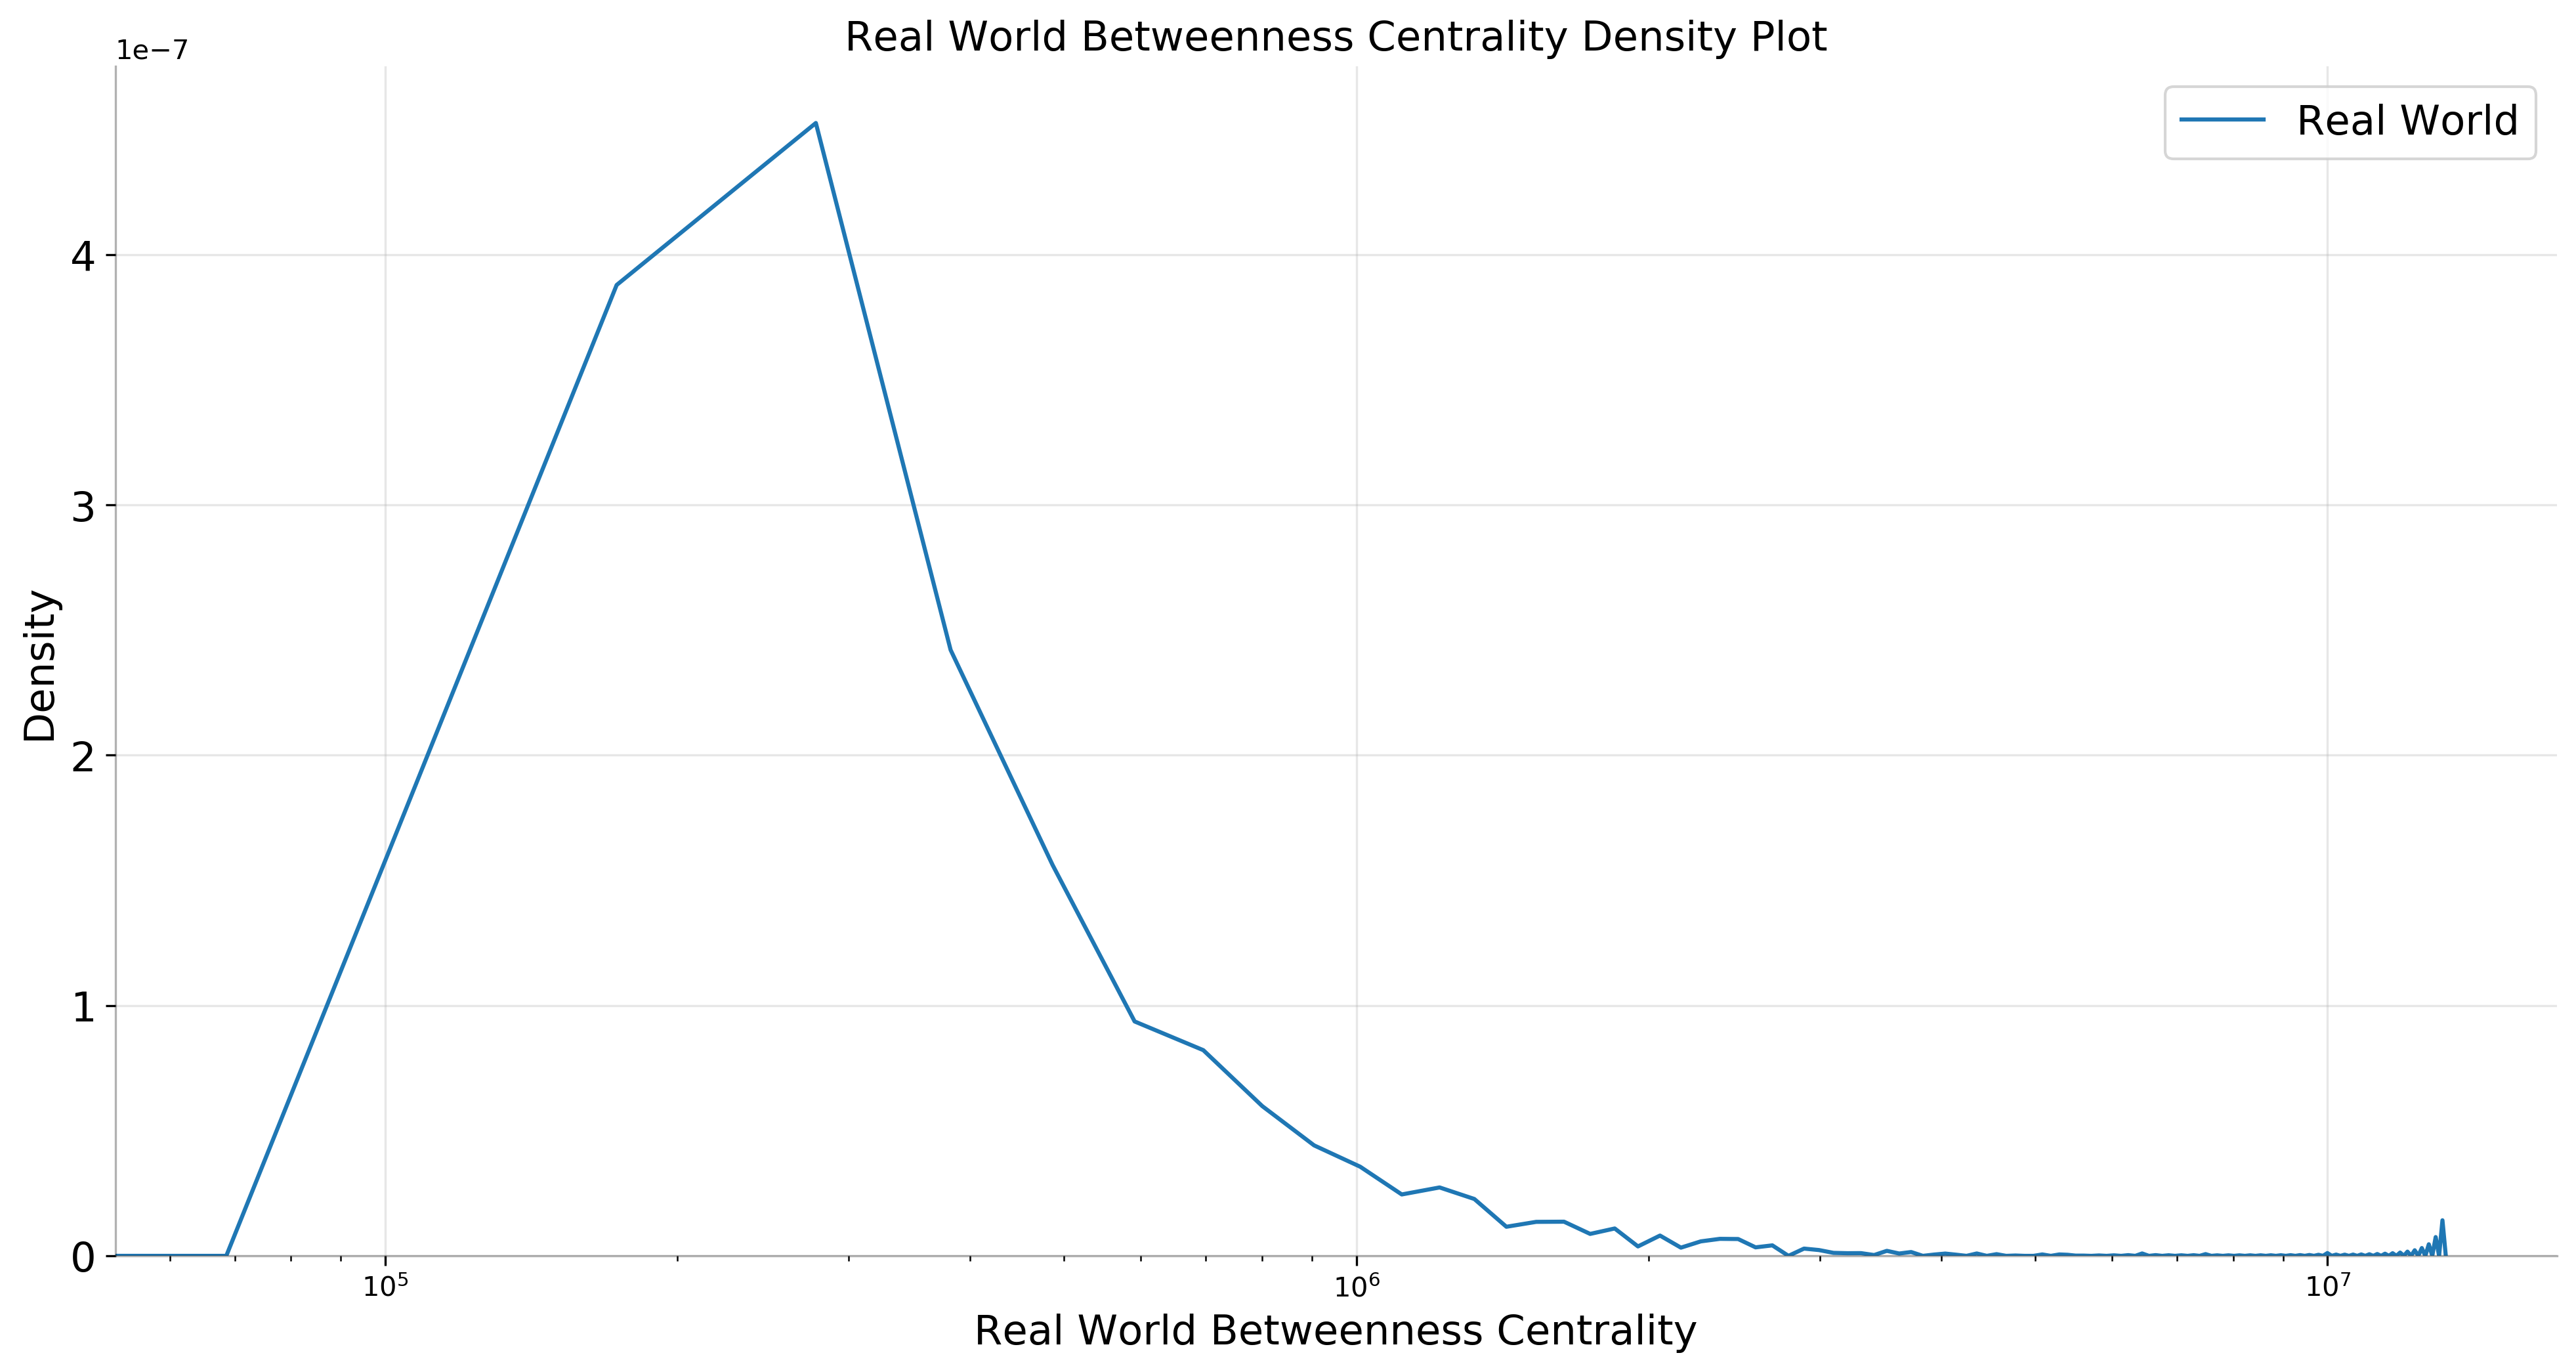

In [32]:
dist_plot(real_world_betweenness_data, "Real World Betweenness Centrality")

In [201]:
top_ten = list(page_rank_centrality.keys())[0:10]

In [220]:
page_rank_list = []
eigenvector_list = []
katz_list = []
degree_list = []
for i in top_ten:
    page_rank_list.append(page_rank_centrality[i])
    eigenvector_list.append(eigenvector_centrality[i])
    katz_list.append(katz_centrality[i])
    for j in in_degree_sequence:
        if i != j[0]:
            continue
        else:
            degree_list.append(j[1])
top_ten = top_ten[::-1]#Reversing the order for showing in bar charts from top to bottom
page_rank_list = page_rank_list[::-1]
katz_list = katz_list[::-1]
degree_list = degree_list[::-1]

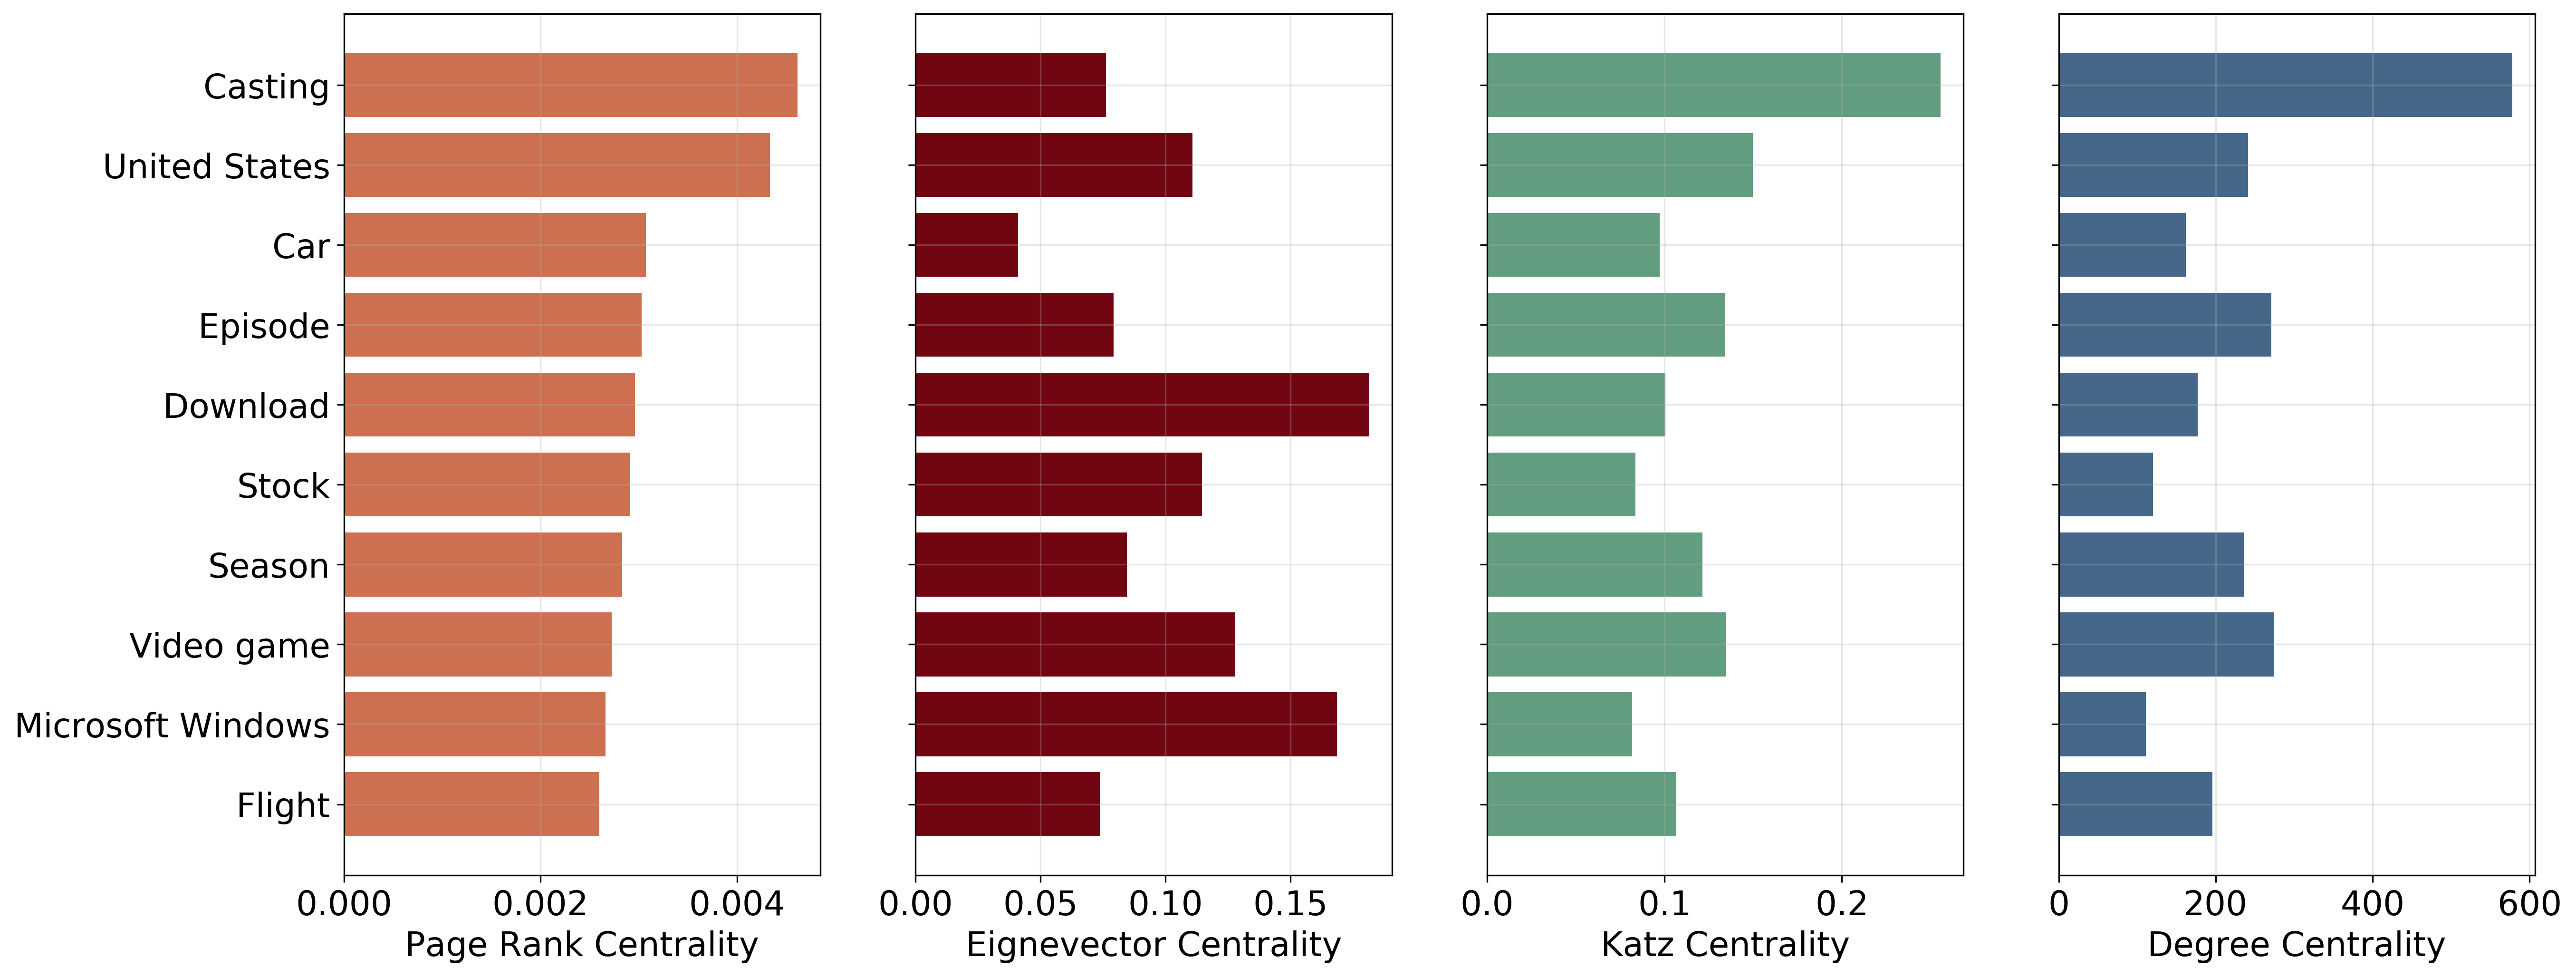

In [233]:
fig = plt.figure(figsize=(25,8), dpi= 300)
#plt.title("Connectivity-Based and Degree Centrality")

fontsize = 17
plt.rcParams.update({'font.size': fontsize})
ax = fig.add_subplot(151)
plt.barh(top_ten,page_rank_list, color="#CD7051")
plt.grid(axis='both', alpha=.3)
#plt.ylabel(fontsize=fontsize)

plt.xlabel("Page Rank Centrality")

ax2 = fig.add_subplot(152)
plt.barh(top_ten,eigenvector_list, color="#710612")
plt.grid(axis='both', alpha=.3)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.xlabel("Eignevector Centrality")


ax3 = fig.add_subplot(153)
plt.barh(top_ten,katz_list, color='#639D7F')
plt.grid(axis='both', alpha=.3)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.xlabel("Katz Centrality")

ax4 = fig.add_subplot(154)
plt.barh(top_ten,degree_list, color="#456789")
plt.grid(axis='both', alpha=.3)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.xlabel("Degree Centrality")

plt.show()

In [226]:
top_ten_ = list(closeness_centrality.keys())[0:10]

In [236]:
closeness_list = []
harmonic_list = []
betweenness_list = []
for i in top_ten_:
    closeness_list.append(closeness_centrality[i])
    harmonic_list.append(harmonic_centrality[i])
    betweenness_list.append(betweenness_centrality[i])
top_ten_ = top_ten_[::-1]#Reversing the order for showing in bar charts from top to bottom
closeness_list = closeness_list[::-1]
harmonic_list = harmonic_list[::-1]
betweenness_list = betweenness_list[::-1]

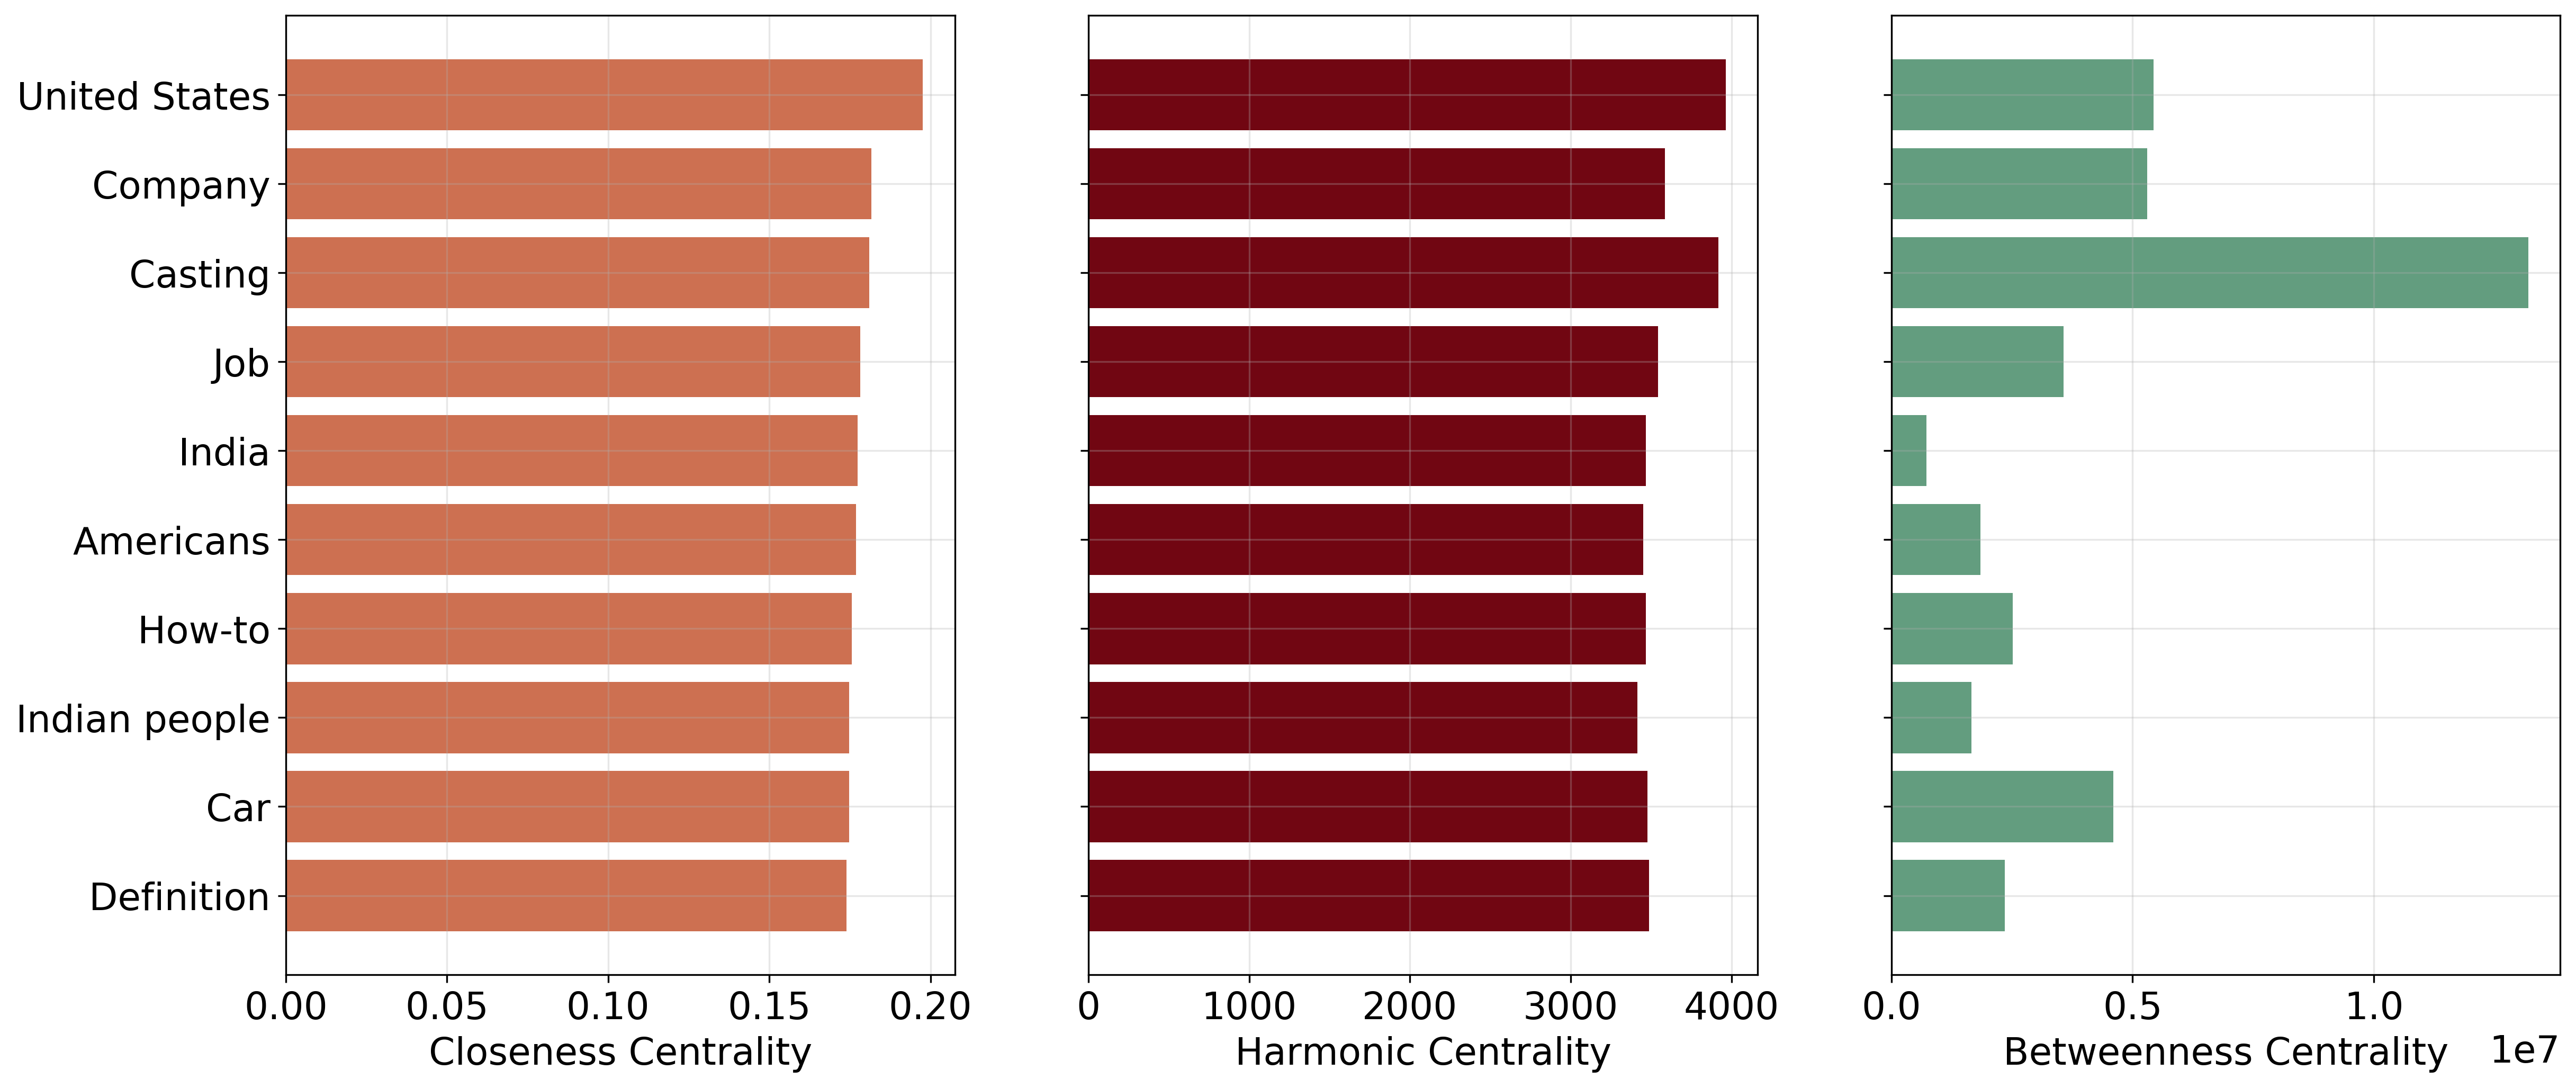

In [237]:
fig = plt.figure(figsize=(25,8), dpi= 300)

fontsize = 17
plt.rcParams.update({'font.size': fontsize})
ax = fig.add_subplot(141)
plt.barh(top_ten_,closeness_list, color="#CD7051")
plt.grid(axis='both', alpha=.3)
#plt.ylabel(fontsize=fontsize)

plt.xlabel("Closeness Centrality")

ax2 = fig.add_subplot(142)
plt.barh(top_ten_,harmonic_list, color="#710612")
plt.grid(axis='both', alpha=.3)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.xlabel("Harmonic Centrality")


ax3 = fig.add_subplot(143)
plt.barh(top_ten_,betweenness_list, color='#639D7F')
plt.grid(axis='both', alpha=.3)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.xlabel("Betweenness Centrality")

plt.show()